# Homework 8: Magnetization, Energy in the Ising Model

## Problem 0

1. Course survey has been filled.
2. I forgot to do the iEval because I was having an existential crisis.
3. Signed up for the final review, you thought my function names were entertaining. You also said you would tell Corey to grade my homework 6 easy because I was struggling with the Array sums.

## Problem 1

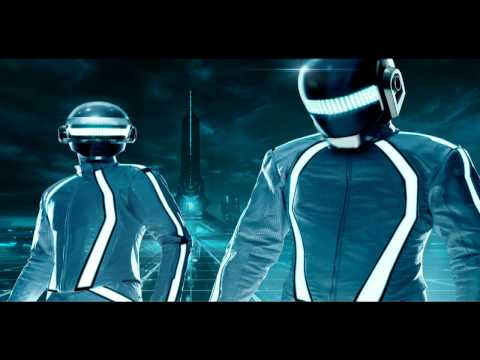

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

N = 20
N_Trials = 2000
Temperature = 0.5 * 2.27
Beta = 1/Temperature

# The prompt says to use Tc = 2.27 but all of your examples apply a 0.5
# to the temperature, I'm just gonna follow your example.





# Initialize the Grid





from IPython.display import YouTubeVideo
# You kept talking about the grid and this is what I was thinking about the whole time.
# Video Credit: xDigitalSilverx
YouTubeVideo('-UOTLTgDH44')

In [3]:
Grid = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        grid[i][j] = 2 * randint(0,1) - 1
        
print(grid)

[[-1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.
   1.  1.]
 [ 1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.
   1.  1.]
 [-1. -1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.
  -1.  1.]
 [-1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1.
  -1.  1.]
 [ 1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1.
   1.  1.]
 [-1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.
   1. -1.]
 [-1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
   1. -1.]
 [-1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.
   1. -1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.
  -1. -1.]
 [-1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.
   1.  1.]
 [-1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1. -1.
  -1.  1.]
 [-1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.

I typed this while listening to that video I embedded and frankly it wasn't as
exciting as I had hoped to print this. If you haven't started playing the embed,
please do, it'll make grading this homework that much better.
Not that it's any good to begin with.

In [19]:
def Iso_Spin(some_grid, Beta, i, j):
    
    Spin = Grid[i, j]
    Spin_DoABackFlip = -Spin
    
    Net_Neighbor_Spin = \
        Grid[(i + 1)%N, j] + \
        Grid[(i - 1)%N, j] + \
        Grid[i, (j + 1)%N] + \
        Grid[i, (j - 1)%N]
        
    DeltaE = -Spin_DoABackFlip * Net_Neighbor_Spin - (-Spin * Net_Neighbor_Spin)
    
    if DeltaE < 0:
        return -Spin
    else:
        if random() < np.exp(-Beta * DeltaE):
            return -Spin
        else:
            return Spin
        
def Grid_Update(Grid, Beta):
    i = randint(0, N - 1)
    j = randint(0, N - 1)
    Grid[i, j] = Iso_Spin(Grid, Beta, i, j)

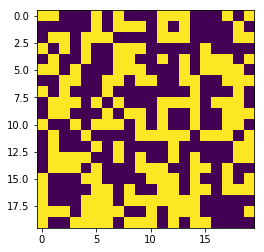

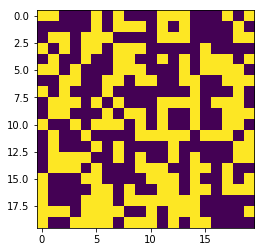

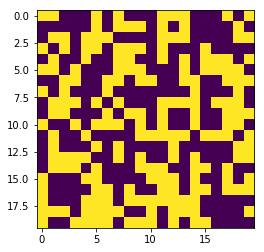

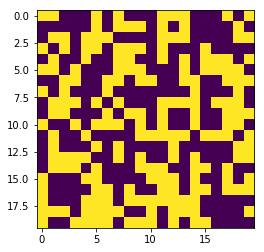

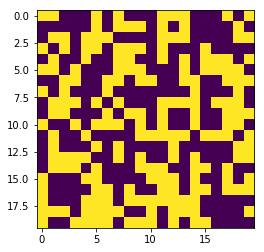

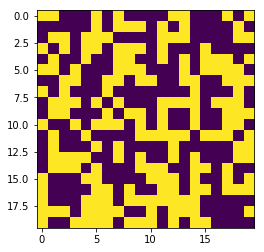

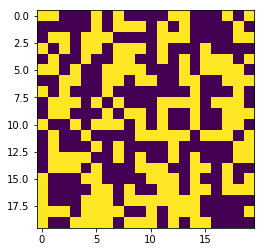

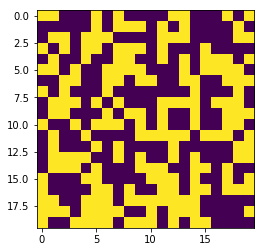

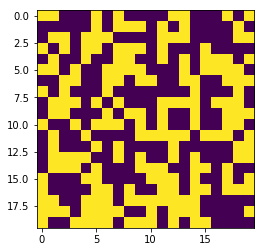

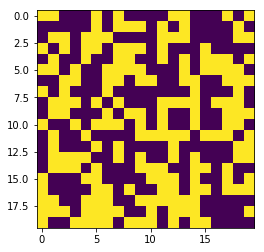

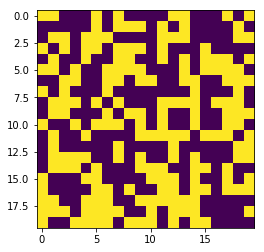

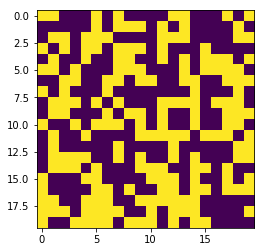

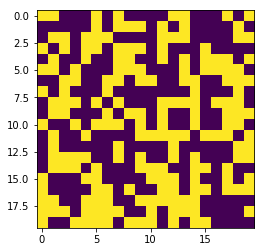

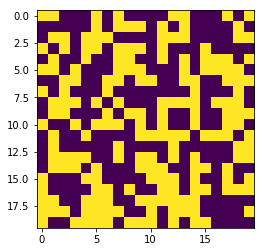

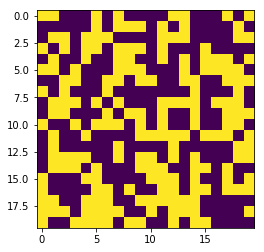

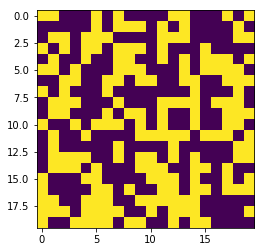

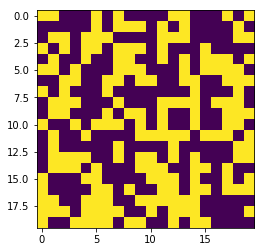

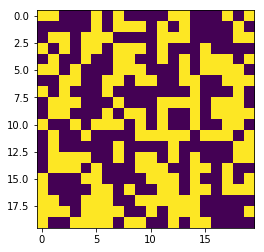

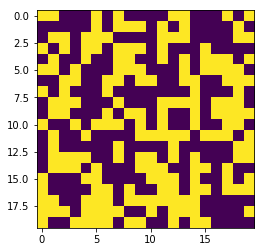

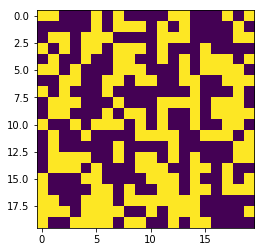

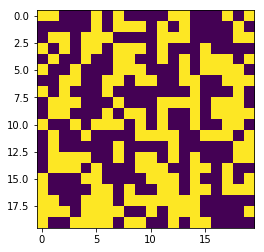

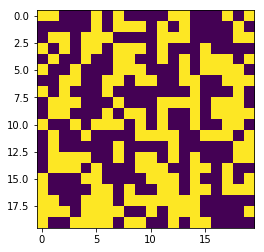

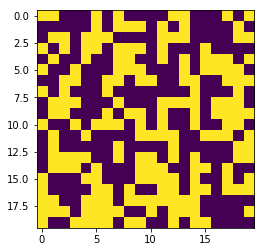

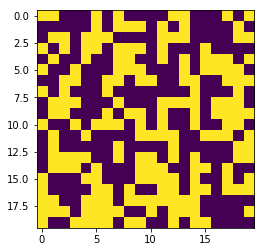

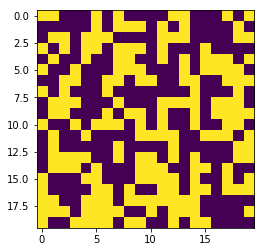

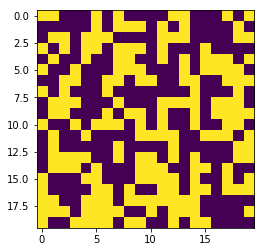

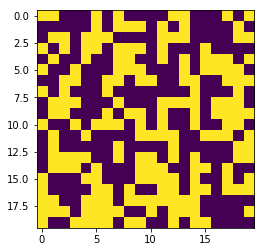

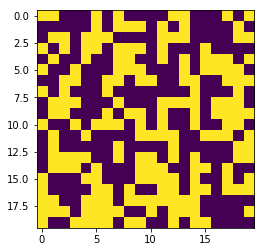

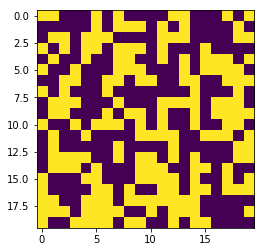

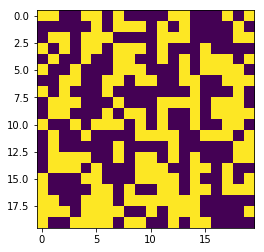

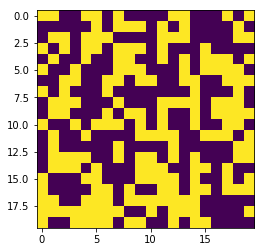

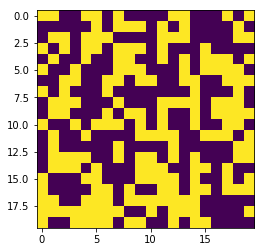

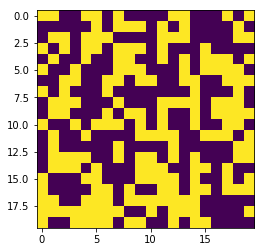

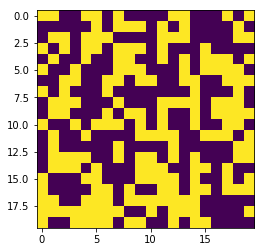

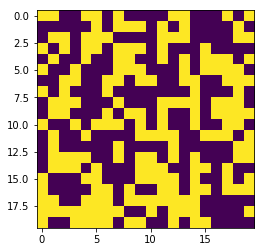

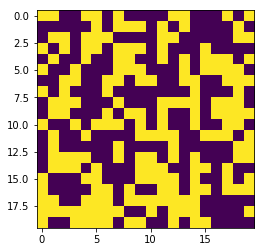

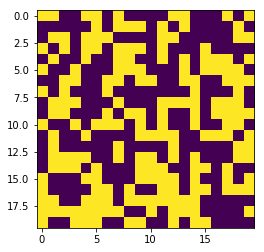

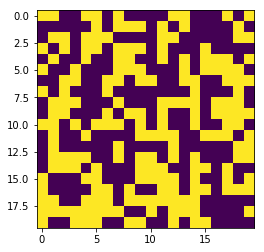

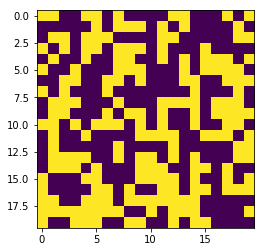

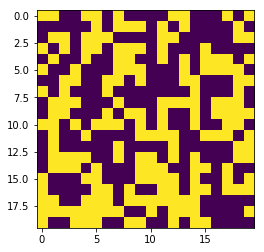

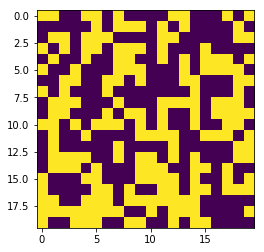

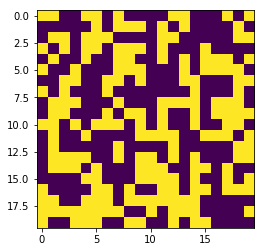

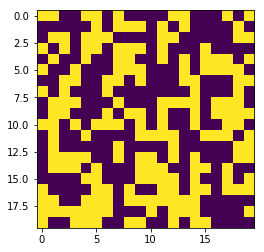

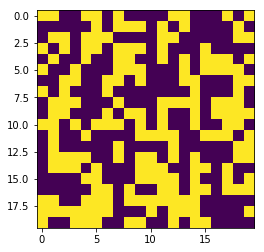

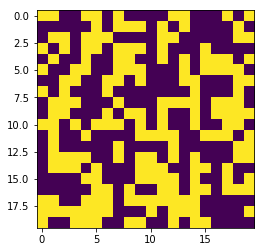

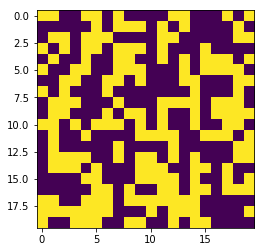

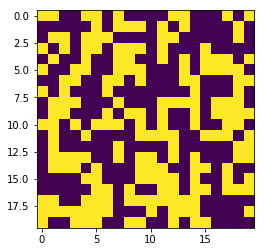

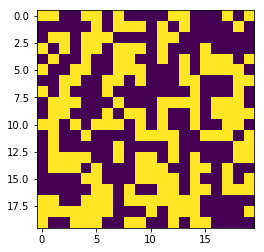

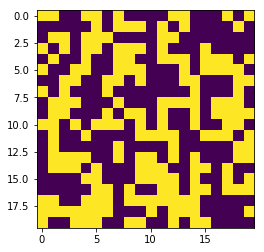

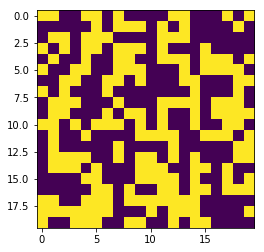

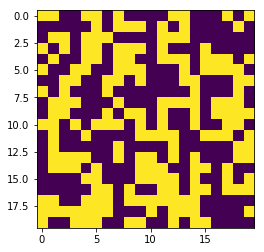

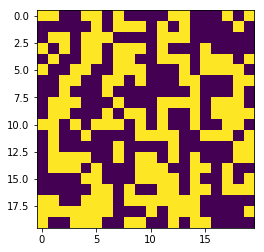

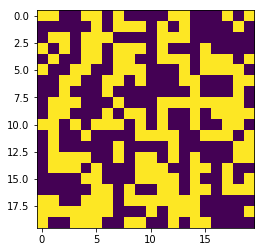

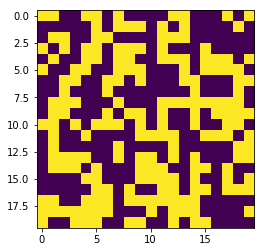

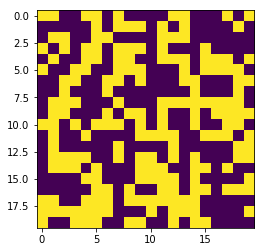

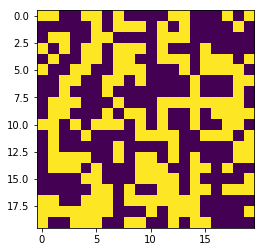

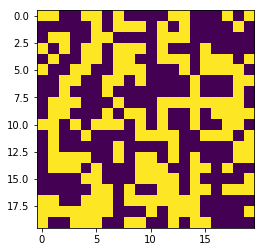

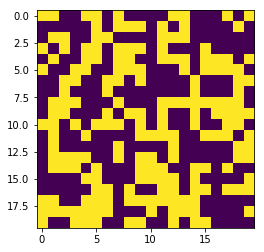

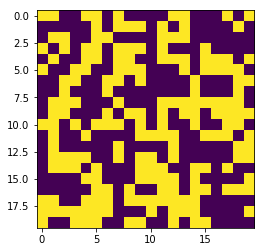

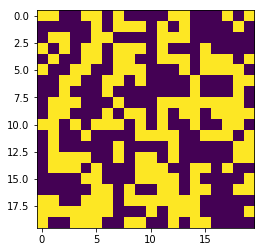

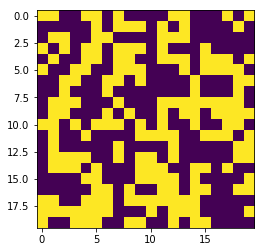

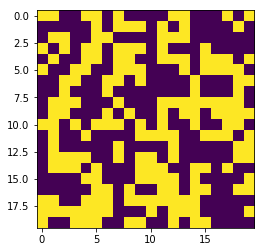

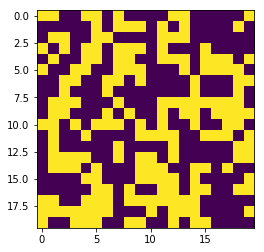

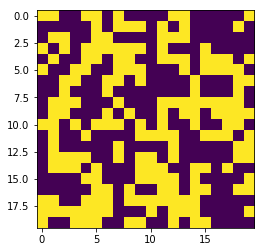

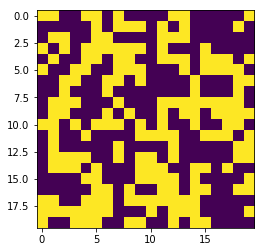

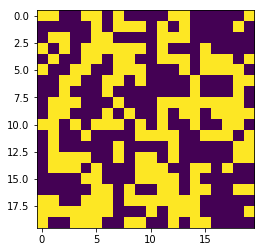

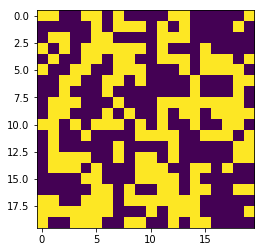

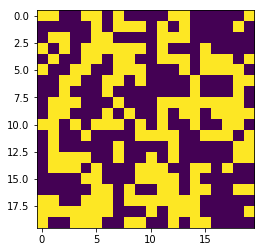

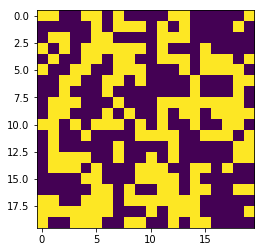

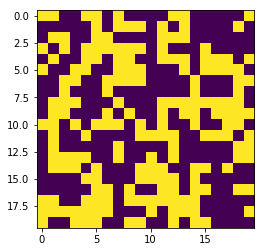

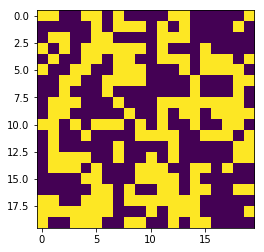

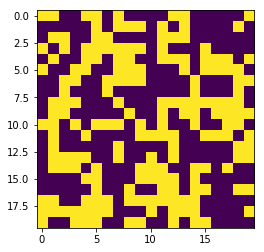

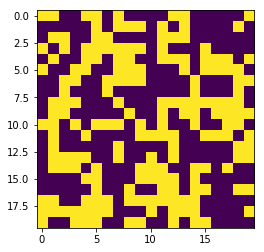

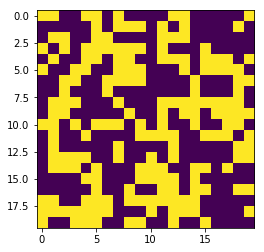

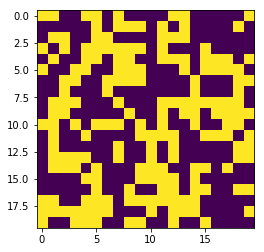

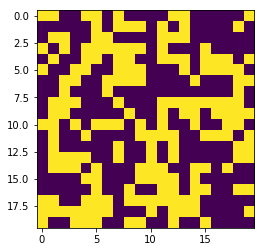

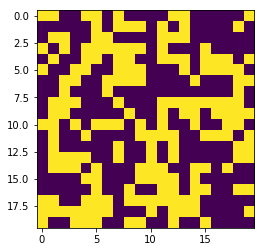

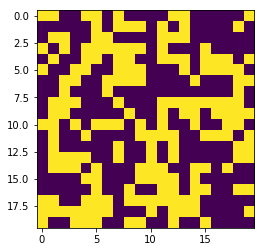

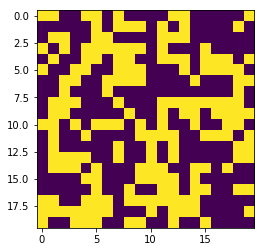

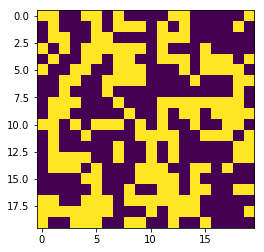

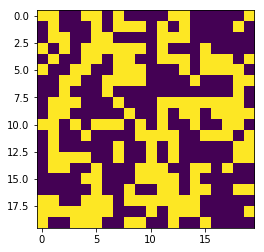

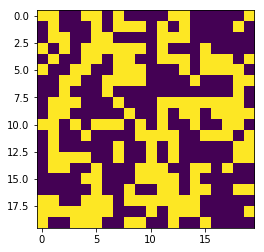

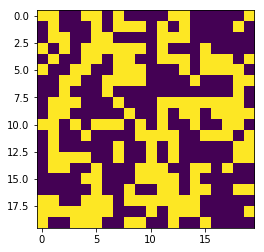

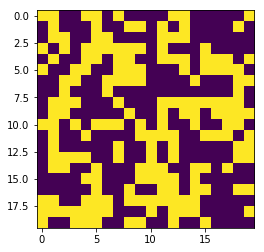

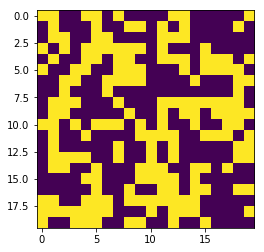

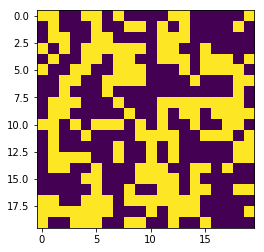

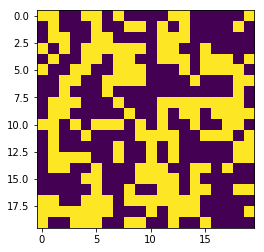

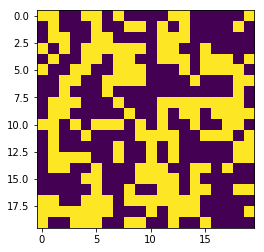

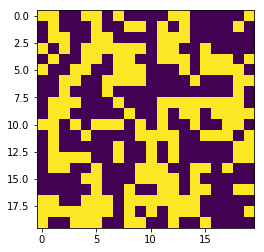

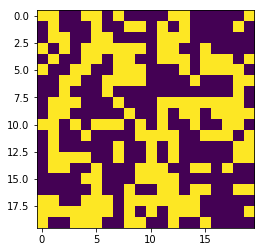

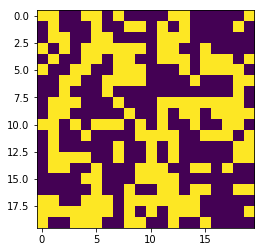

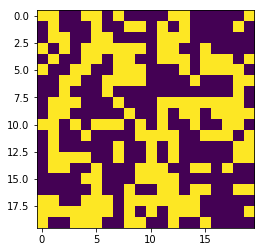

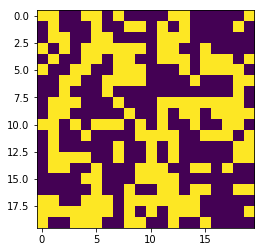

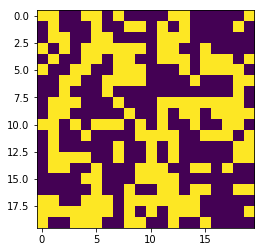

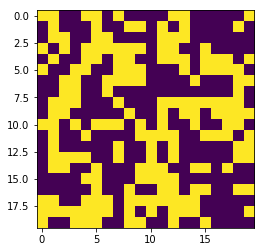

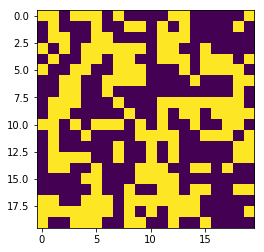

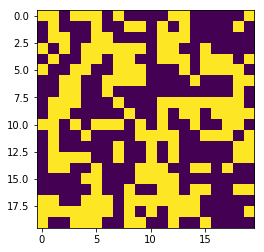

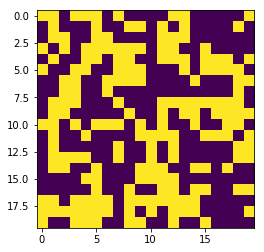

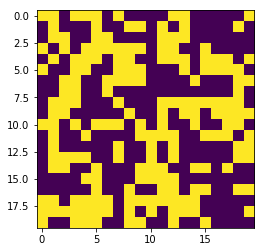

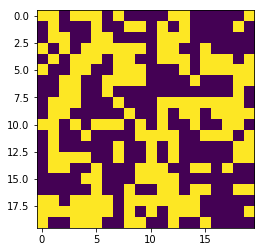

In [105]:
%matplotlib inline

N = 20
N_Trials = 1000
Temperature = 0.5 * 2.27
Beta = 1/Temperature

Grid = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        Grid[i][j] = 2 * randint(0, 1) - 1

record = []
for a in range(N_Trials):
    record.append(np.array(Grid))
    Grid_Update(Grid, 1)
    
for a in range(100):
    plt.imshow(record[a])
    plt.show()

I am literally just going to copy paste your aniamtion code into this notebook
I haven't tried that yet so lets see what happens.

<IPython.core.display.Javascript object>


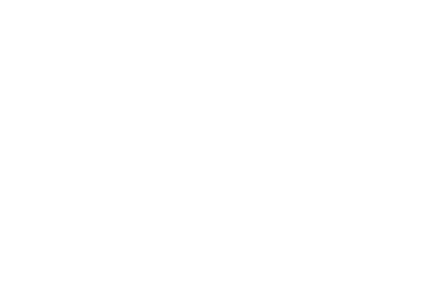

<IPython.core.display.Javascript object>


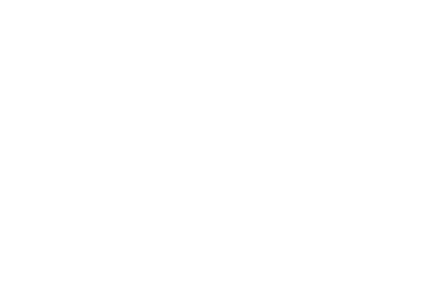

In [40]:
%matplotlib notebook
from matplotlib import animation

def animate(i):
    return plt.imshow(record[i])
fig = plt.figure()
ani = animation.FuncAnimation(fig, animate, interval=2000, blit=True)
plt.show()

This animation stuff makes me want to kill myself.

In [53]:
N = 64
N_Trials = 10000
Temperature = 0.5 * 2.27
Beta = 1/Temperature

Grid = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        Grid[i][j] = 2 * randint(0, 1) - 1

record = []
for a in range(N_Trials):
    record.append(np.array(Grid))
    Grid_Update(Grid, 1)

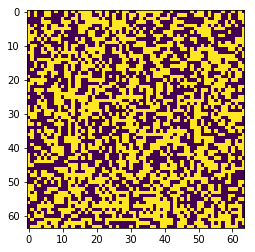

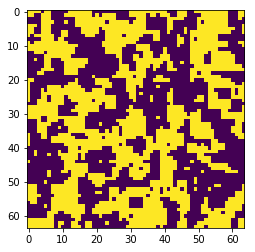

In [54]:
%matplotlib inline

plt.imshow(record[0])
plt.show()

plt.imshow(record[N_Trials - 1])
plt.show()

Holy shit something actually worked.
For some reason the above Grid show where I imaged 5 events has some wonky features. For any small grid size like 3 or 5 you can see changes to the spins
with each passing image, but when the grid is shot up to 20x20
there is no visibile change within any of the images. Maybe I should try upping the number of passes from 5 to like 100. BRB gonna try. Nope still no changes. I wish animations freaking worked. OH WAIT IT WORKED< THE LAST IAMGE LOOKS DIFFERENT THAN THE FIRST. YES FINALLY.

## Same code but with different temperatures added

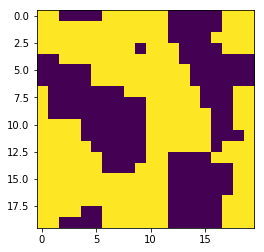

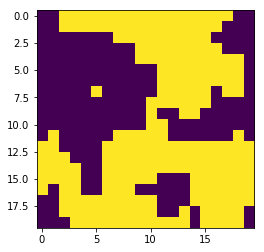

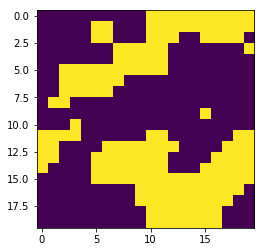

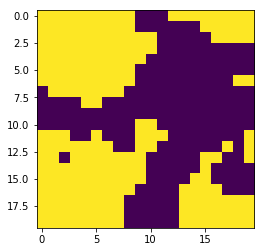

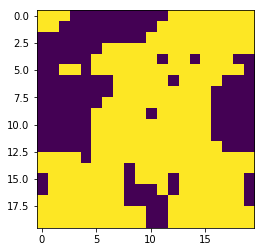

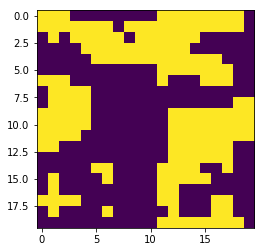

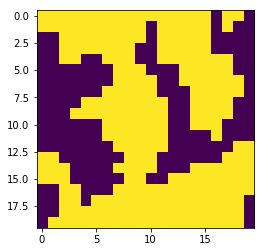

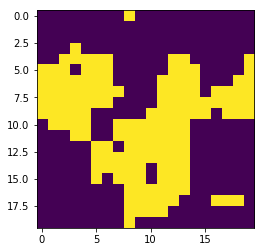

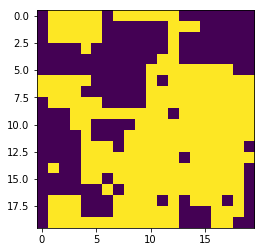

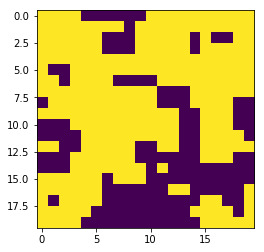

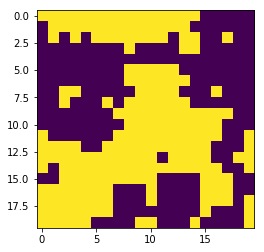

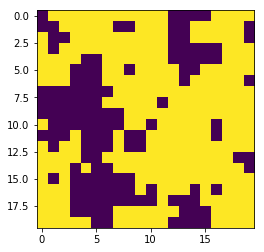

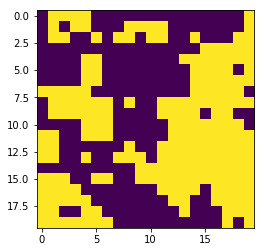

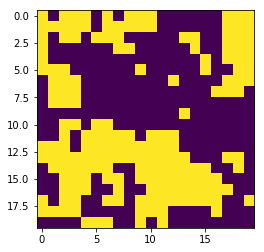

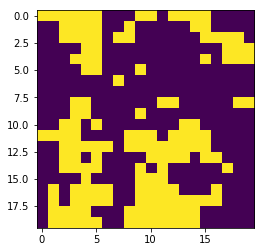

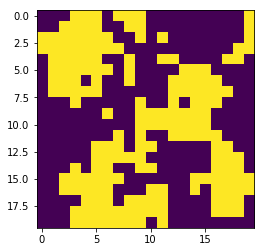

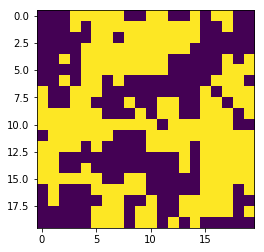

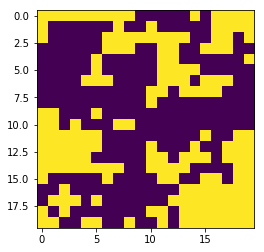

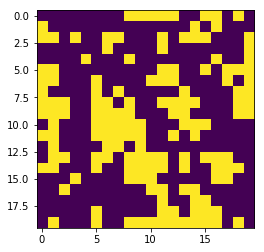

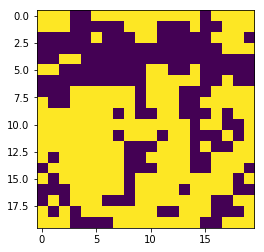

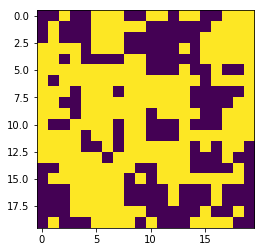

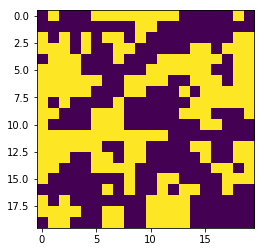

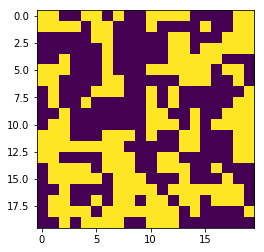

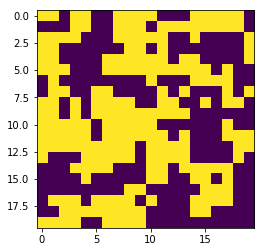

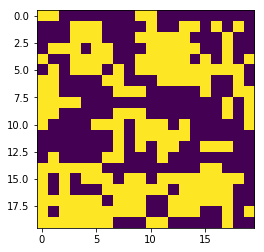

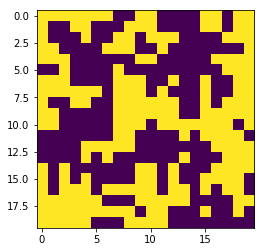

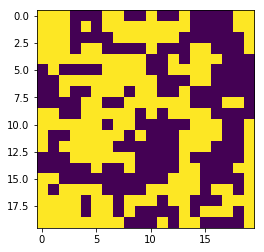

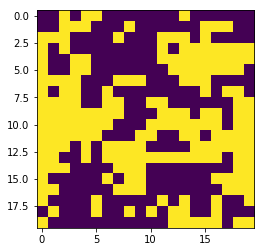

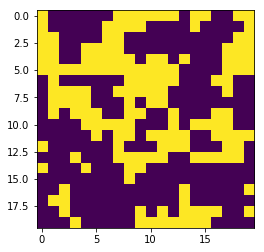

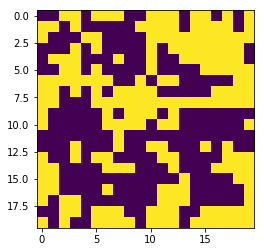

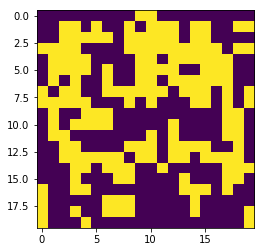

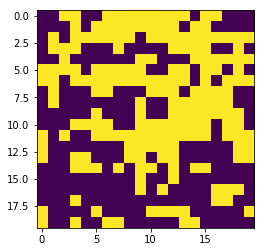

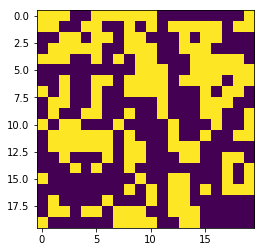

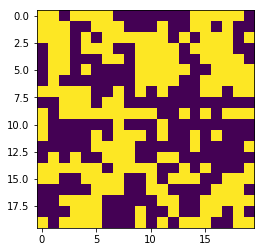

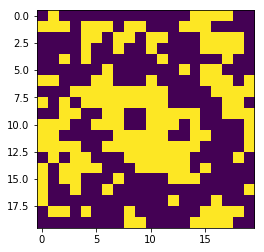

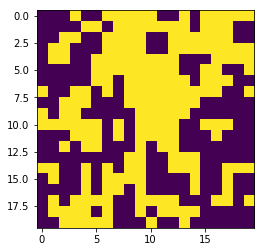

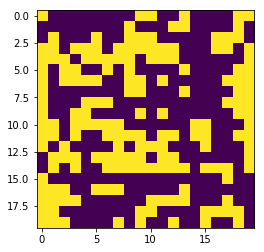

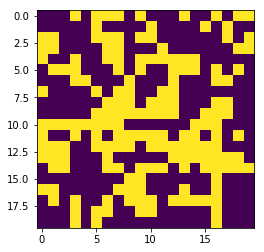

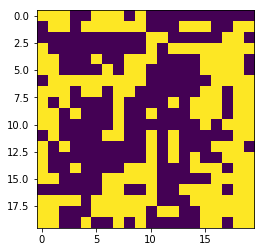

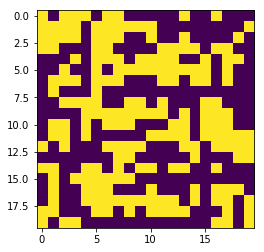

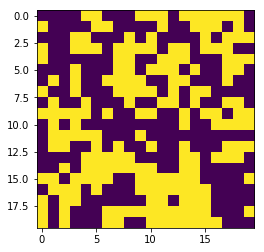

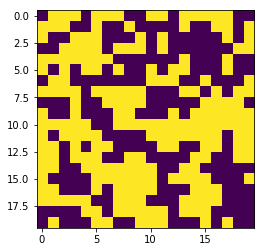

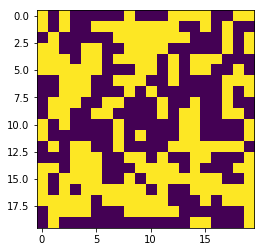

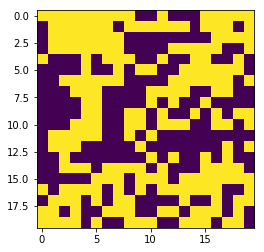

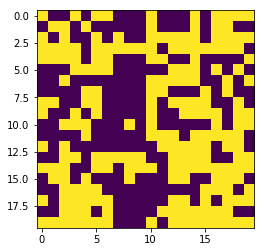

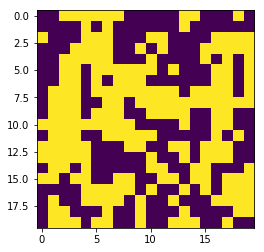

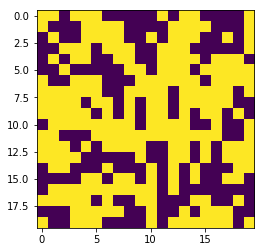

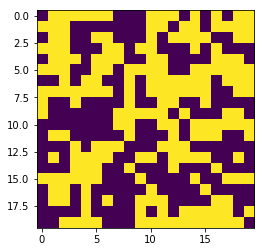

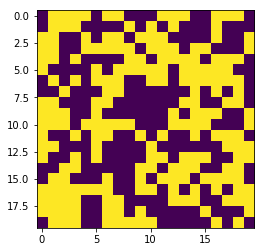

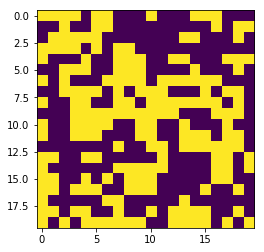

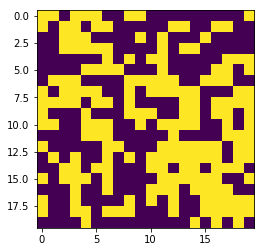

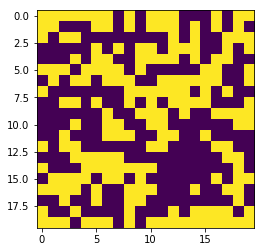

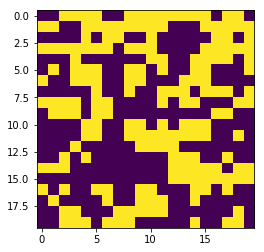

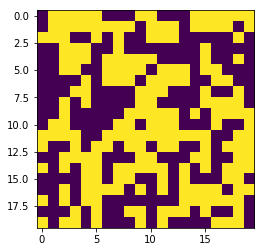

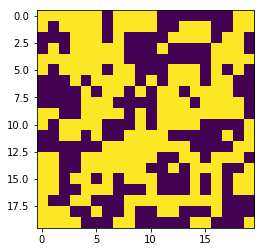

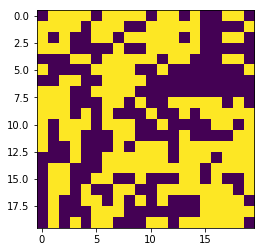

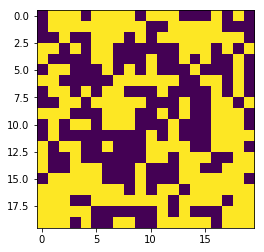

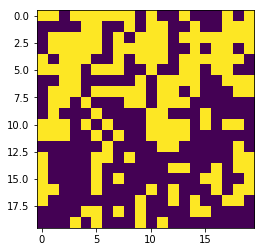

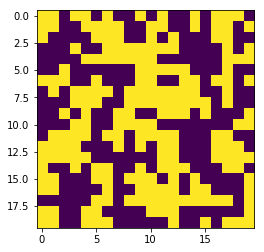

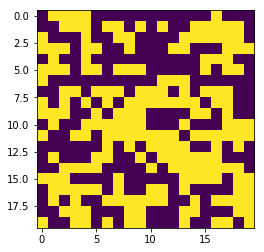

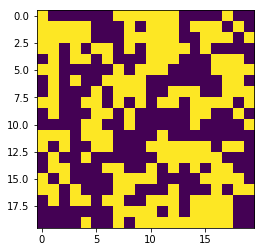

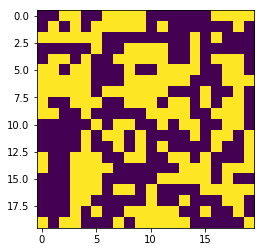

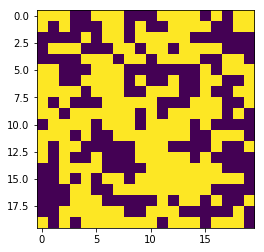

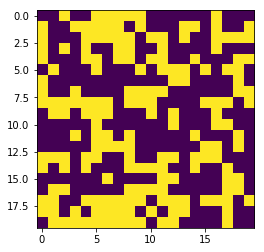

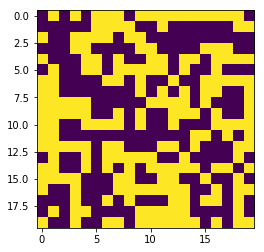

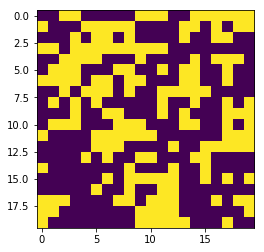

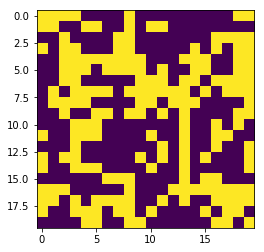

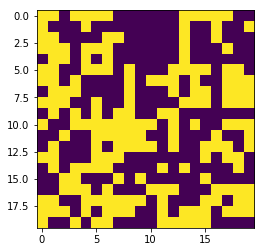

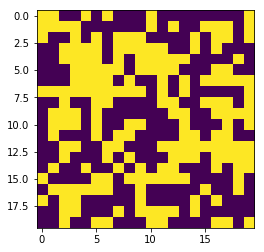

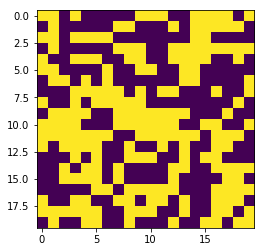

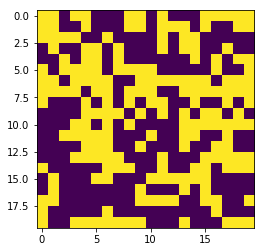

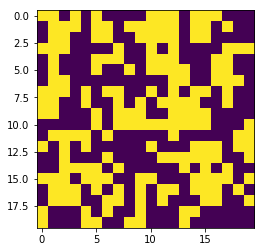

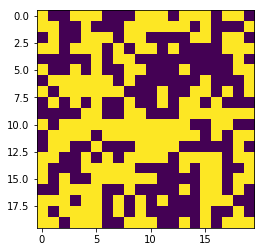

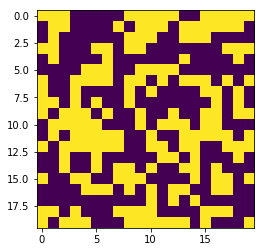

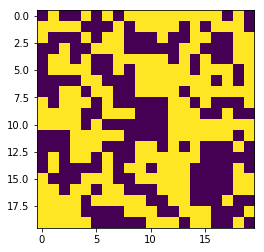

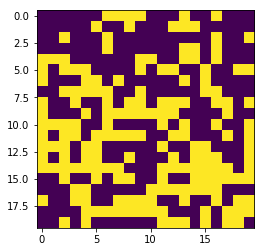

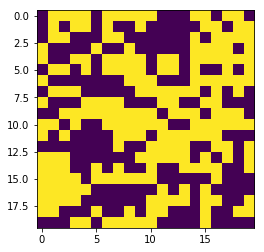

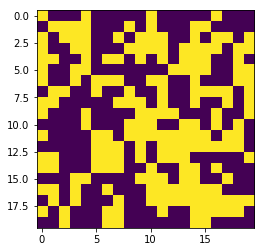

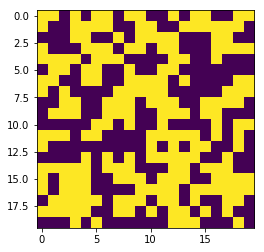

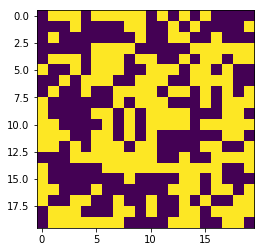

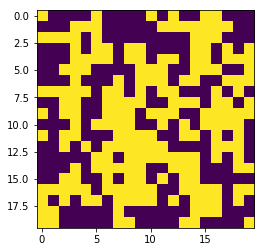

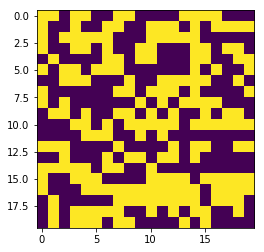

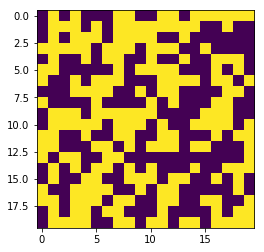

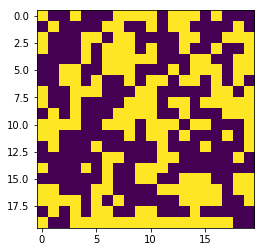

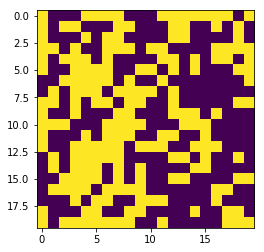

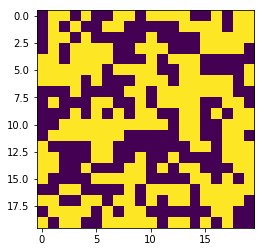

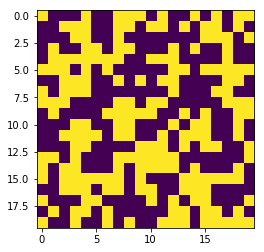

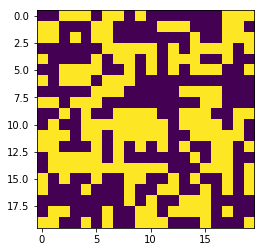

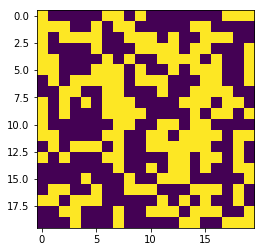

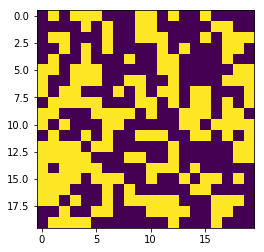

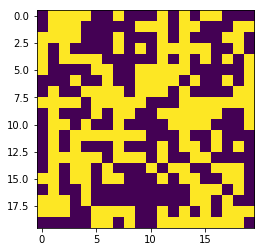

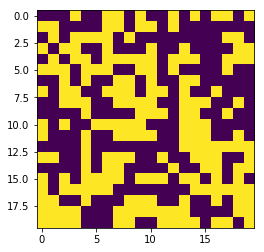

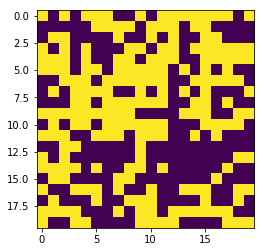

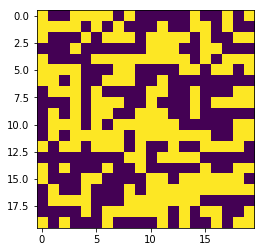

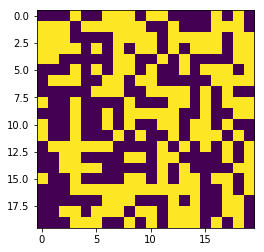

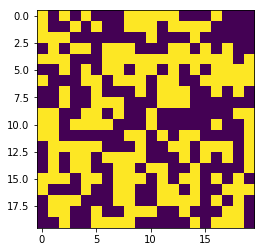

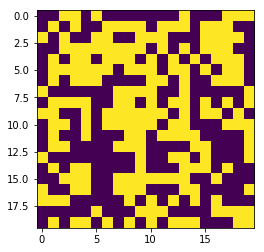

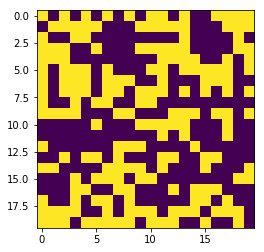

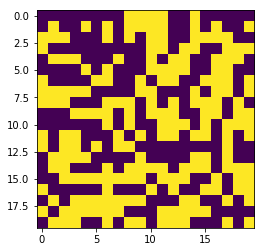

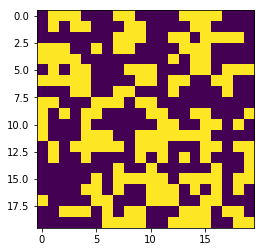

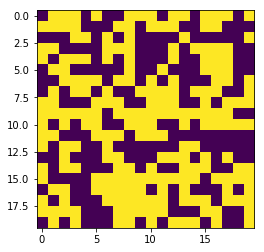

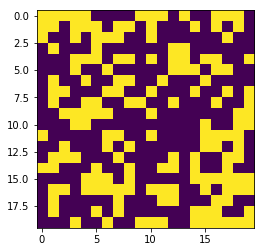

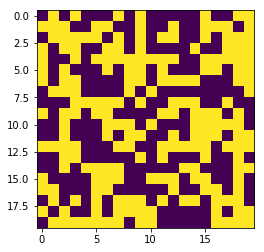

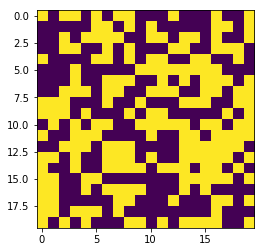

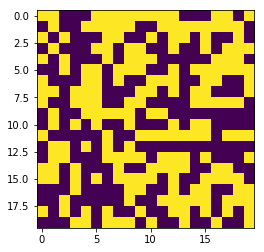

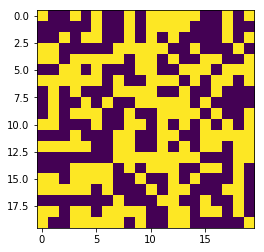

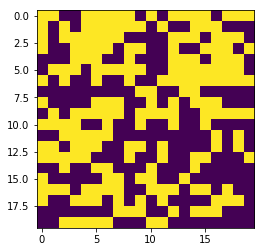

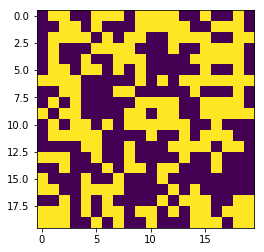

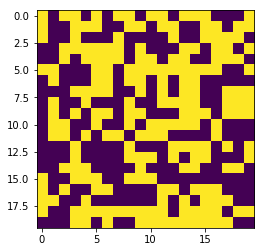

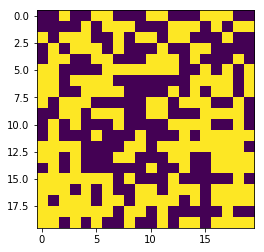

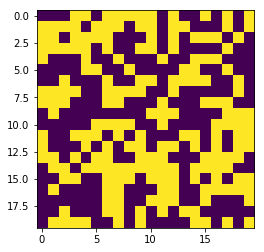

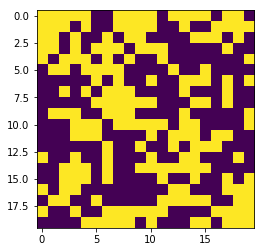

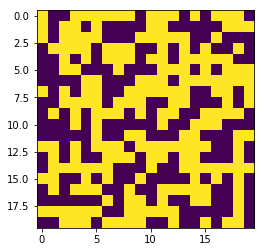

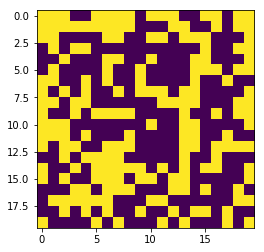

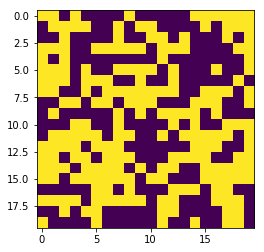

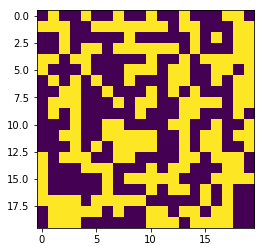

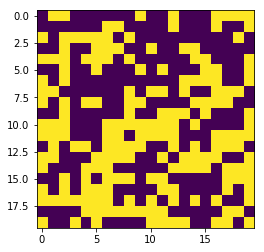

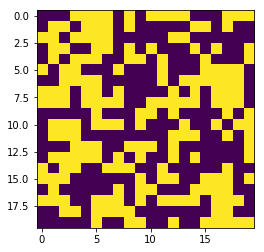

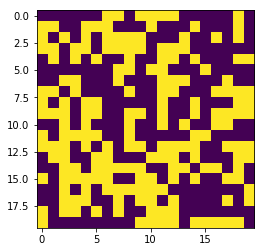

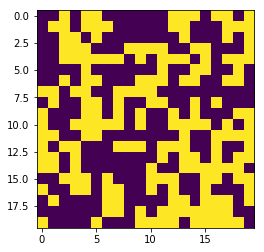

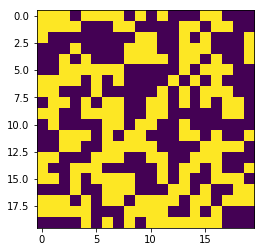

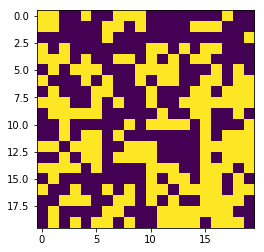

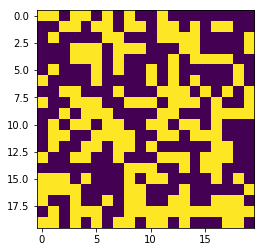

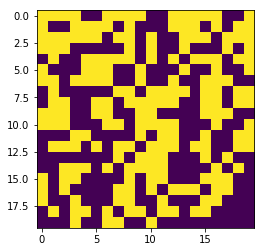

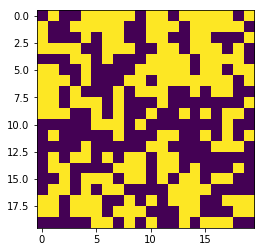

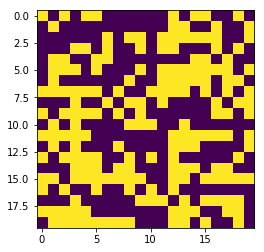

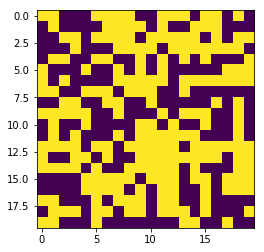

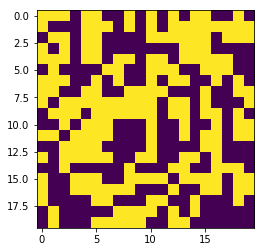

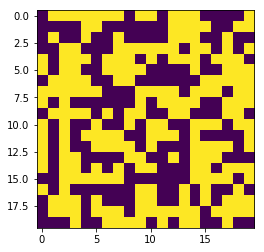

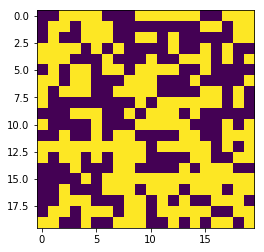

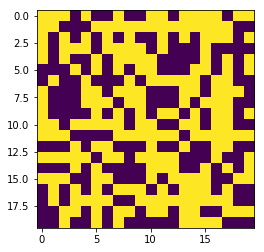

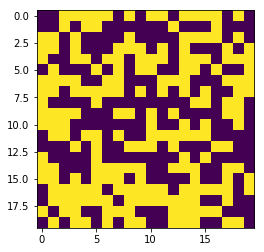

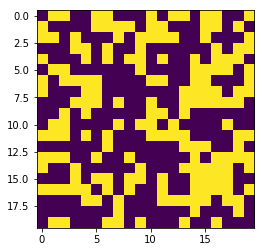

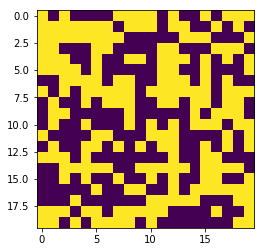

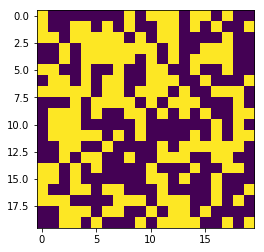

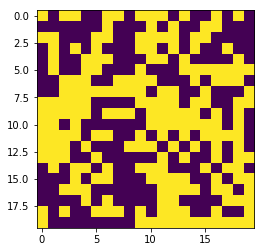

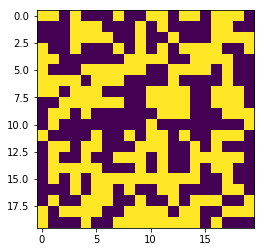

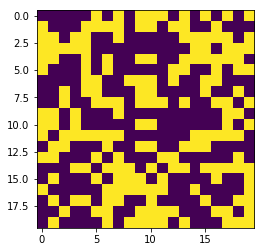

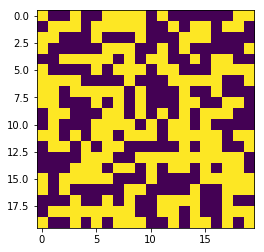

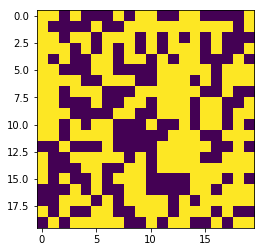

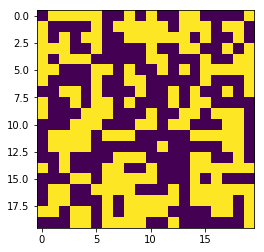

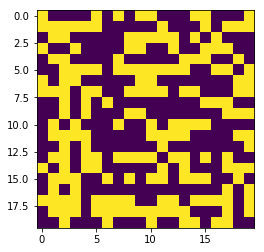

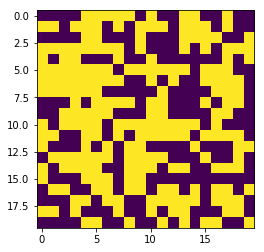

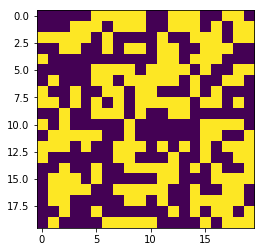

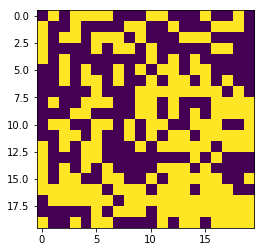

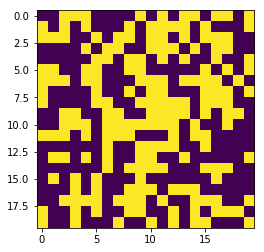

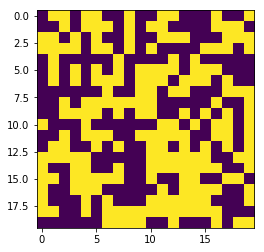

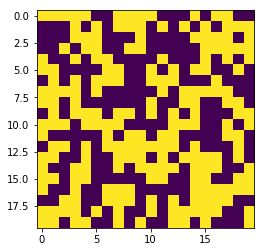

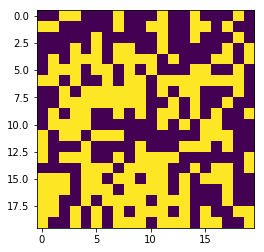

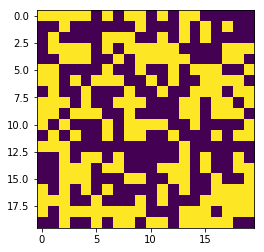

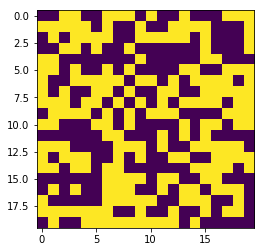

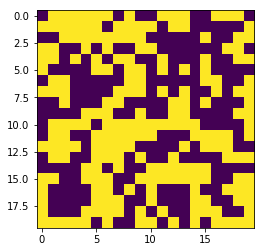

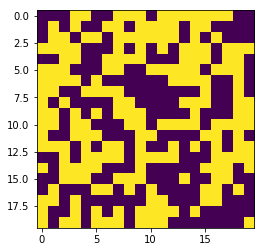

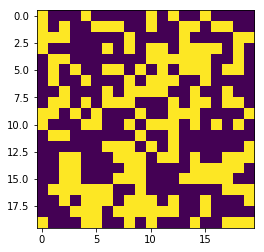

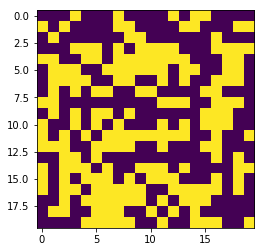

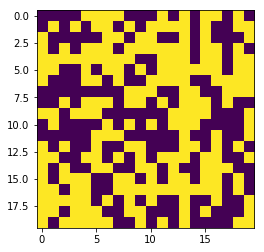

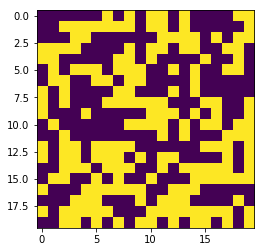

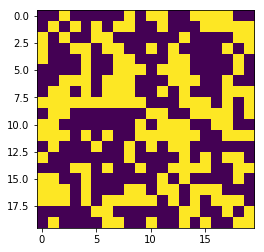

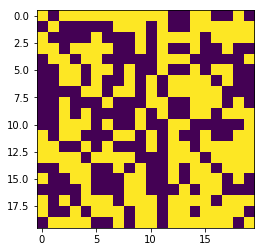

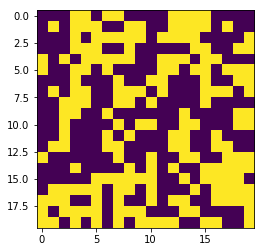

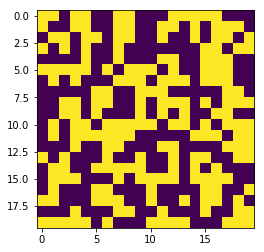

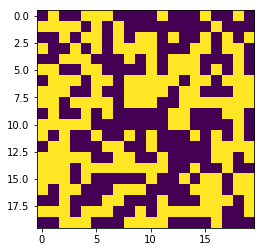

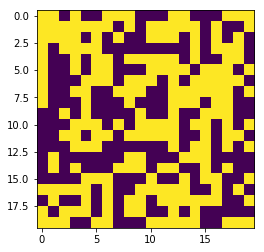

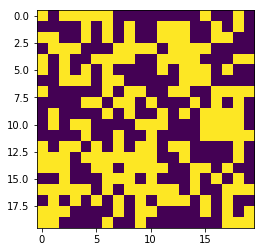

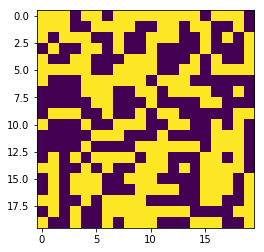

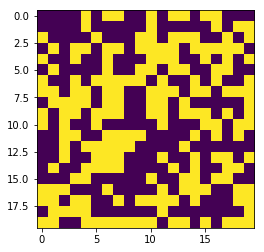

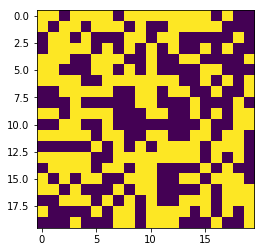

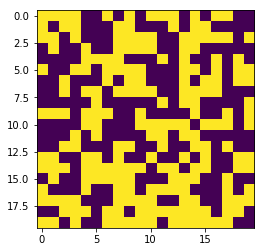

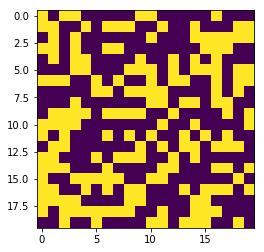

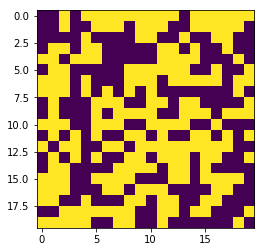

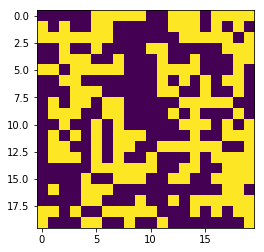

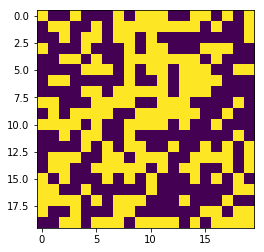

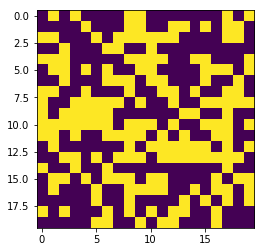

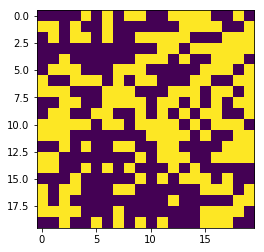

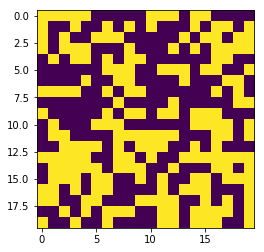

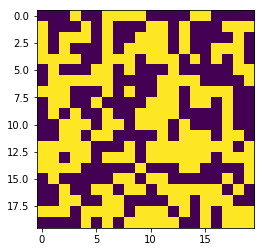

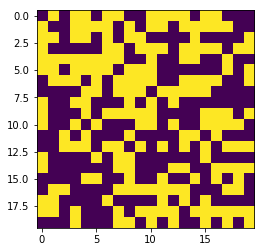

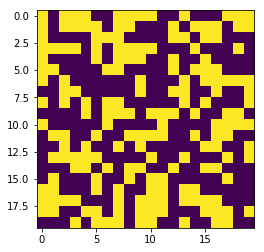

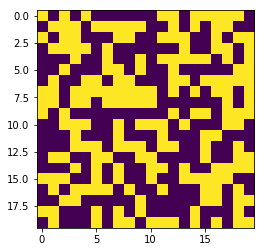

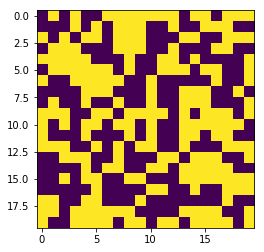

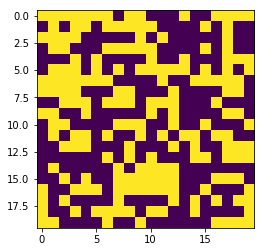

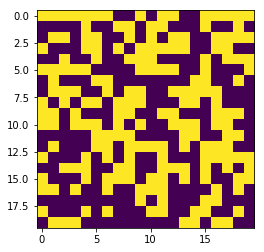

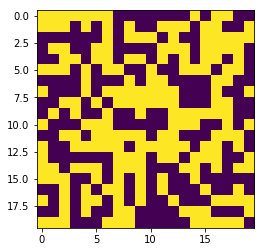

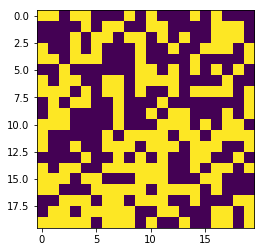

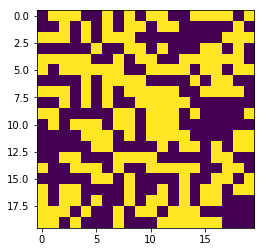

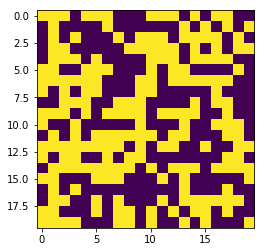

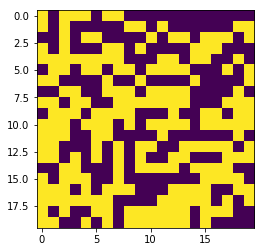

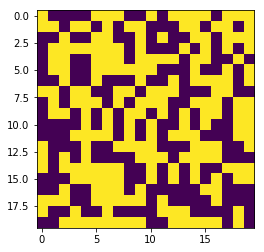

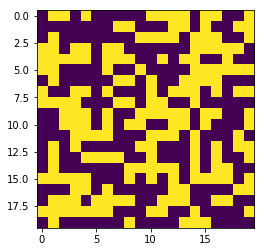

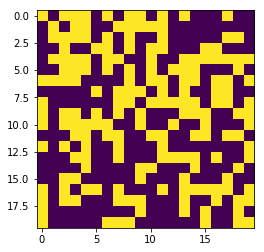

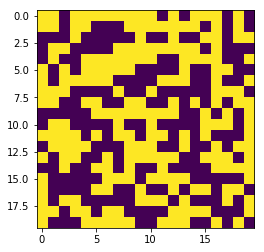

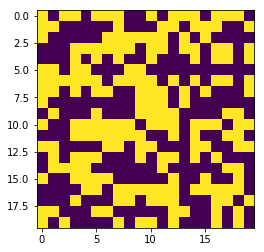

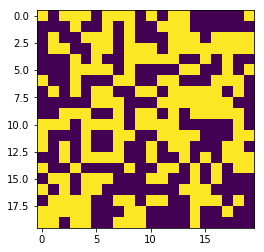

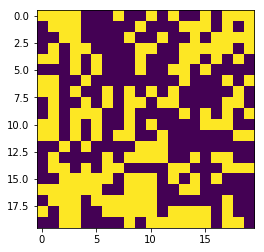

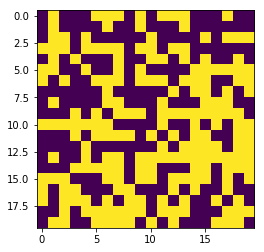

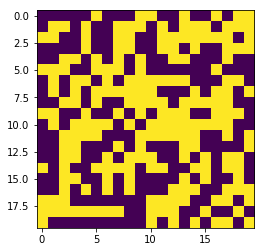

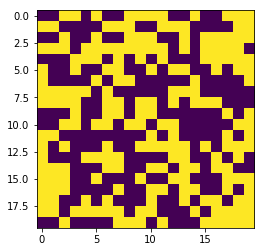

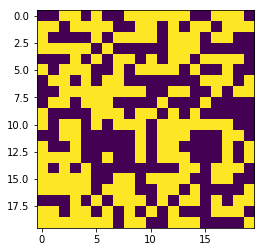

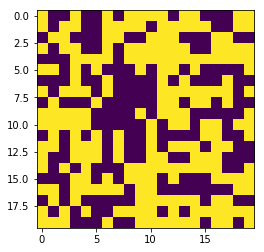

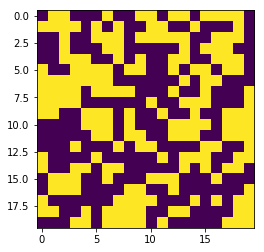

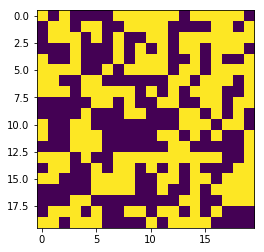

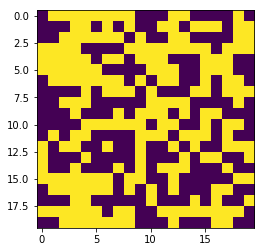

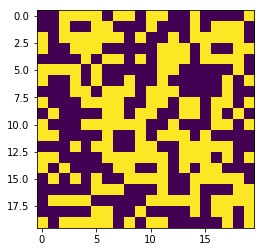

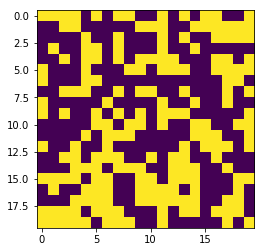

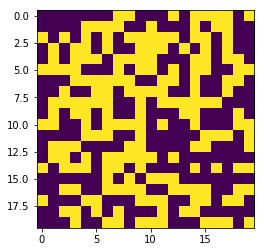

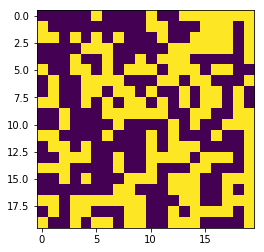

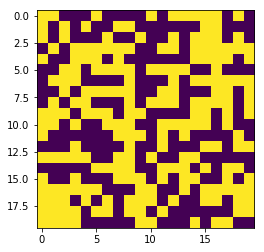

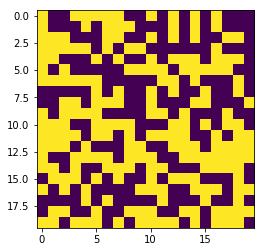

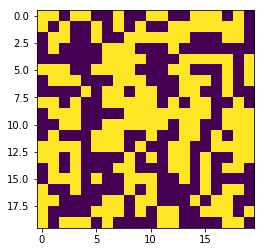

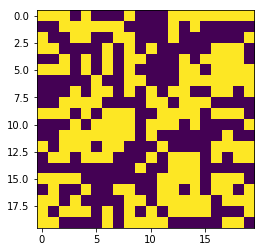

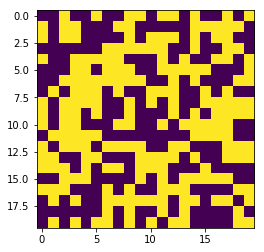

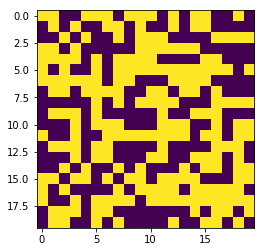

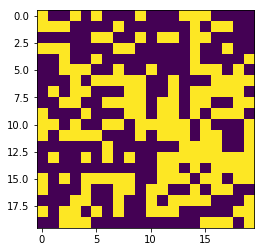

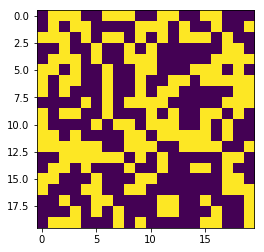

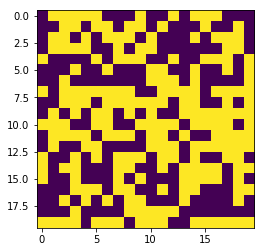

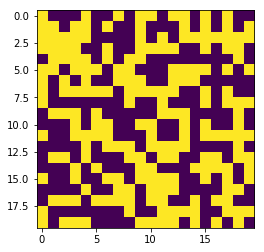

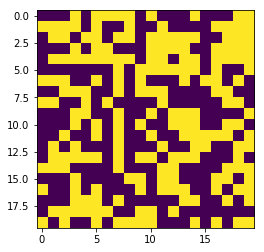

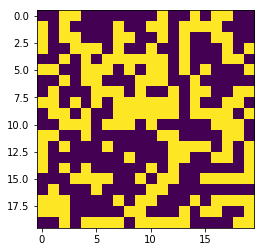

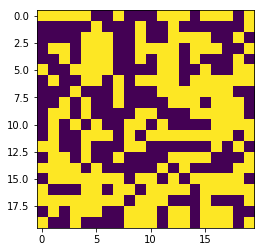

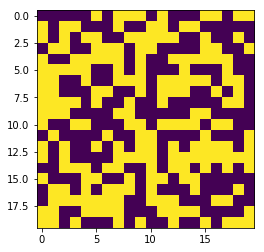

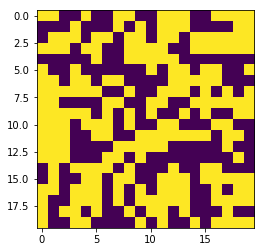

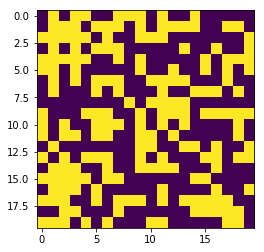

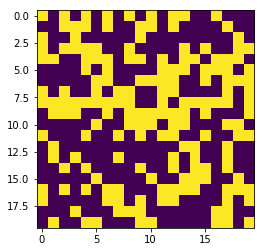

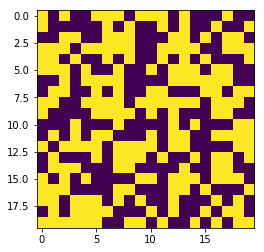

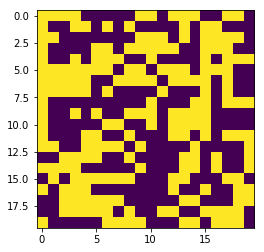

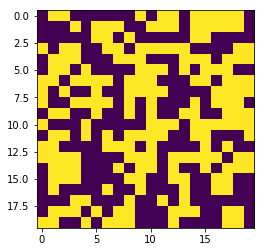

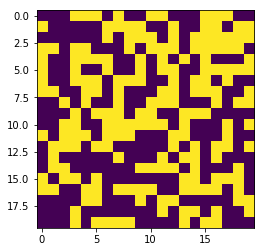

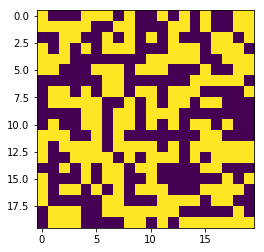

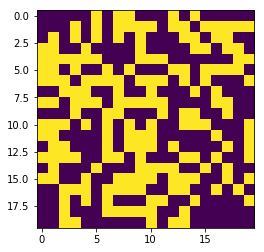

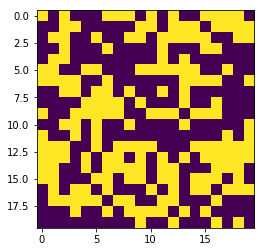

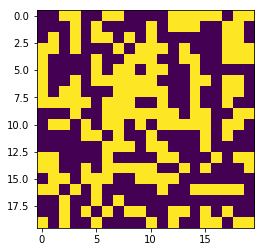

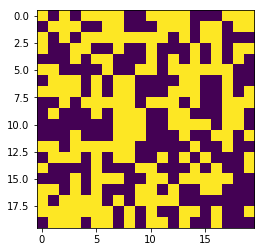

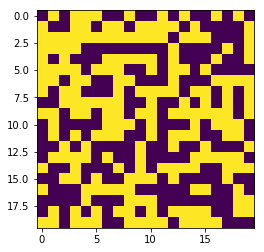

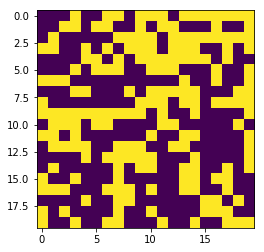

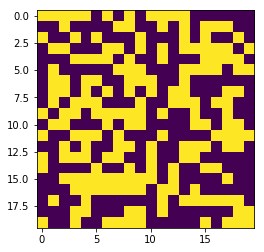

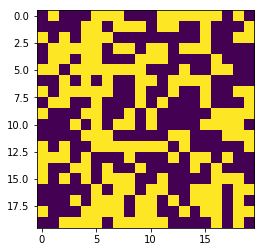

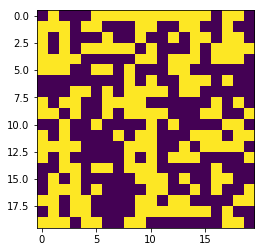

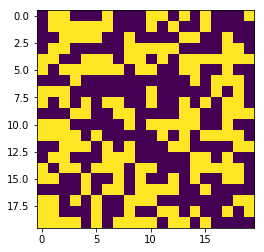

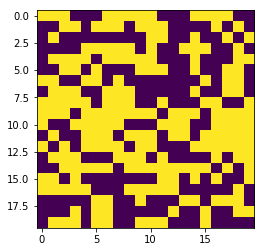

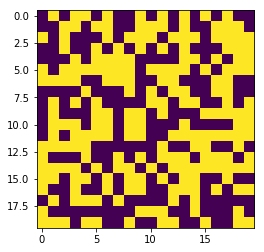

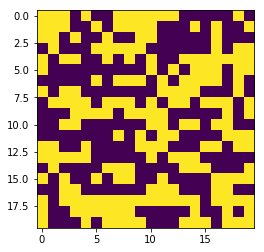

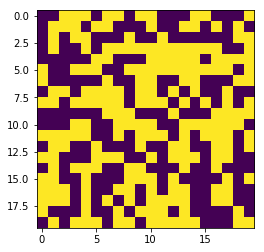

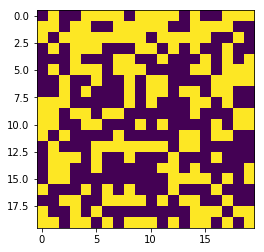

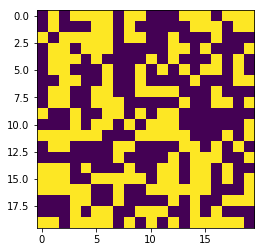

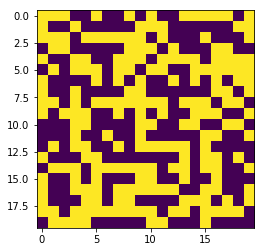

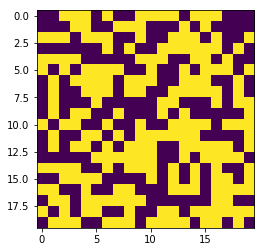

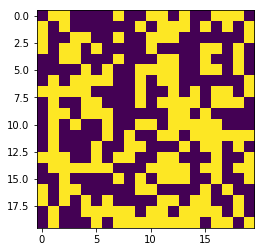

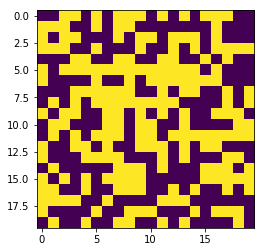

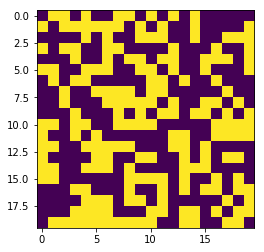

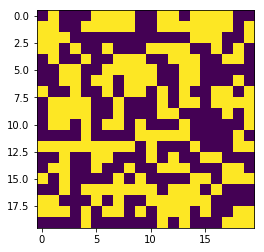

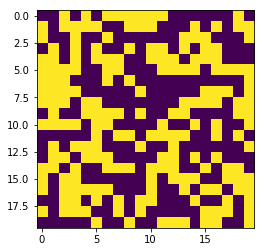

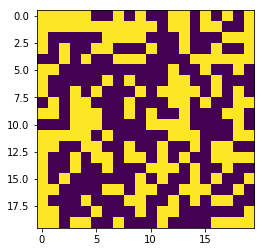

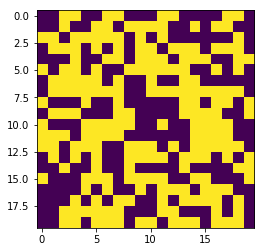

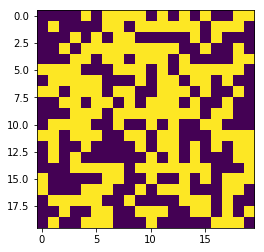

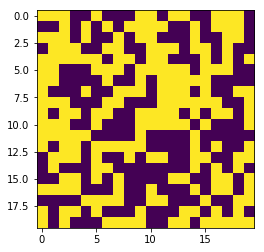

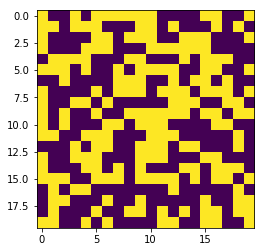

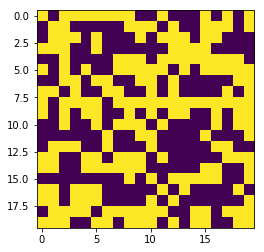

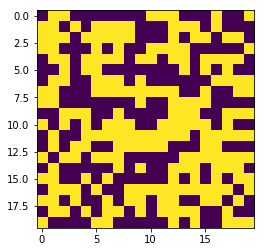

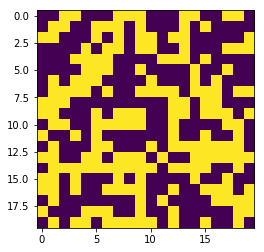

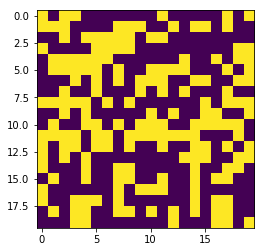

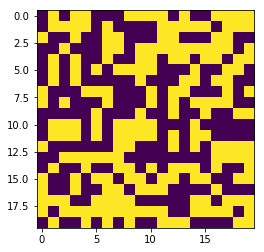

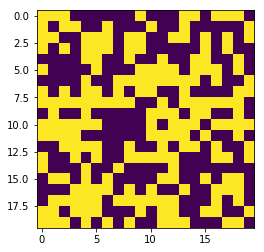

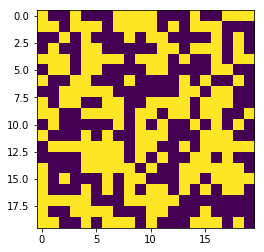

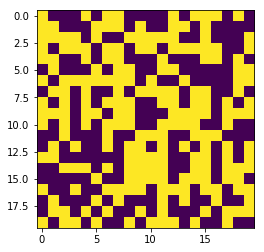

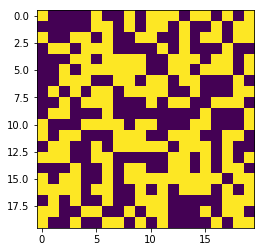

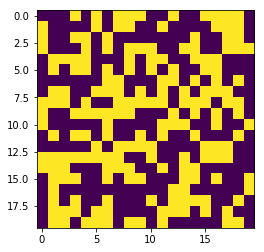

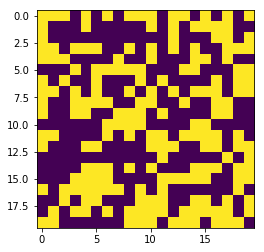

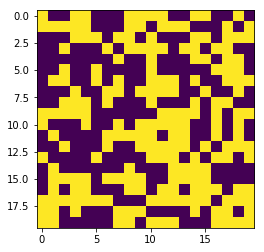

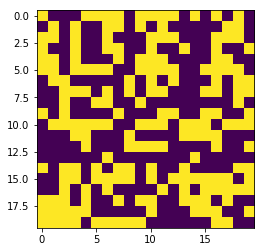

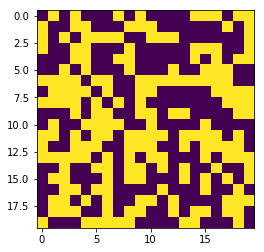

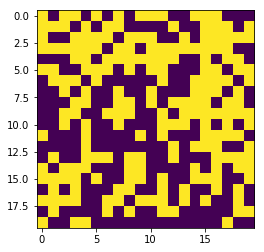

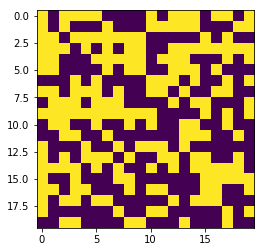

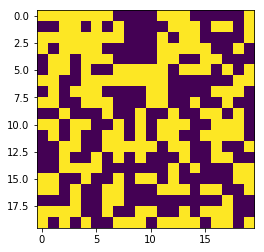

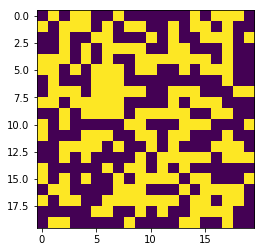

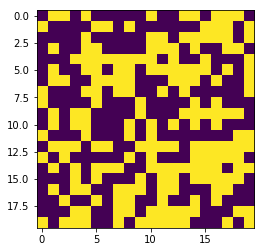

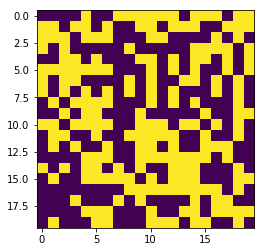

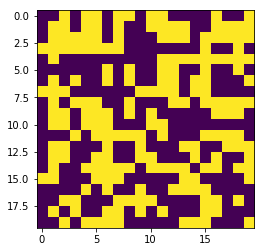

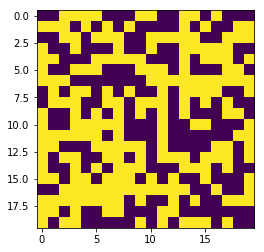

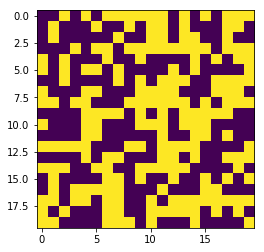

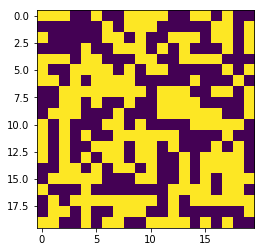

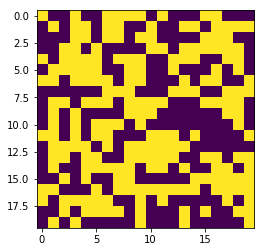

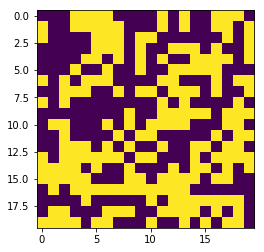

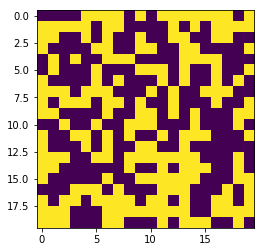

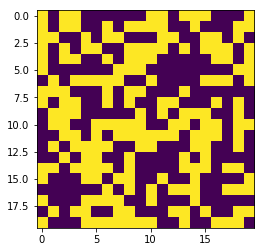

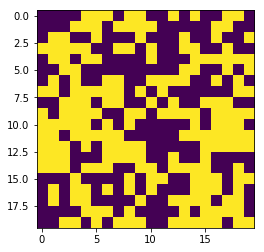

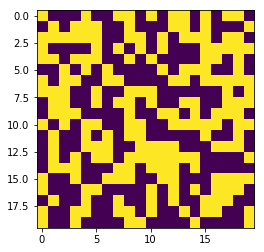

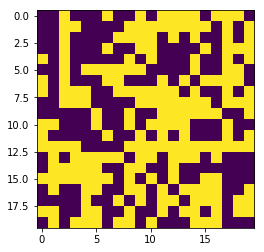

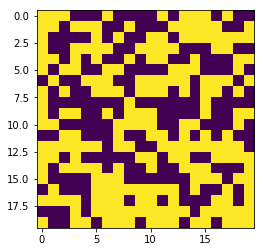

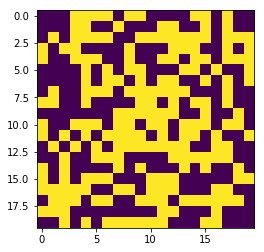

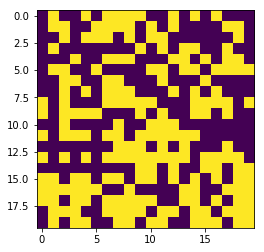

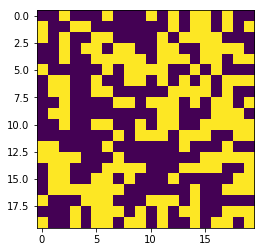

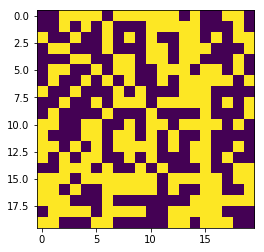

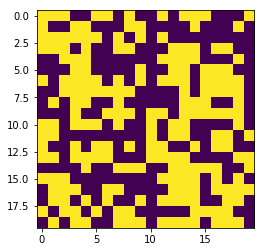

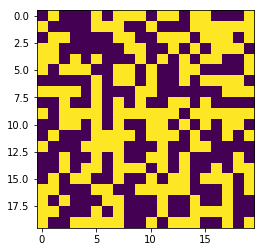

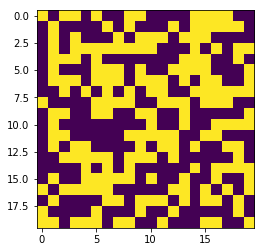

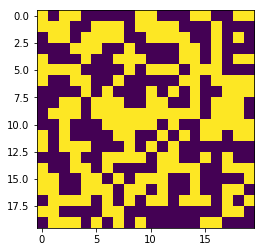

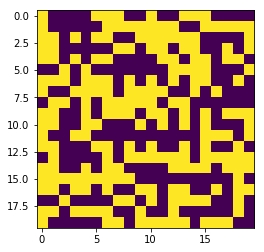

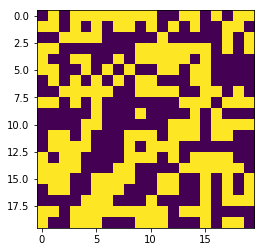

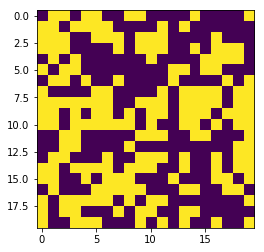

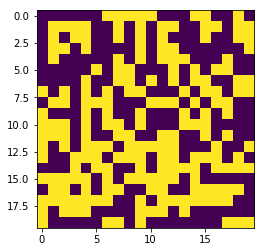

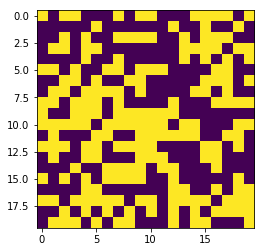

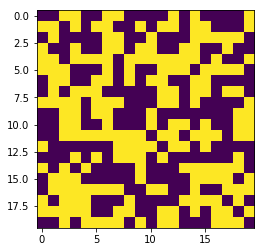

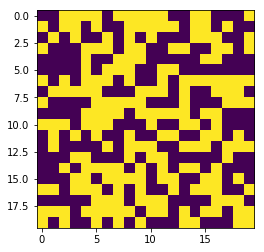

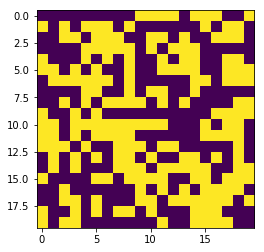

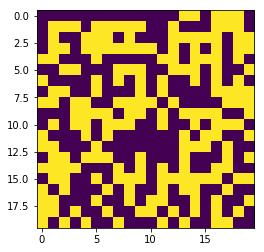

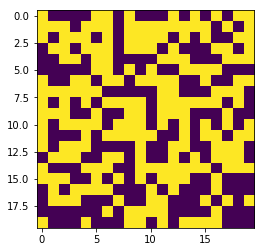

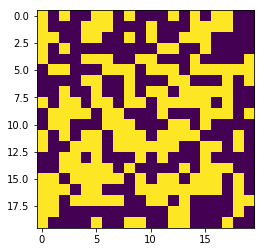

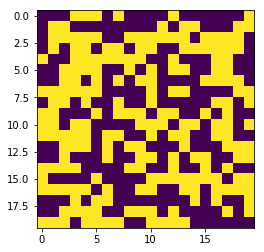

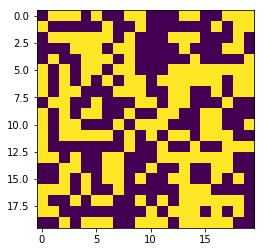

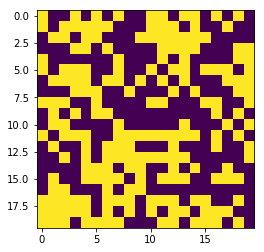

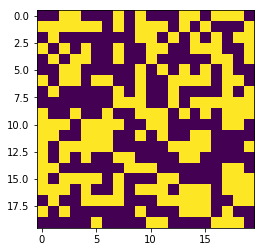

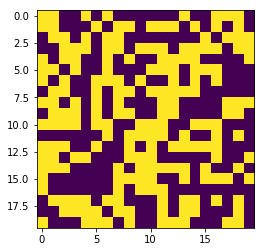

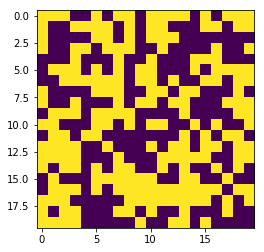

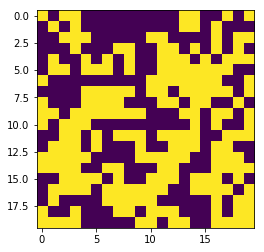

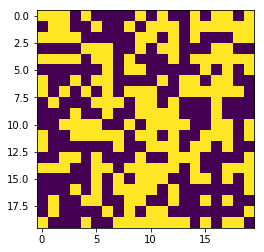

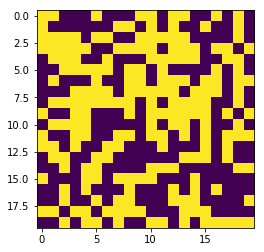

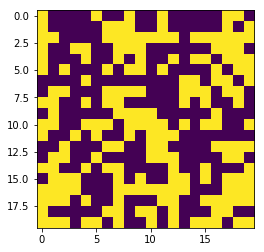

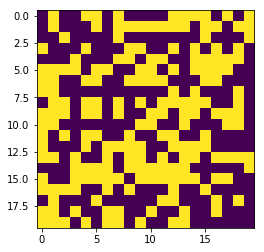

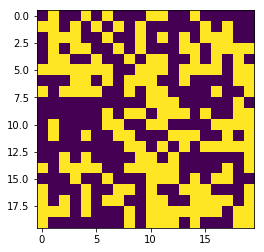

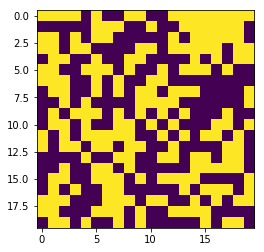

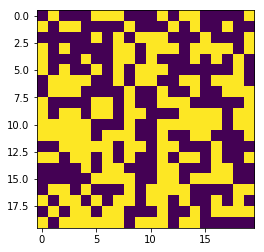

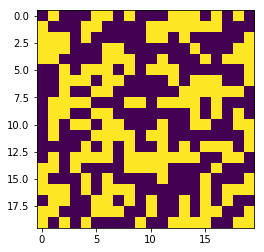

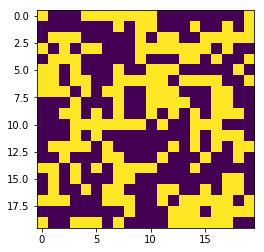

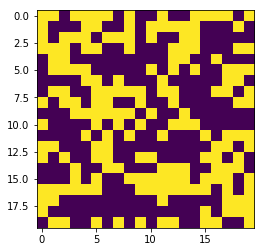

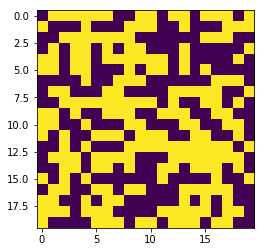

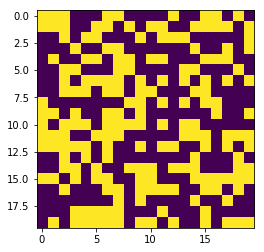

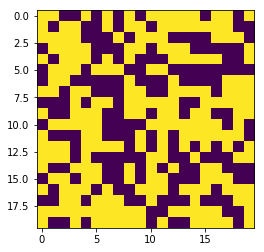

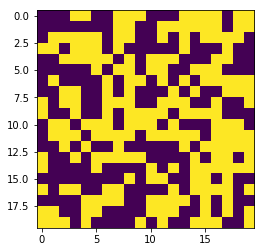

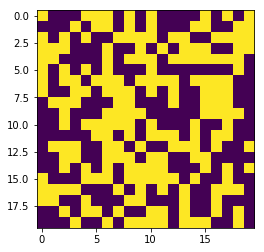

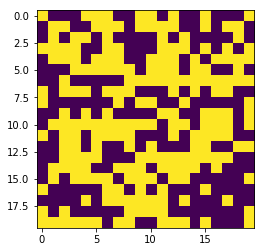

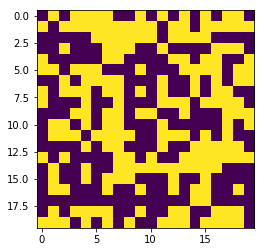

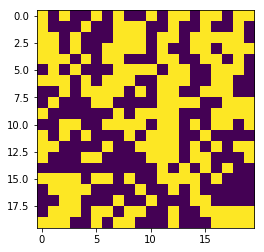

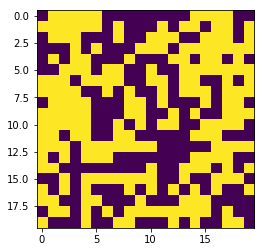

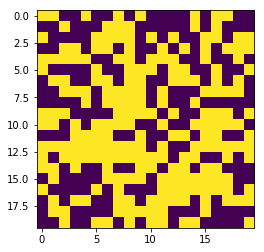

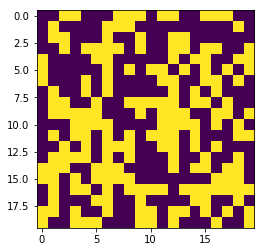

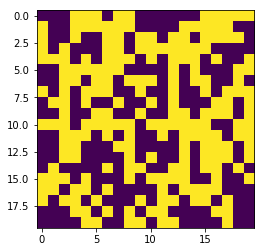

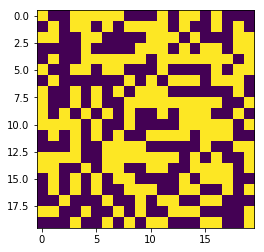

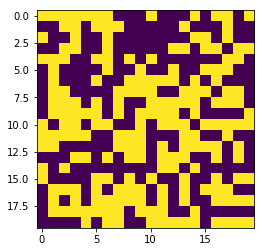

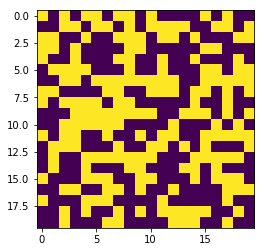

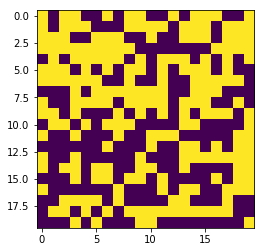

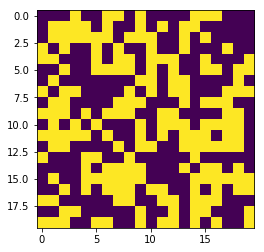

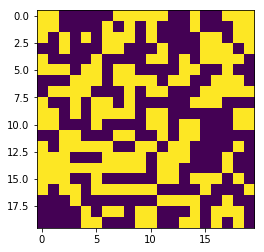

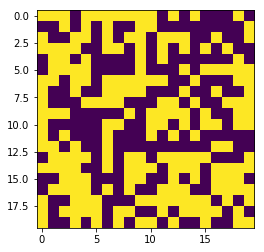

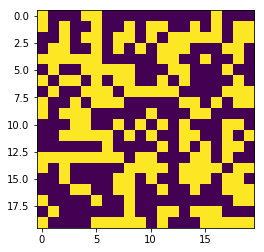

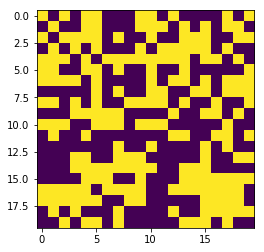

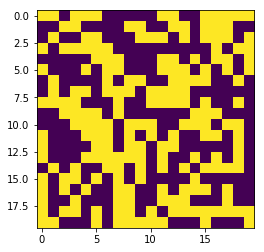

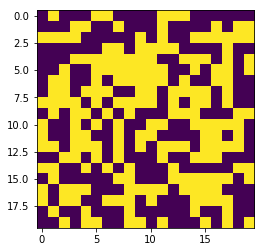

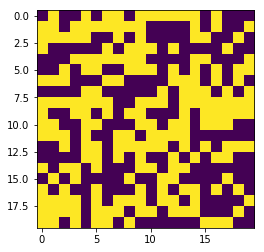

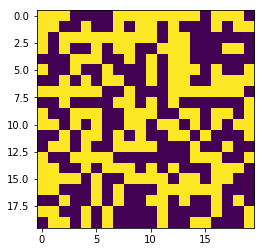

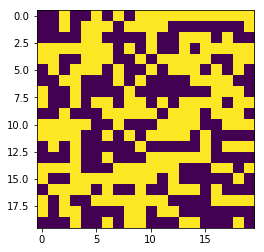

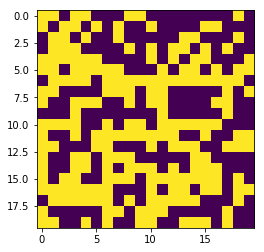

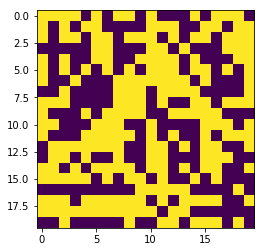

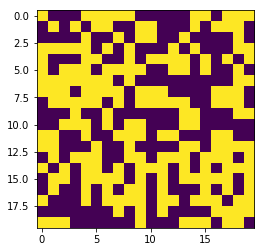

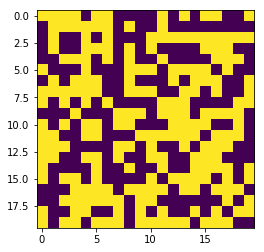

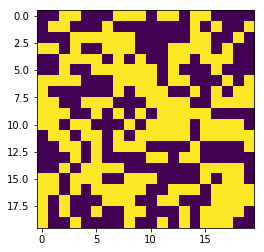

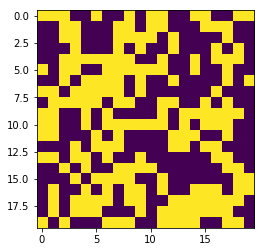

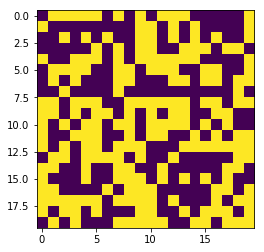

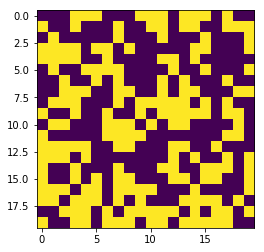

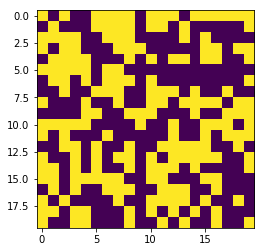

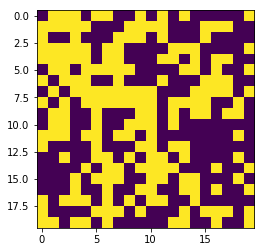

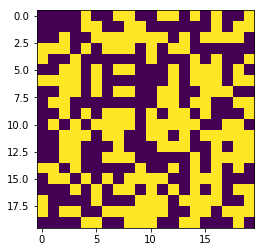

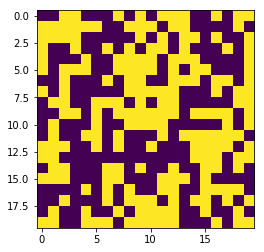

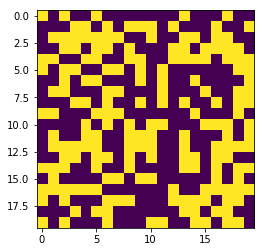

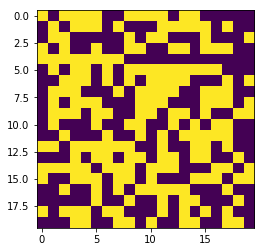

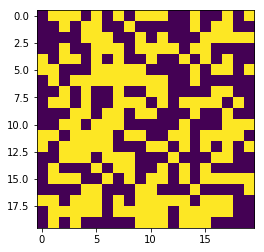

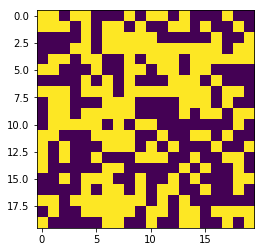

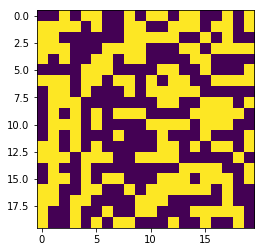

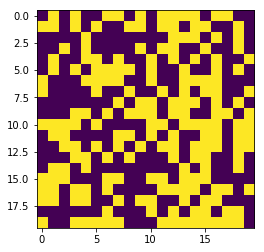

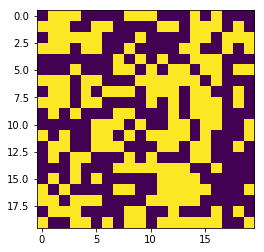

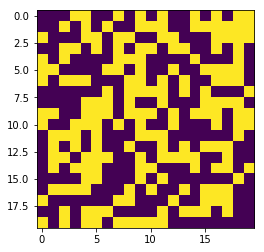

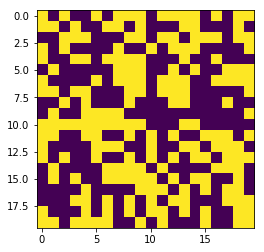

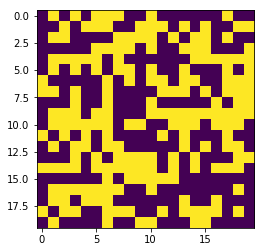

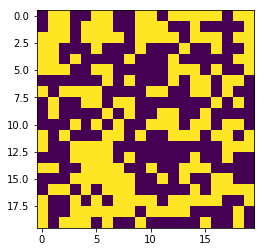

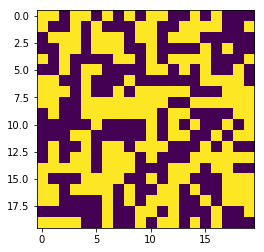

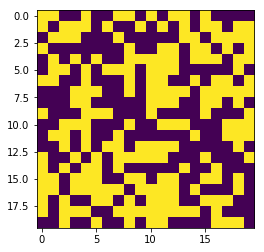

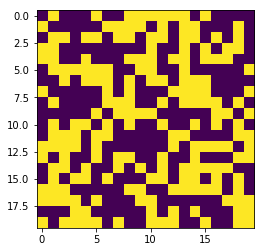

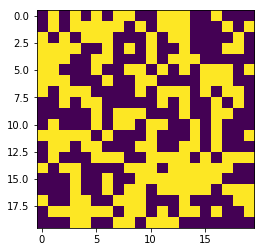

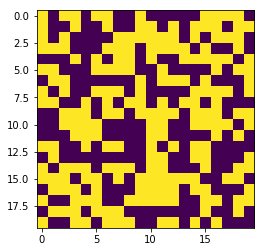

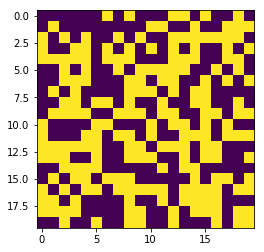

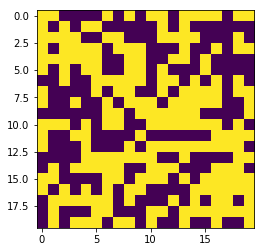

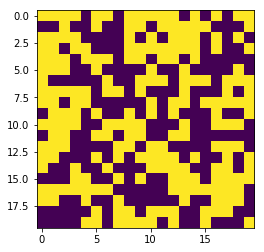

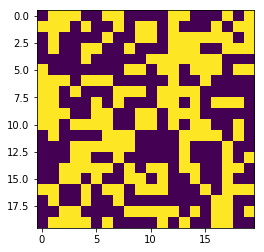

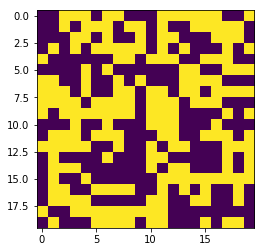

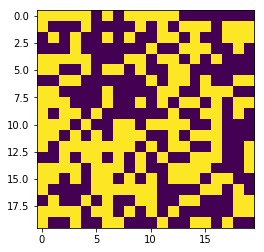

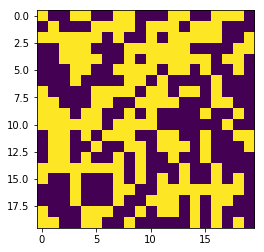

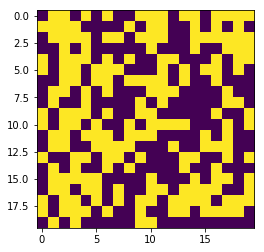

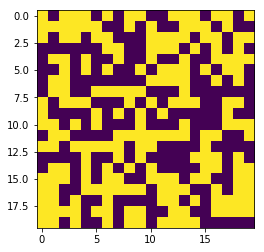

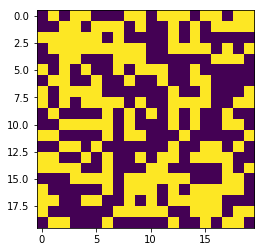

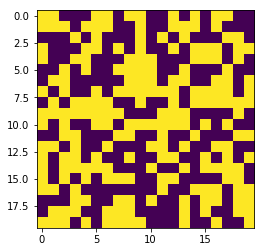

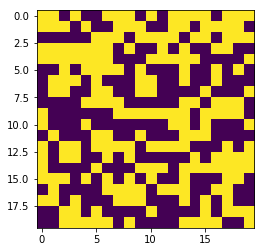

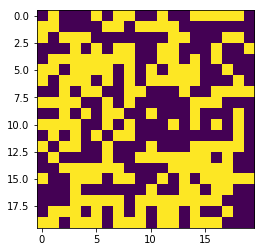

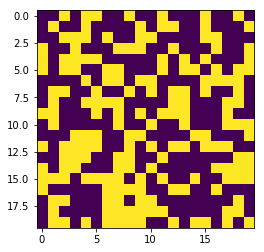

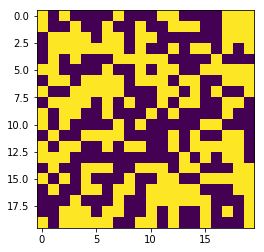

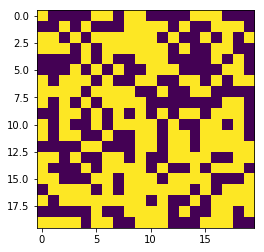

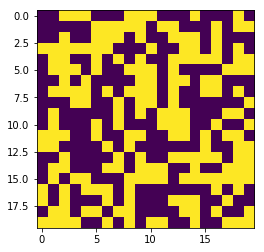

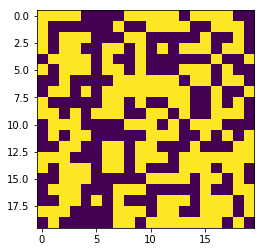

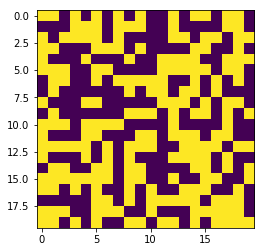

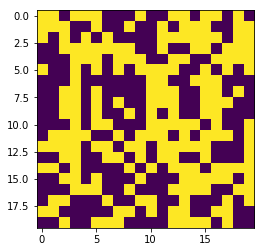

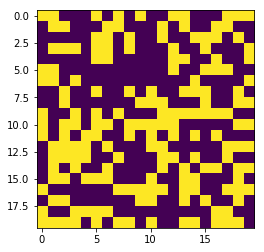

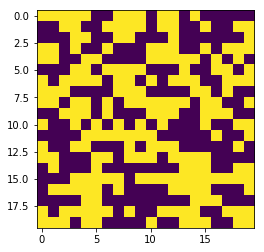

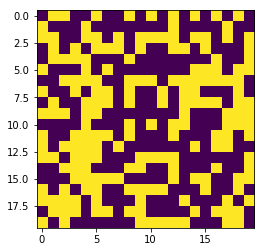

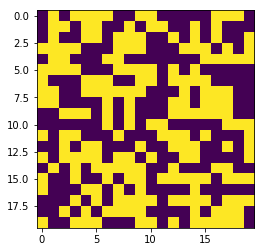

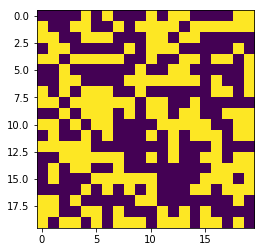

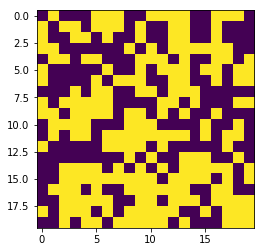

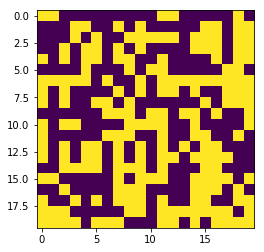

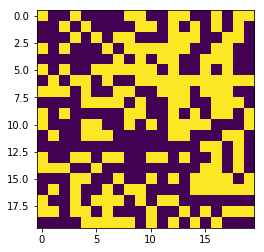

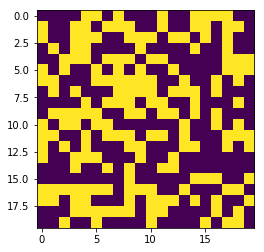

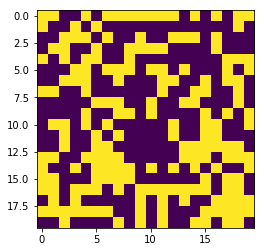

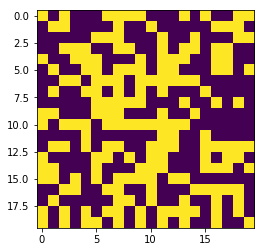

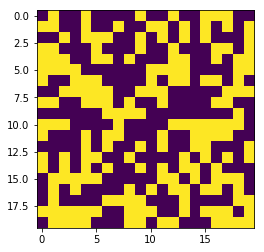

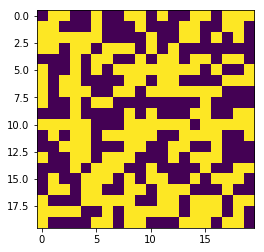

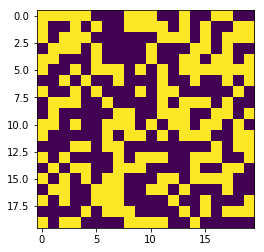

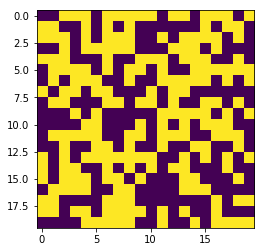

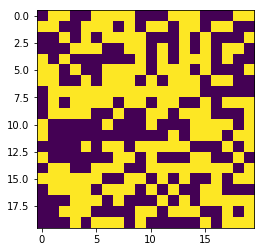

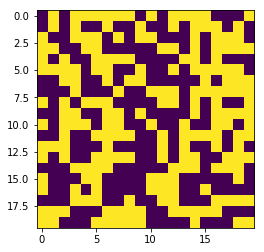

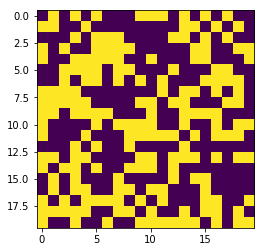

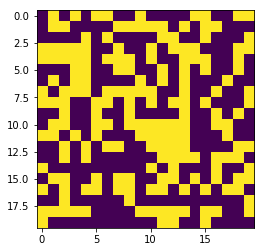

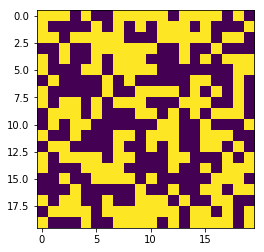

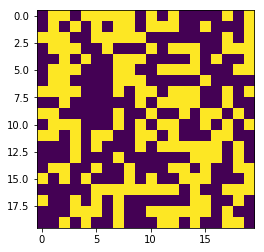

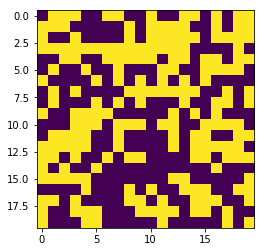

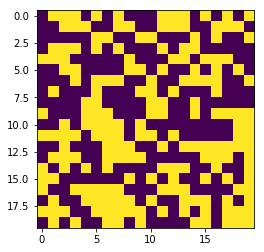

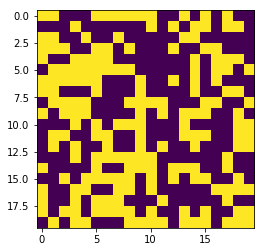

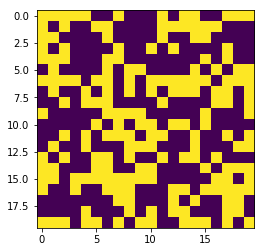

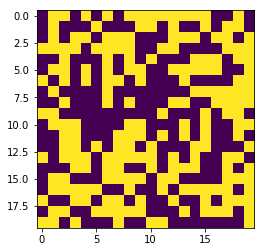

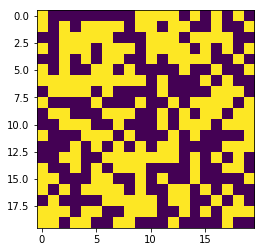

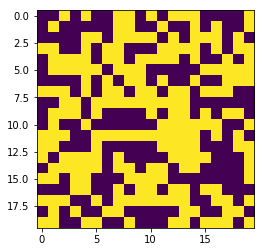

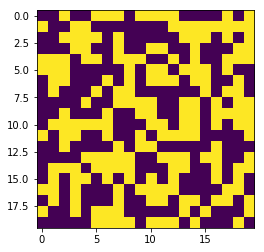

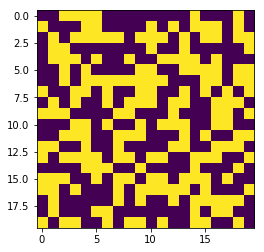

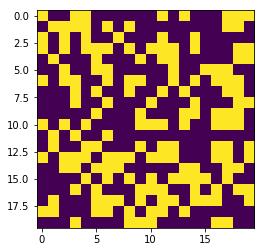

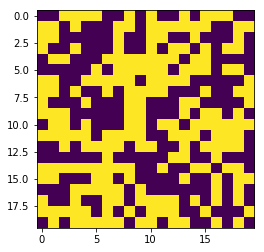

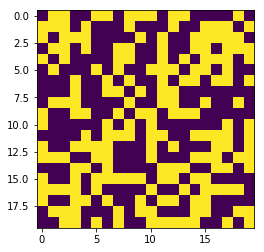

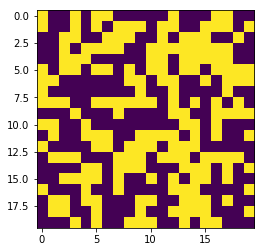

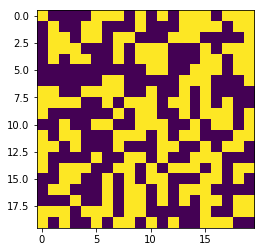

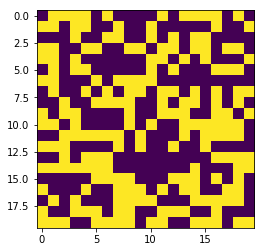

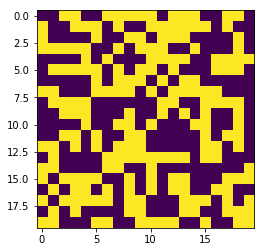

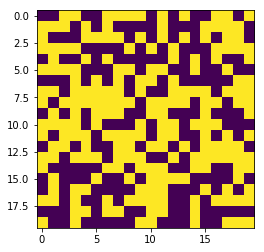

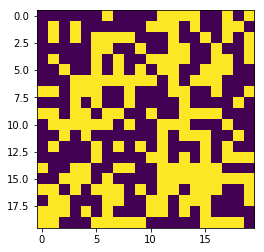

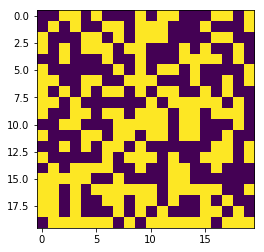

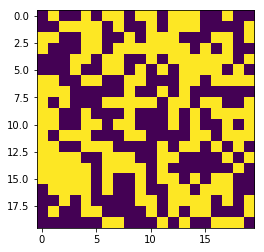

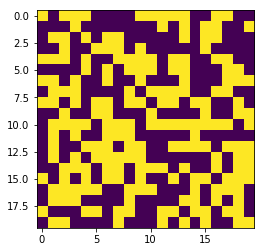

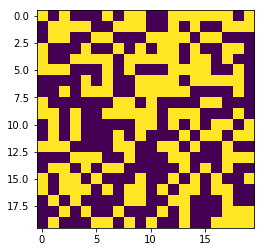

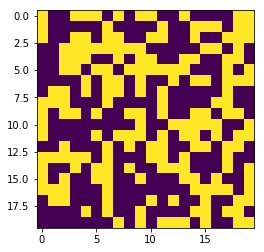

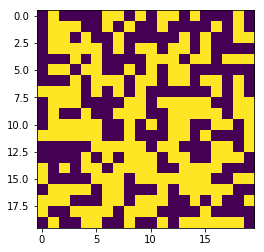

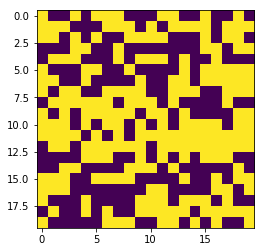

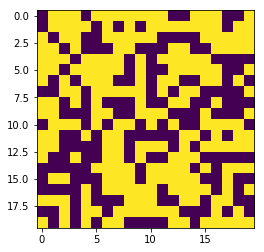

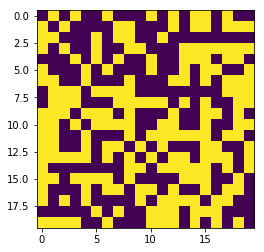

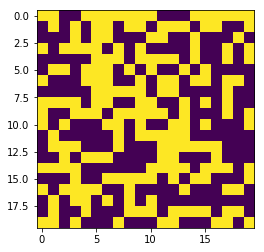

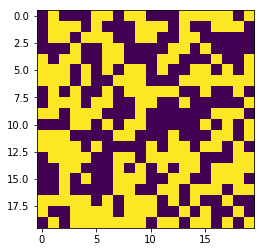

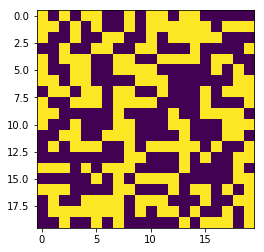

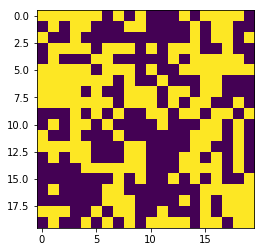

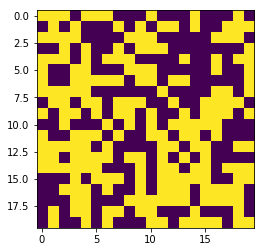

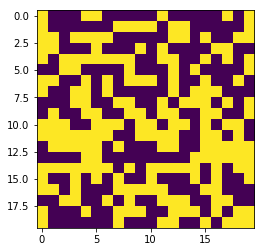

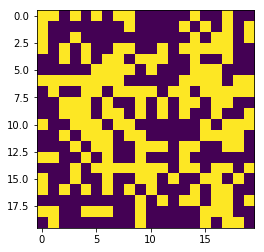

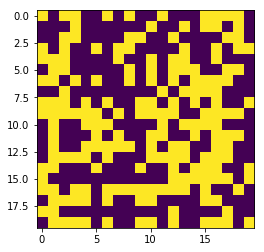

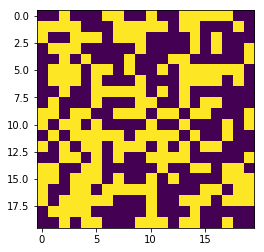

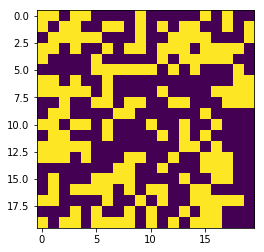

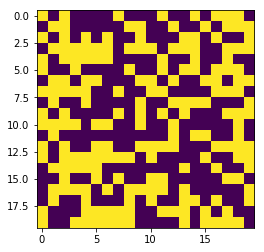

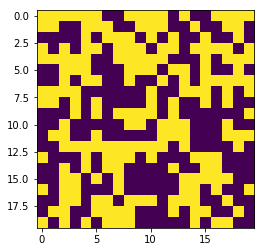

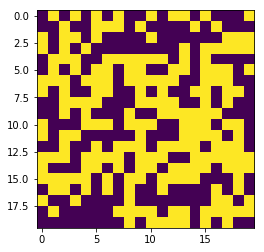

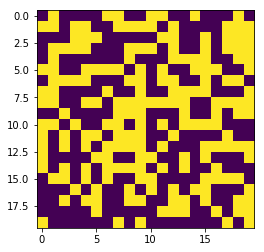

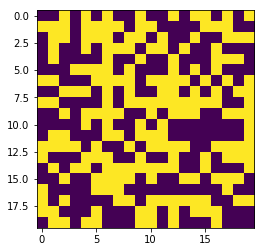

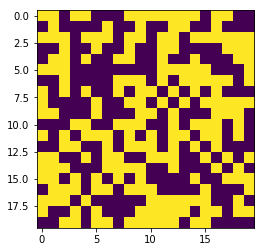

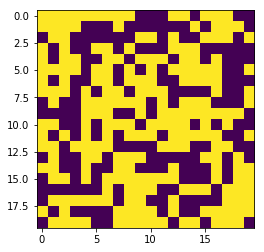

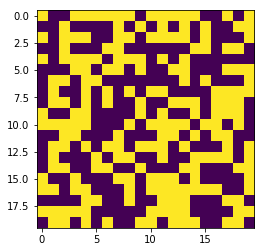

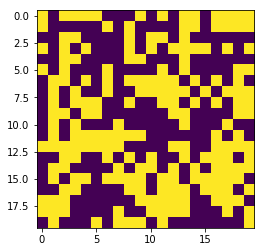

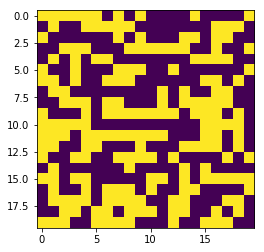

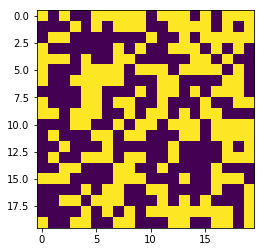

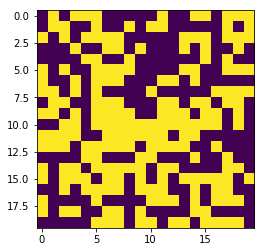

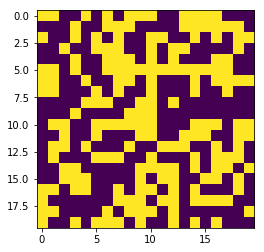

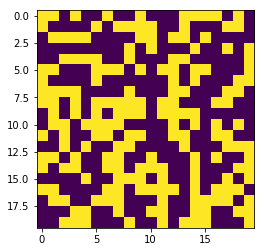

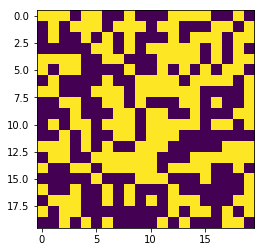

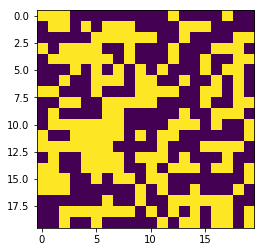

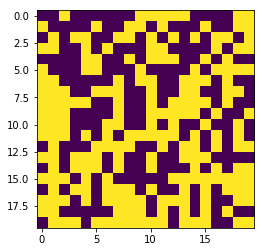

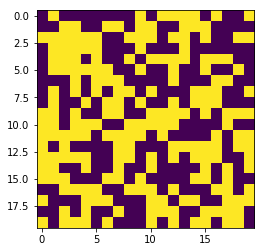

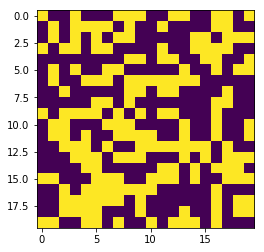

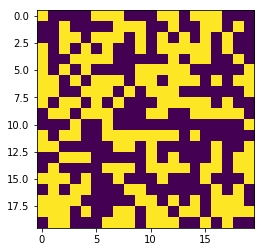

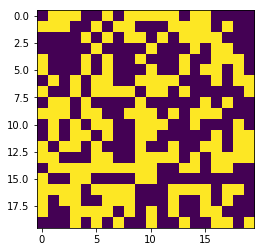

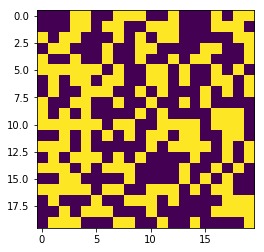

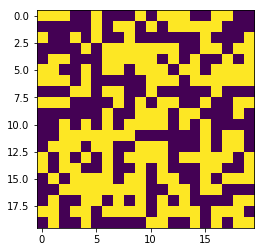

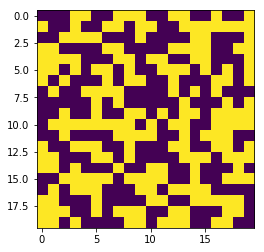

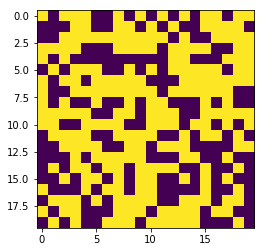

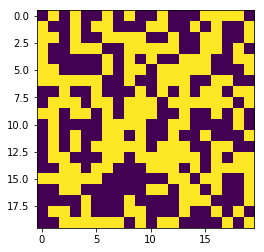

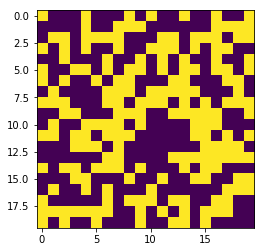

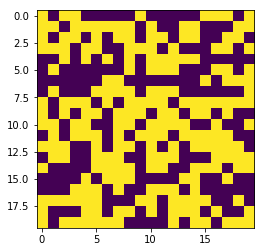

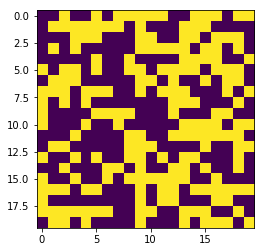

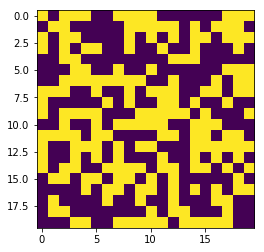

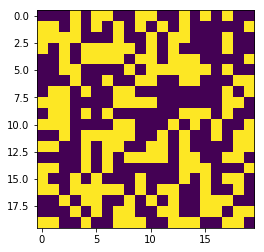

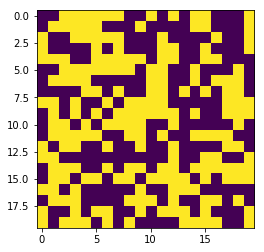

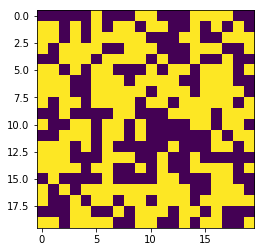

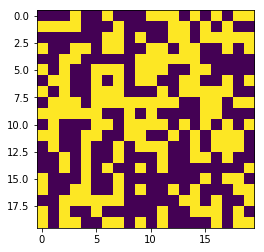

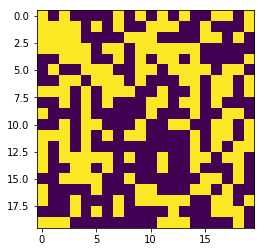

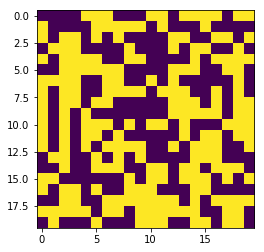

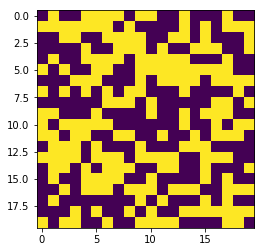

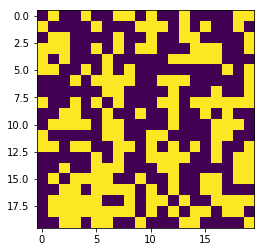

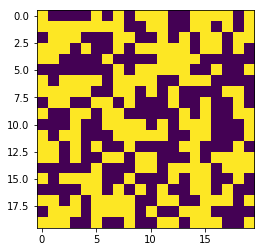

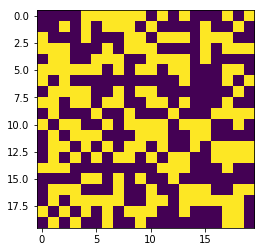

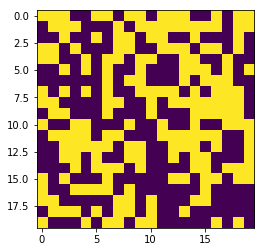

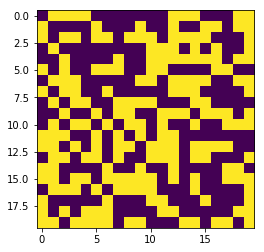

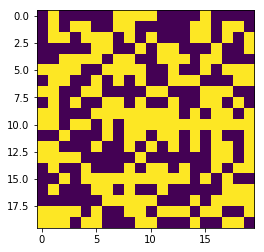

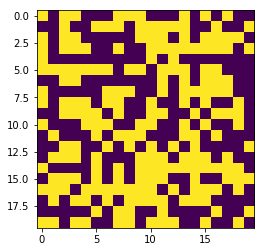

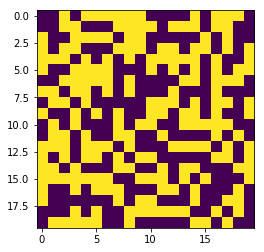

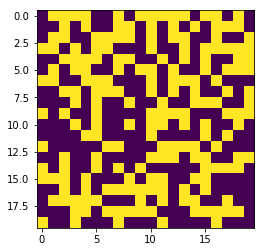

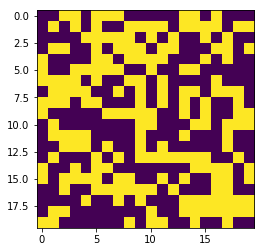

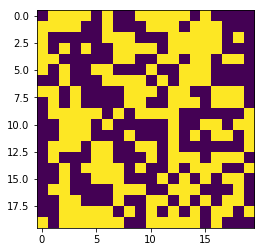

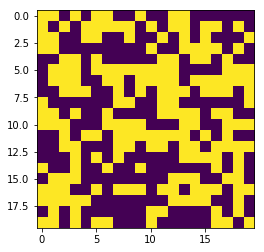

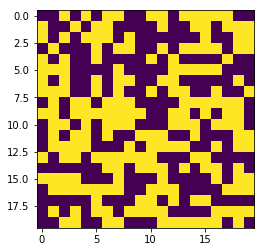

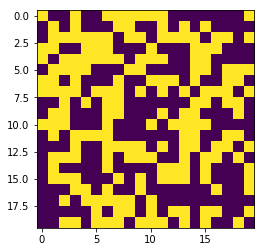

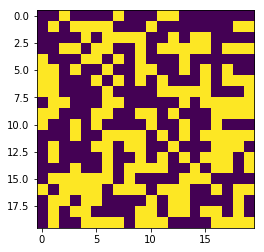

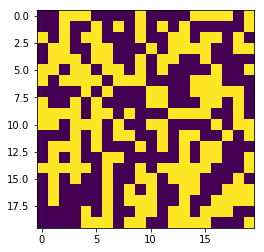

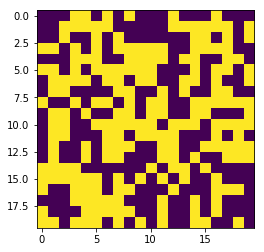

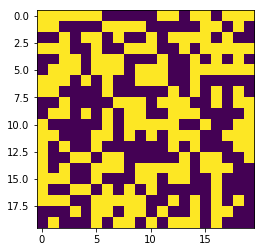

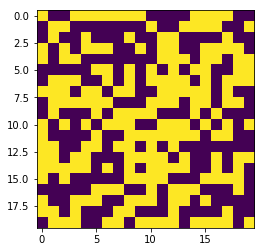

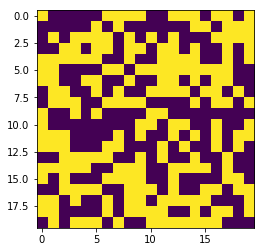

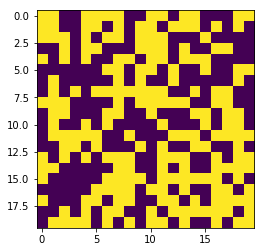

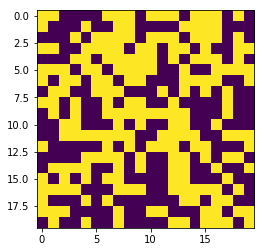

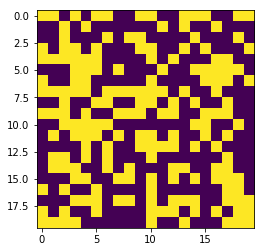

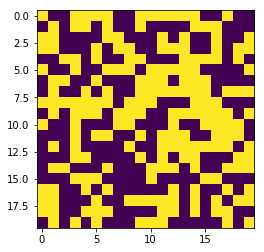

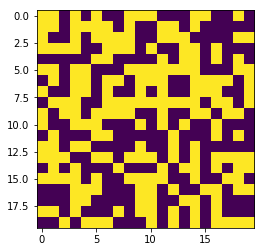

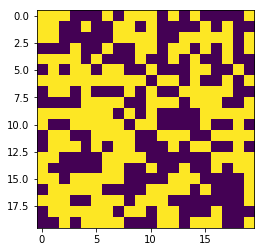

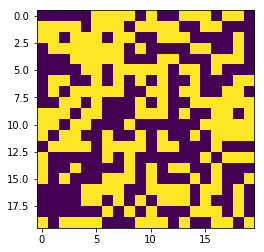

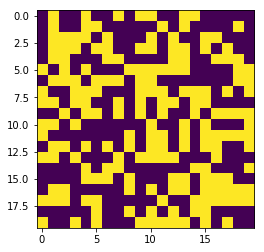

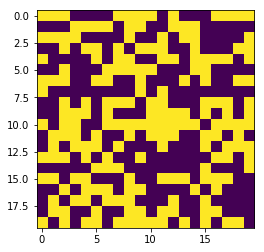

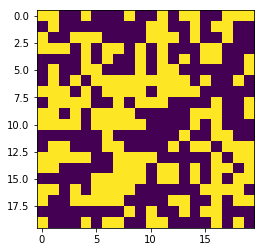

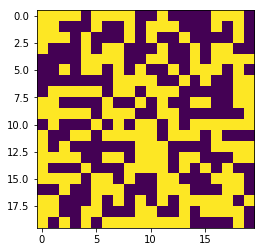

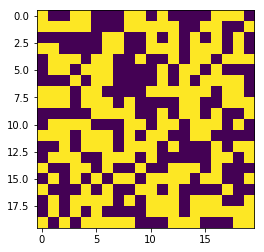

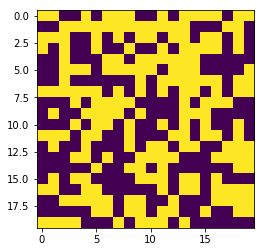

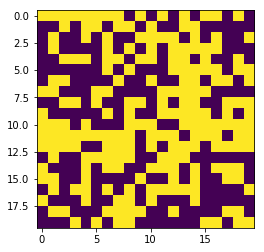

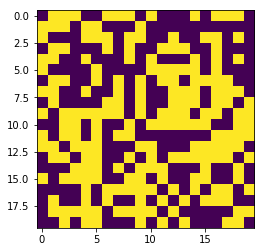

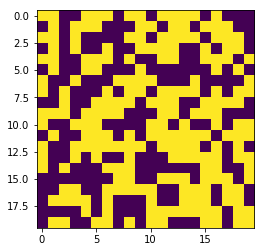

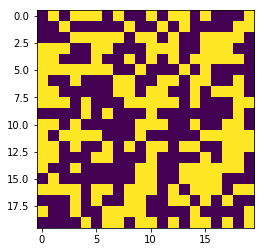

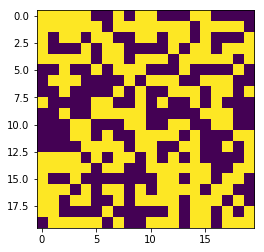

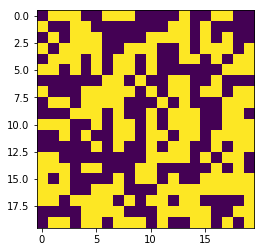

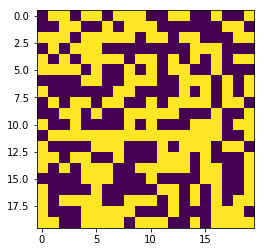

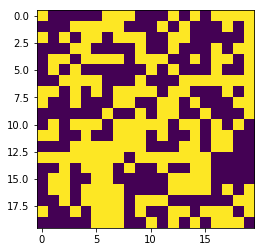

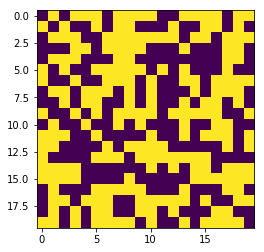

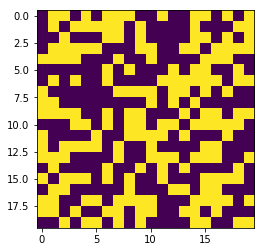

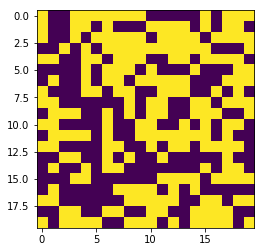

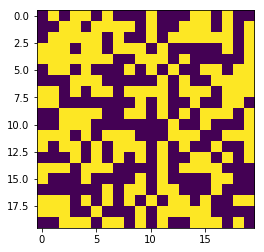

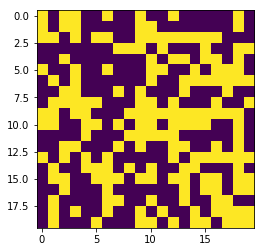

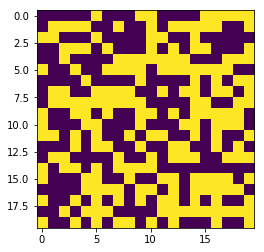

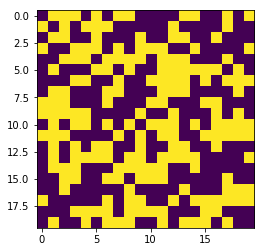

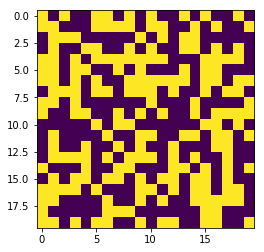

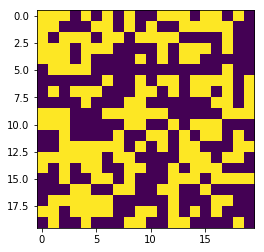

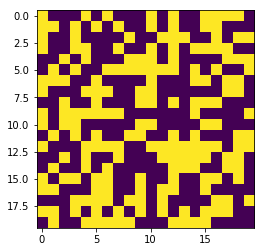

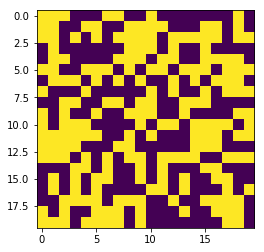

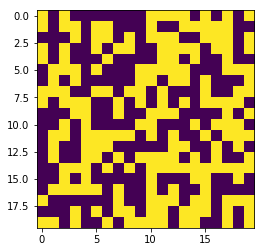

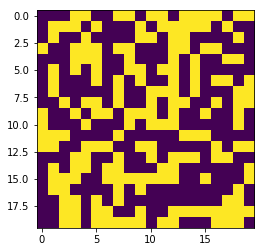

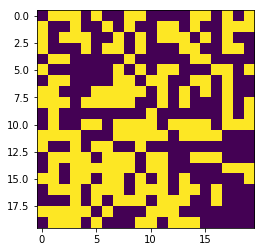

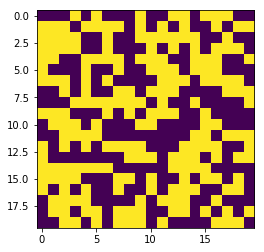

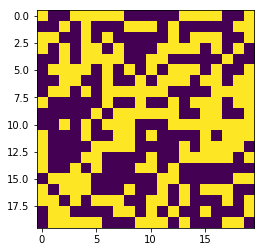

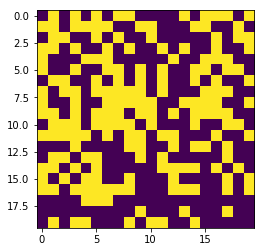

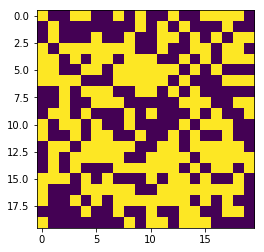

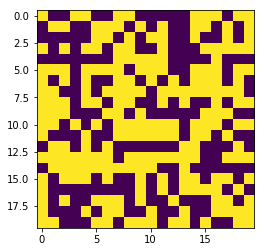

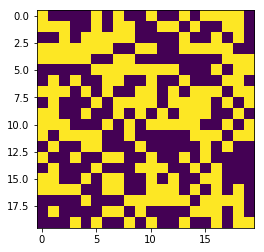

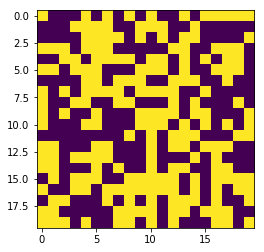

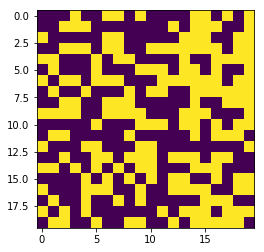

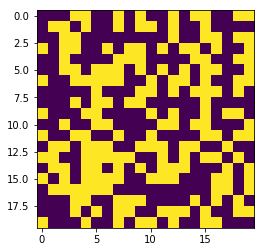

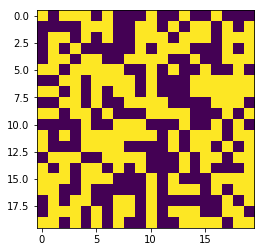

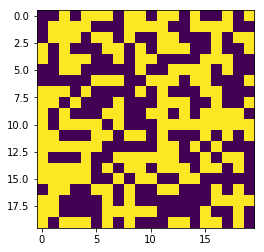

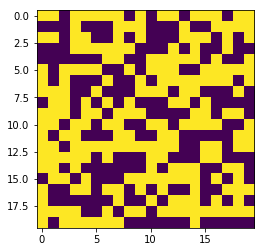

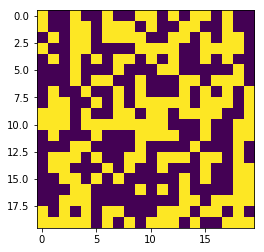

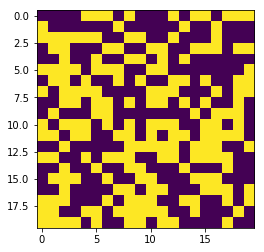

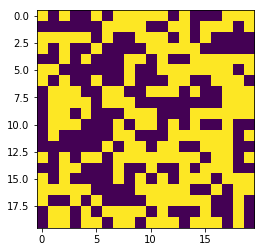

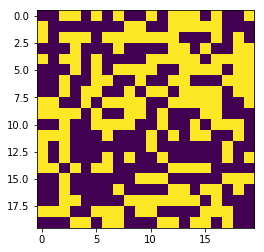

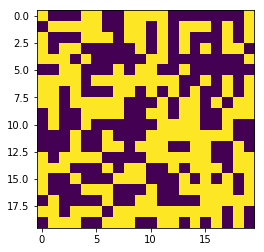

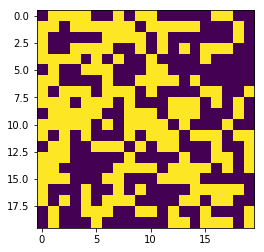

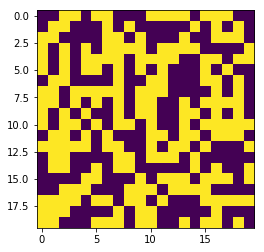

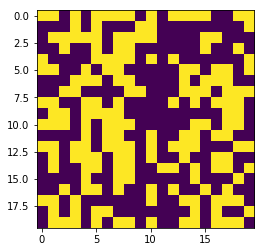

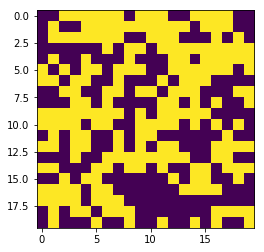

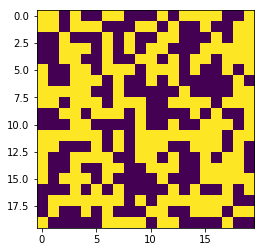

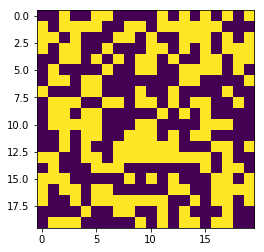

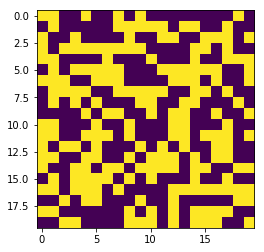

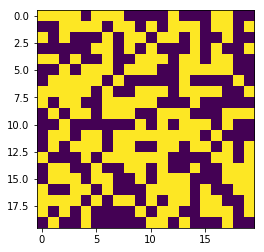

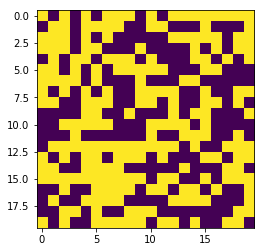

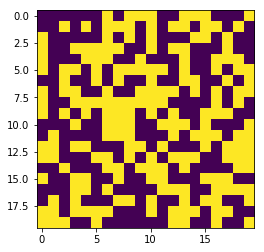

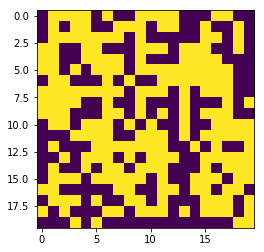

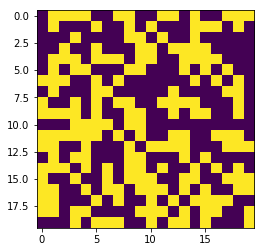

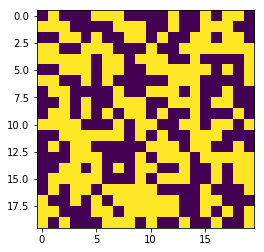

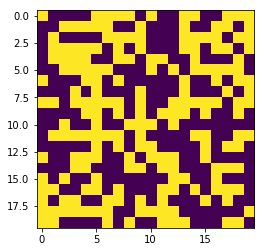

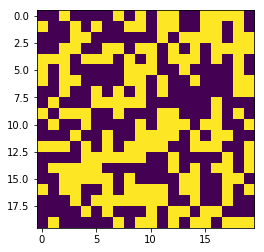

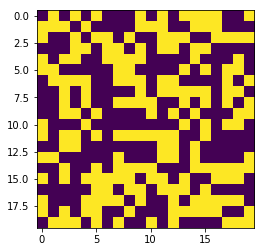

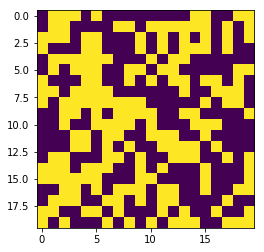

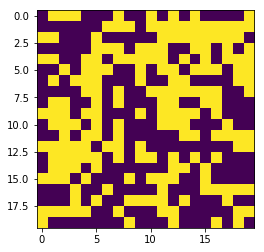

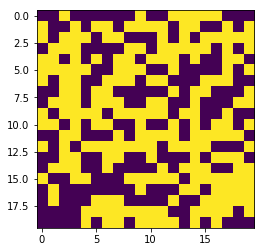

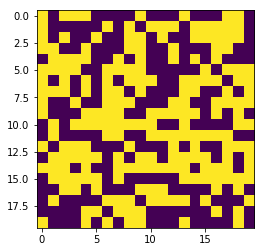

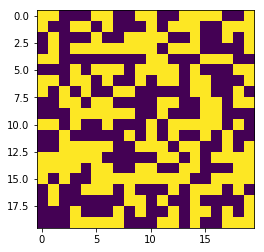

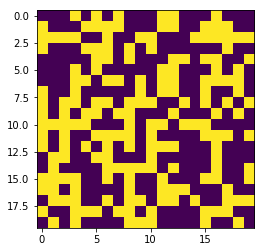

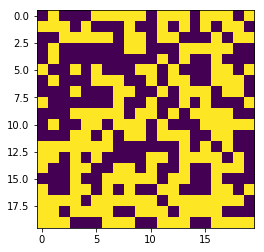

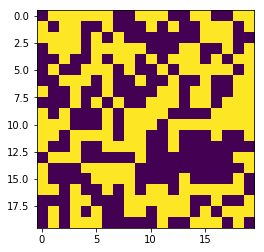

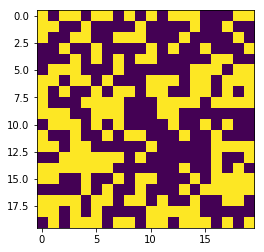

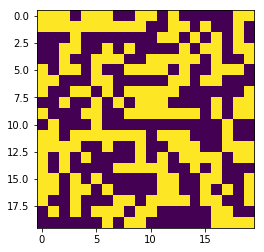

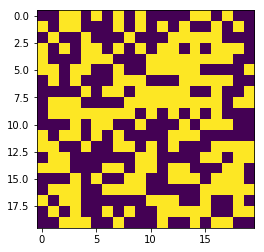

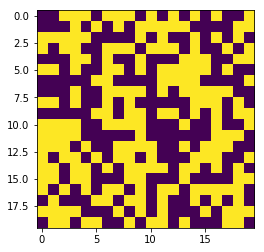

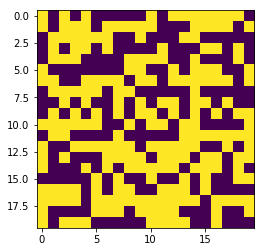

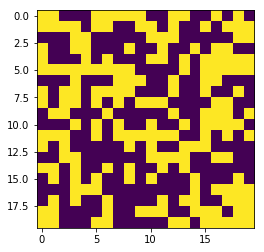

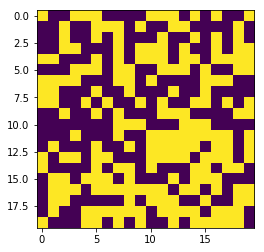

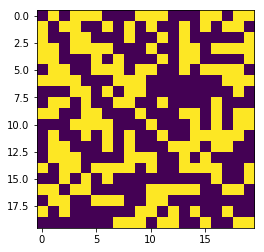

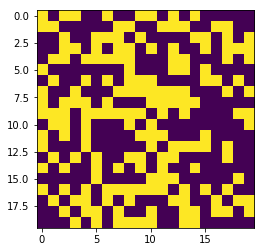

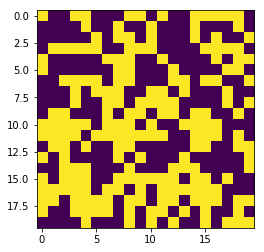

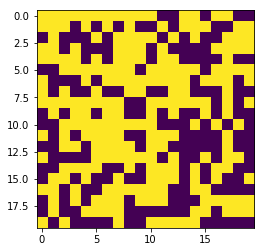

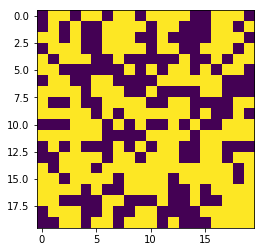

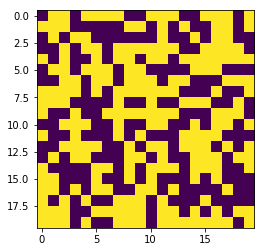

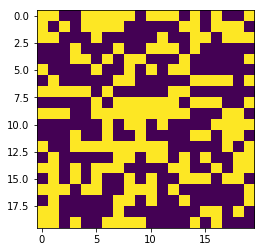

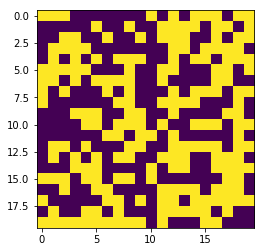

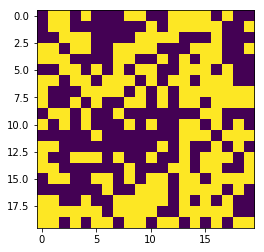

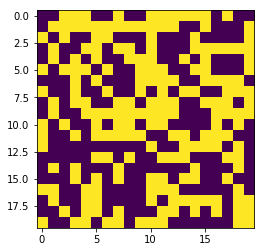

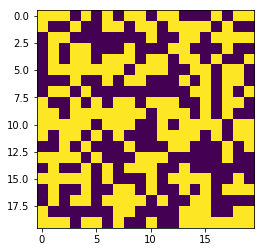

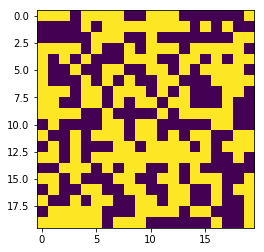

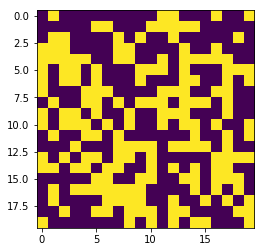

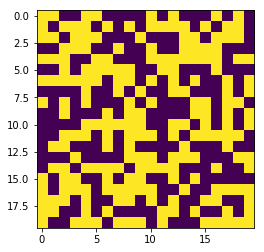

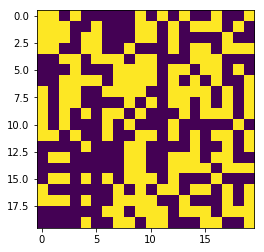

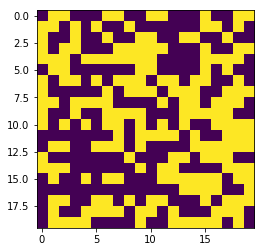

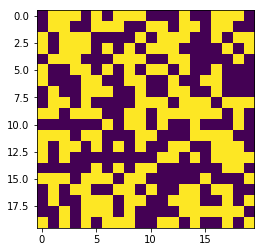

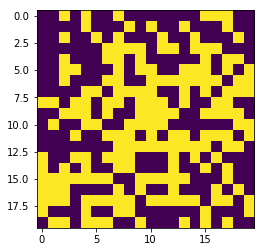

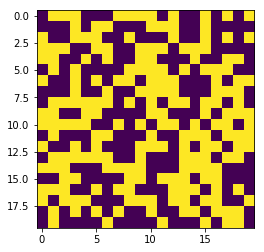

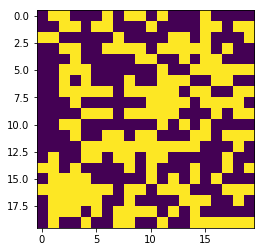

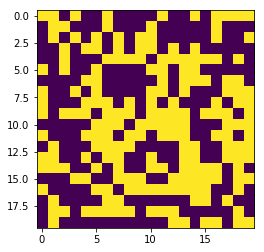

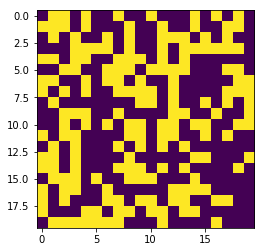

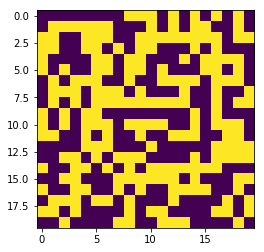

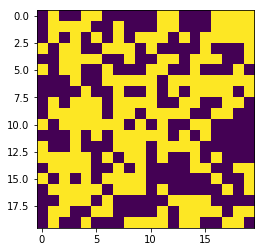

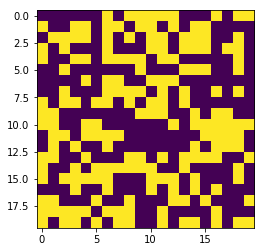

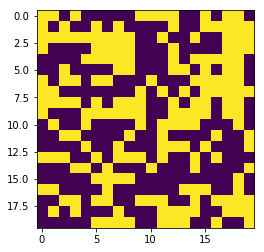

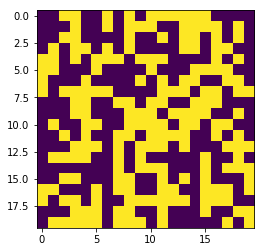

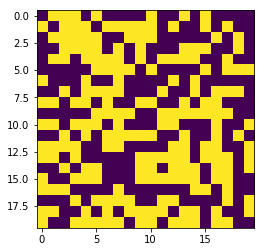

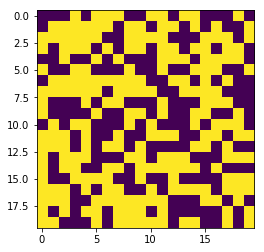

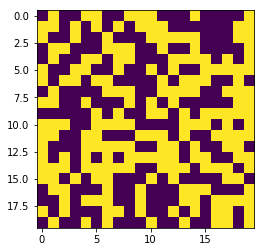

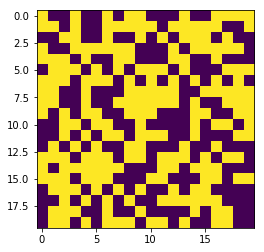

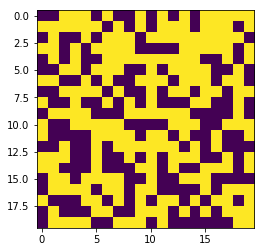

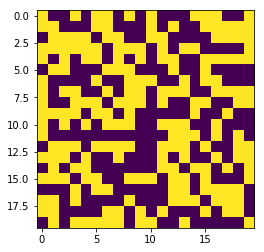

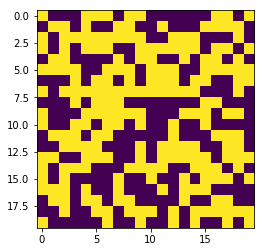

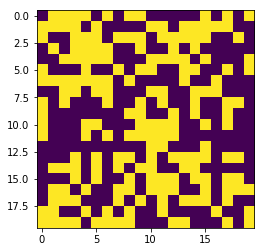

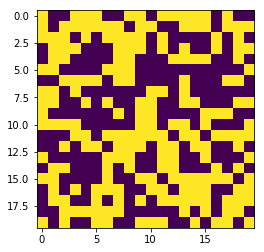

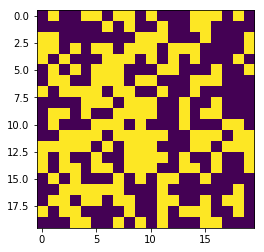

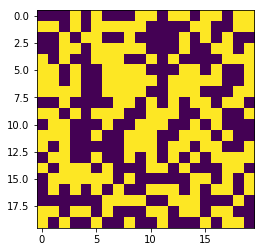

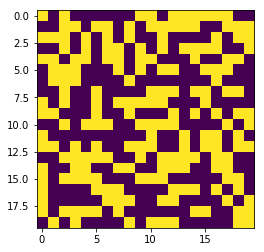

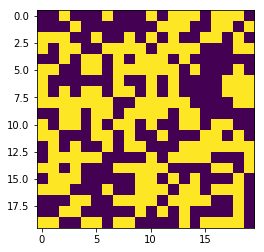

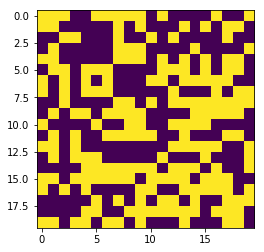

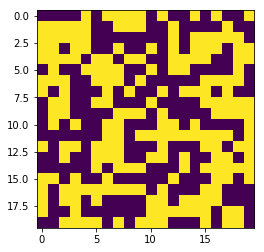

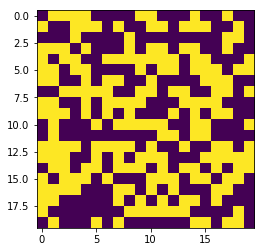

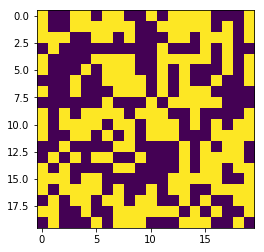

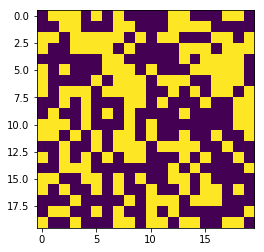

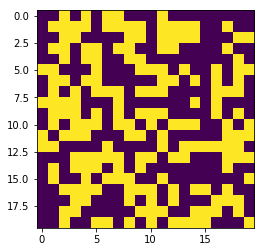

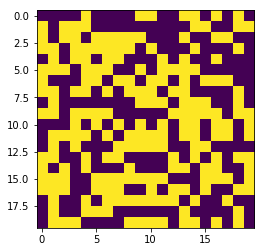

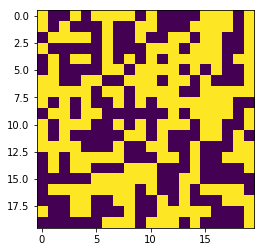

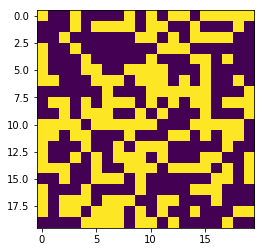

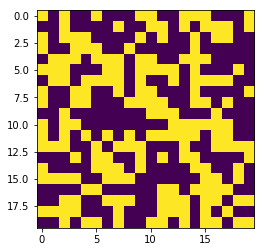

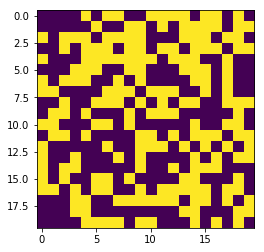

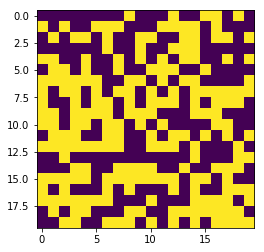

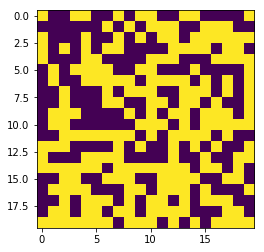

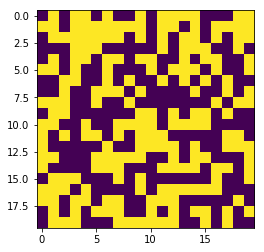

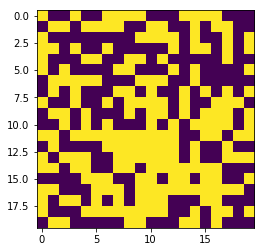

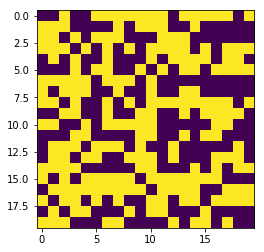

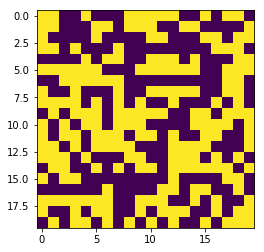

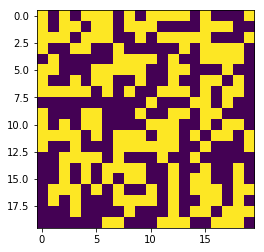

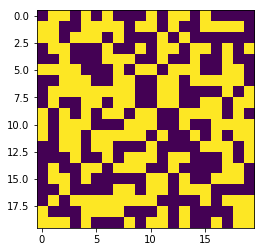

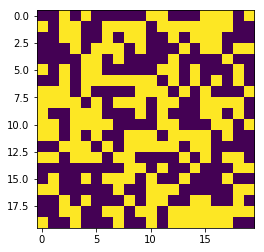

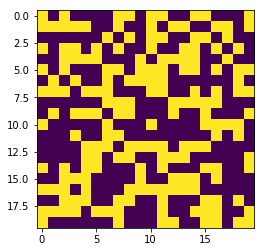

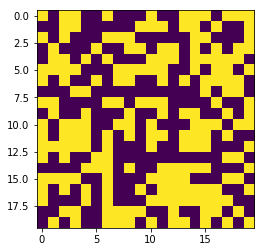

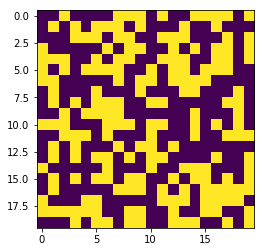

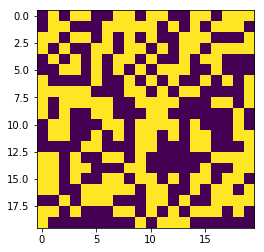

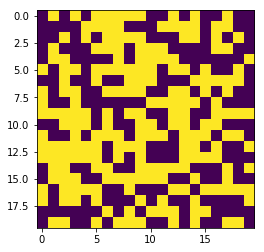

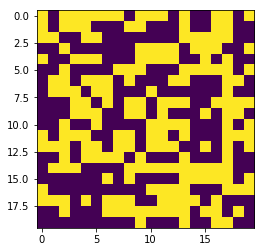

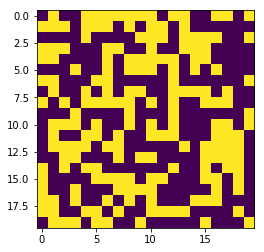

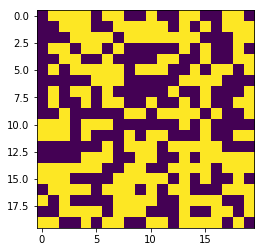

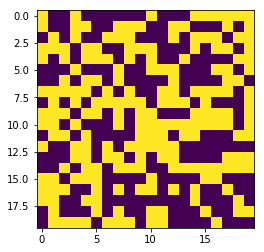

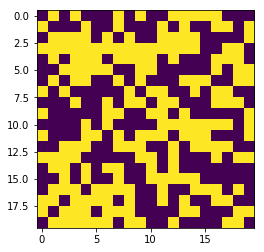

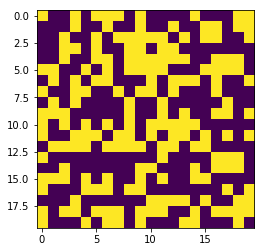

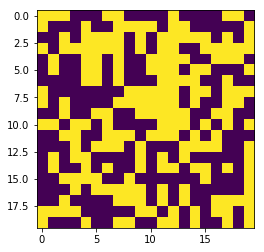

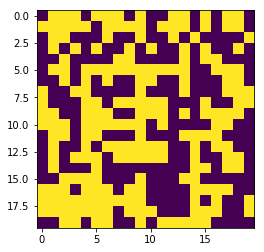

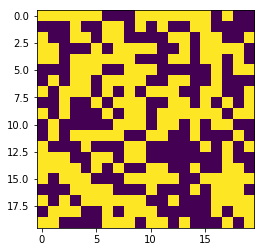

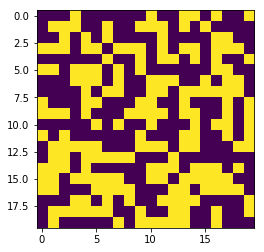

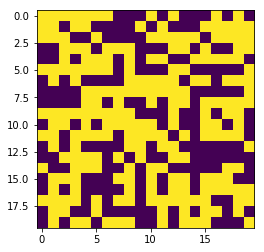

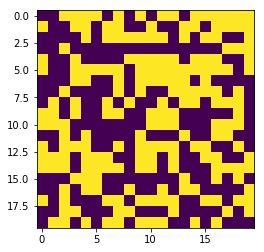

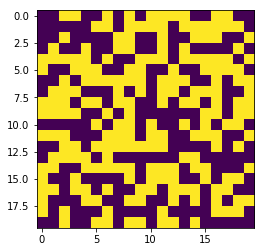

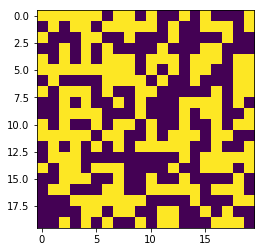

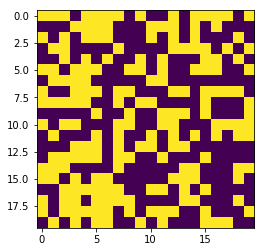

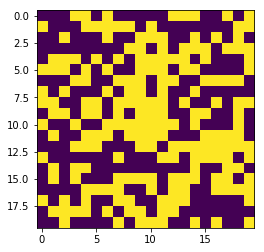

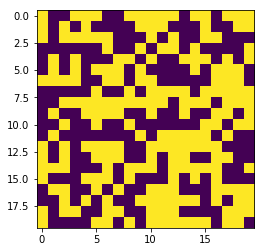

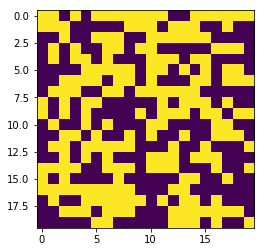

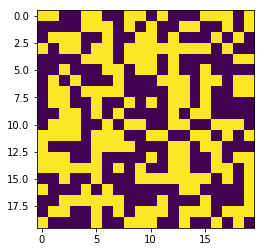

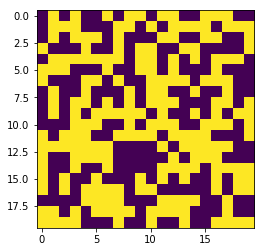

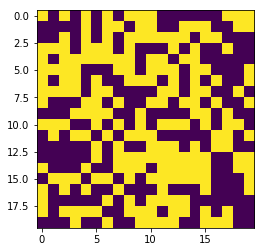

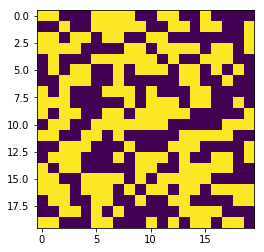

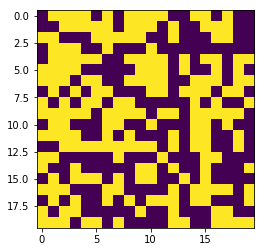

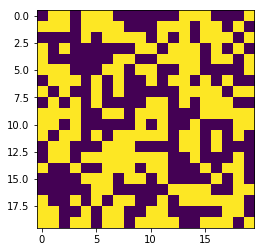

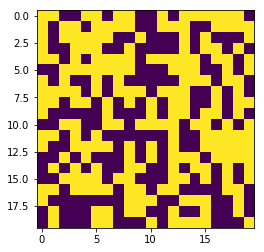

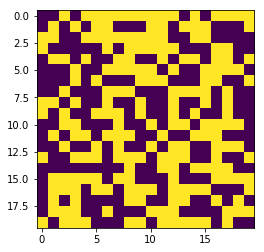

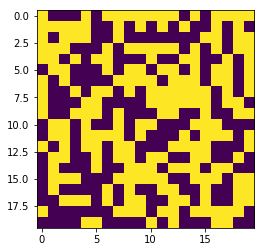

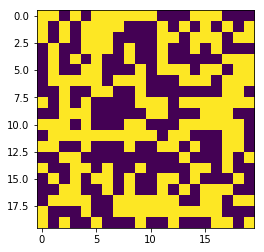

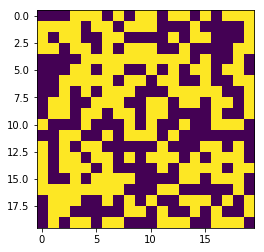

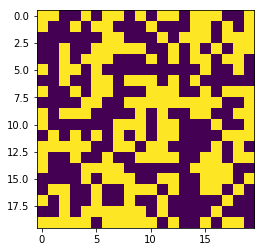

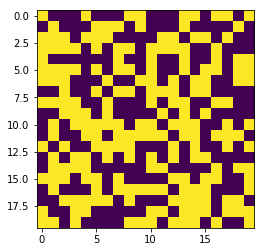

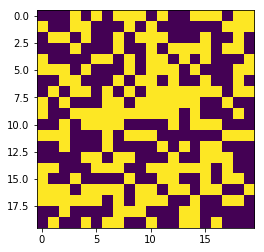

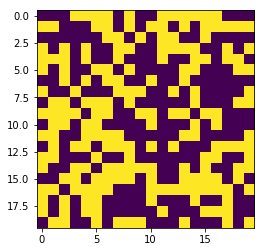

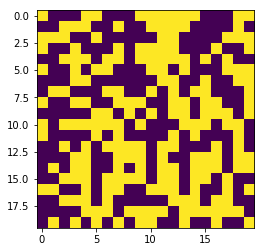

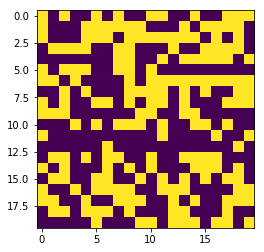

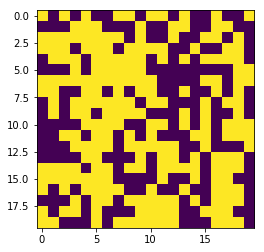

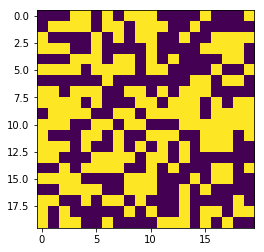

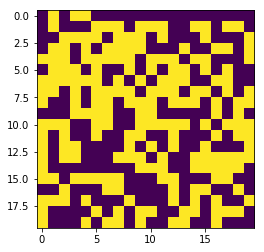

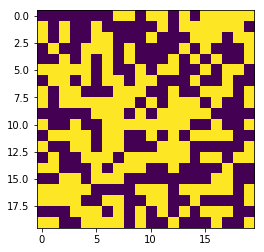

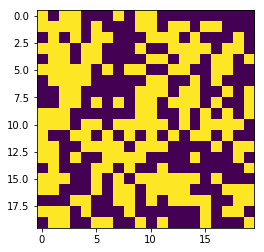

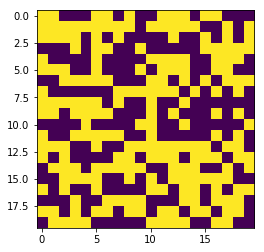

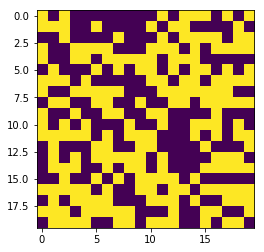

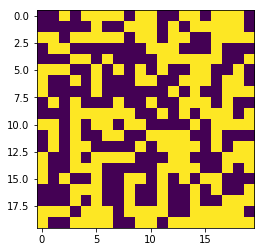

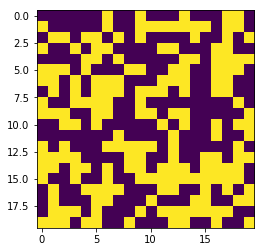

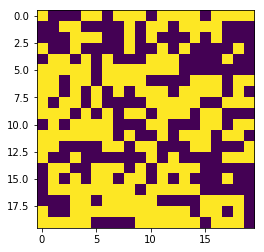

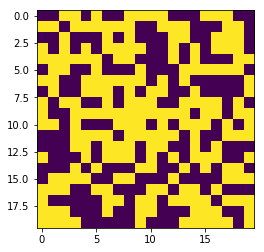

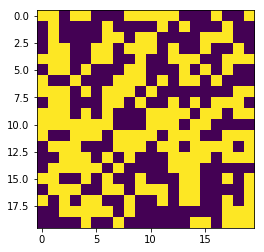

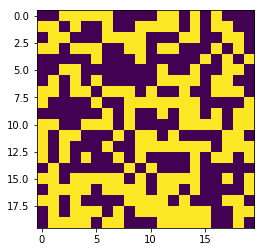

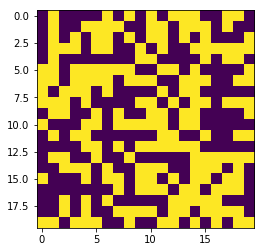

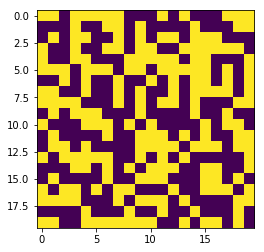

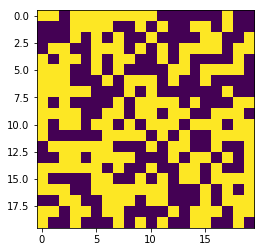

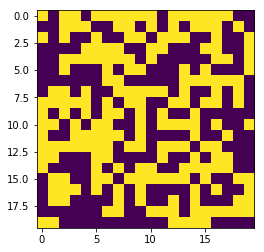

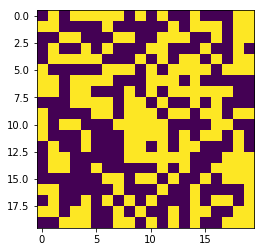

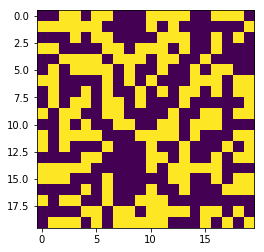

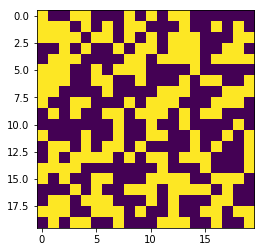

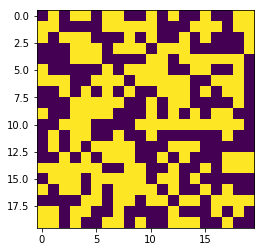

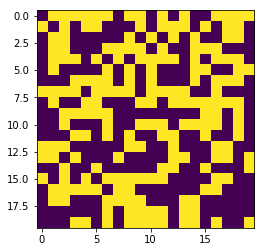

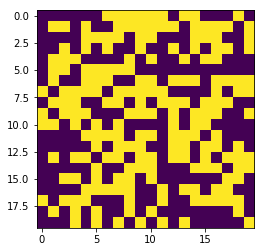

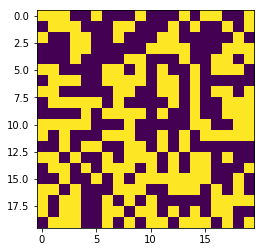

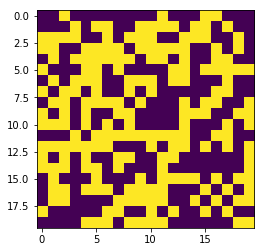

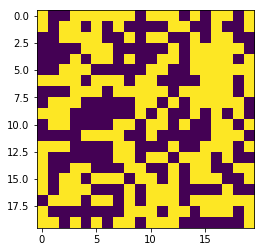

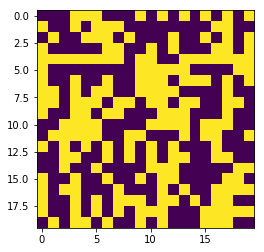

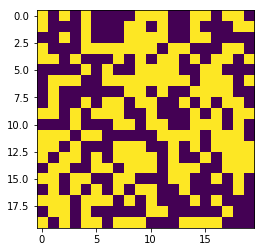

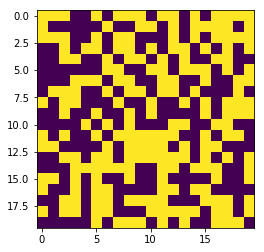

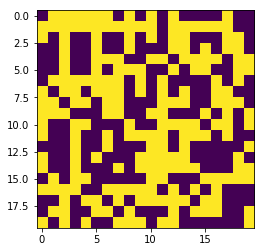

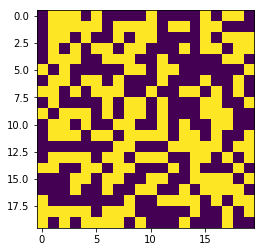

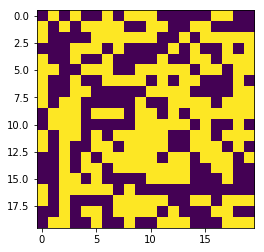

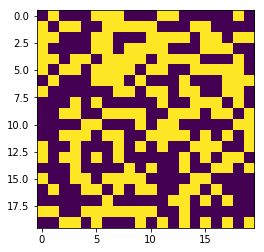

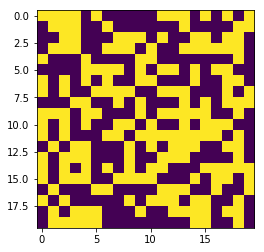

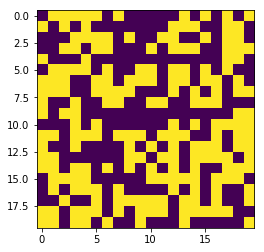

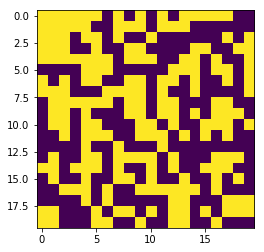

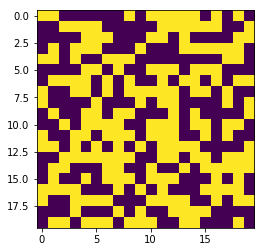

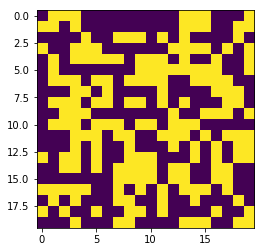

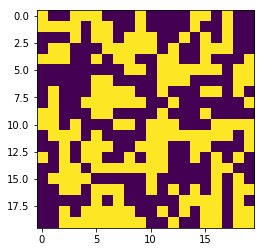

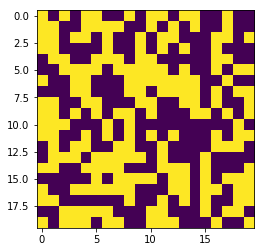

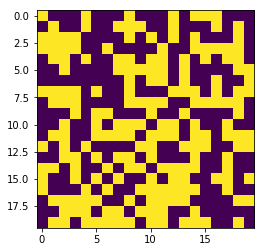

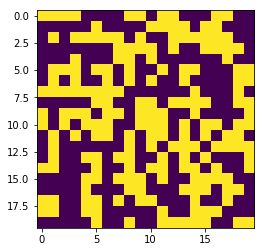

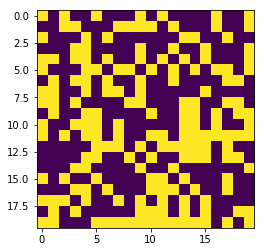

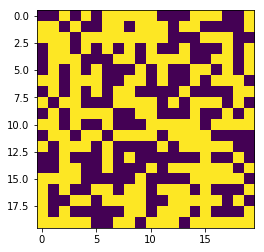

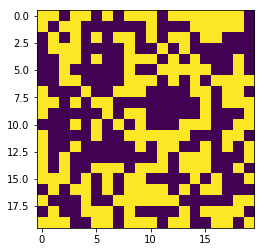

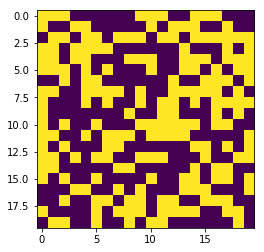

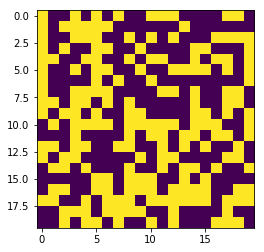

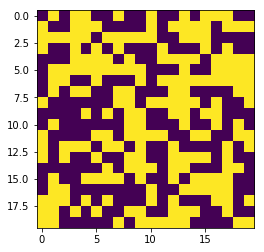

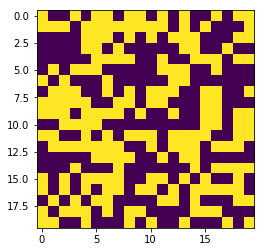

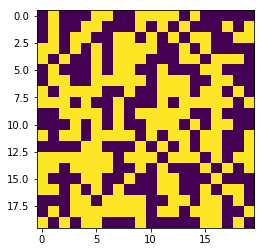

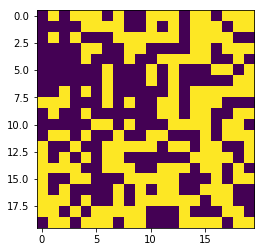

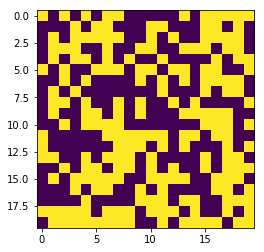

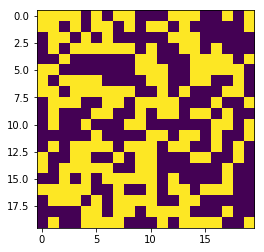

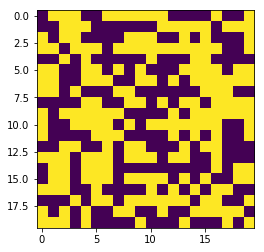

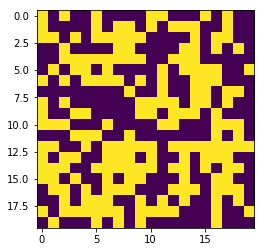

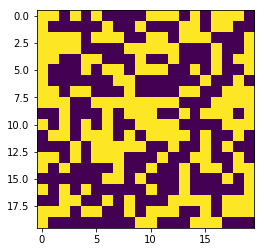

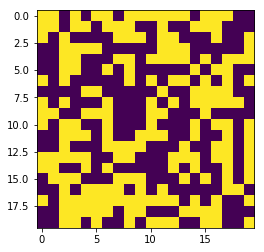

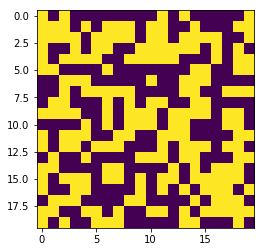

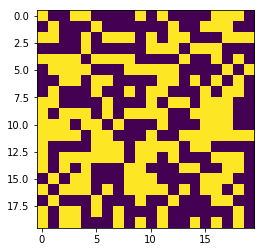

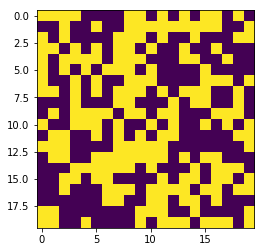

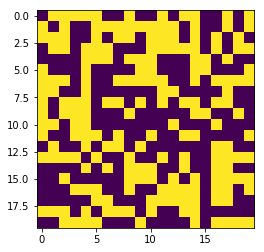

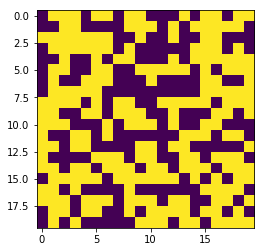

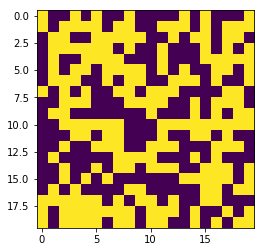

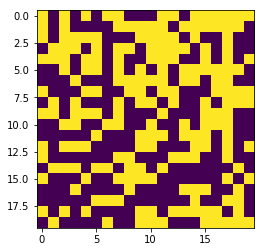

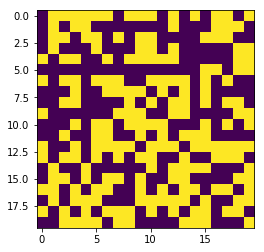

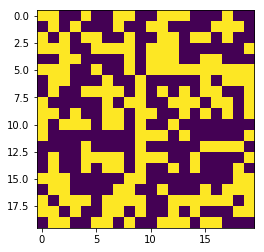

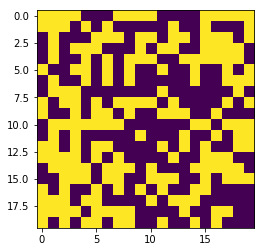

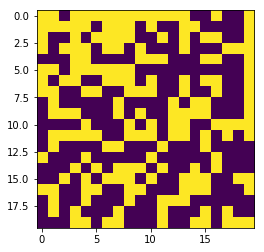

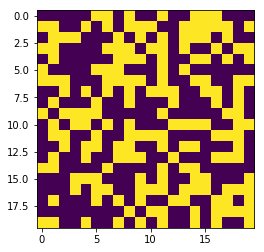

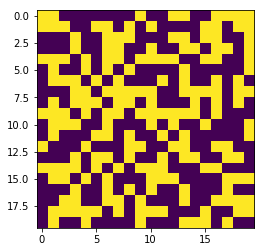

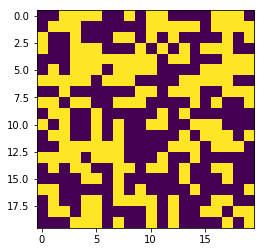

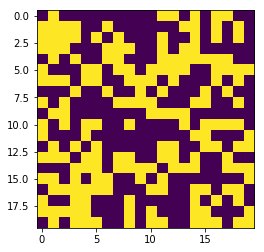

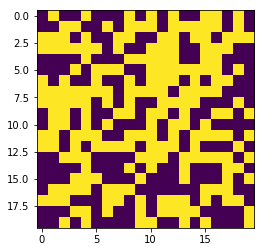

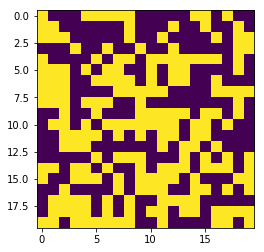

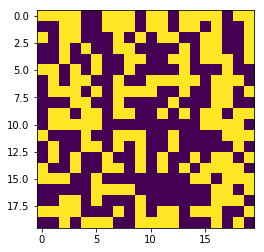

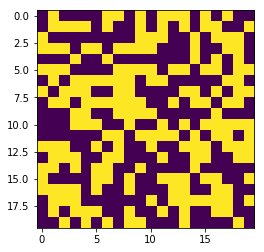

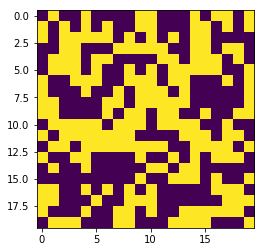

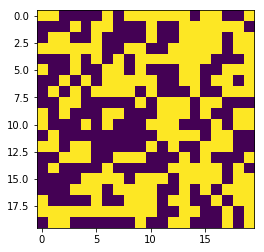

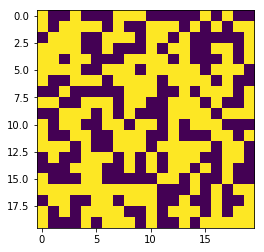

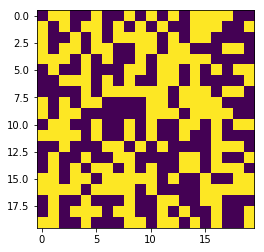

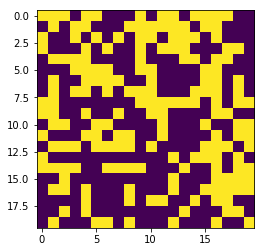

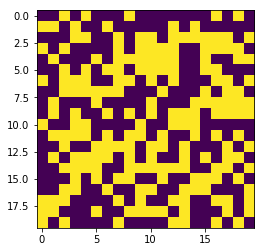

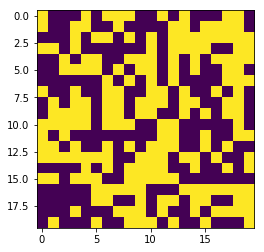

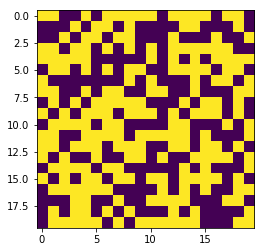

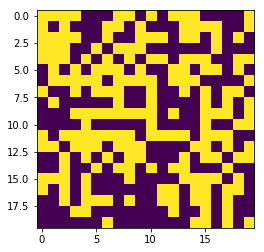

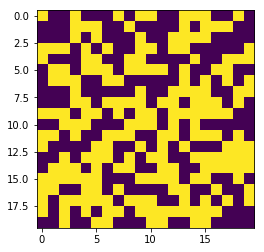

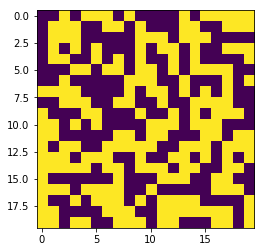

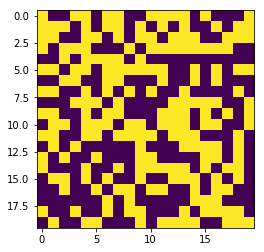

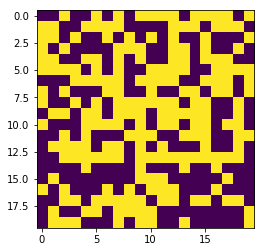

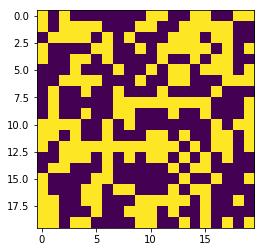

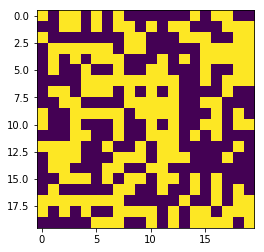

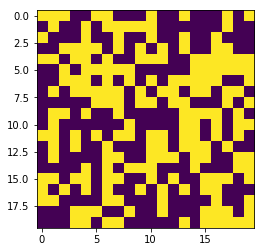

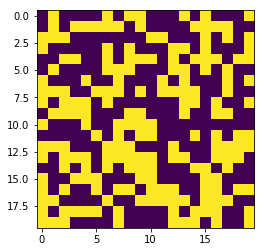

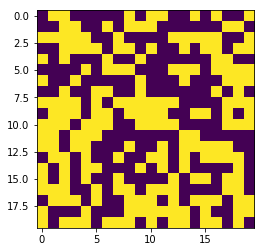

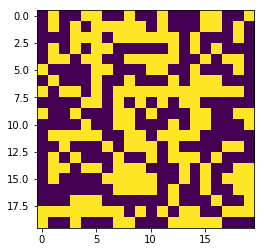

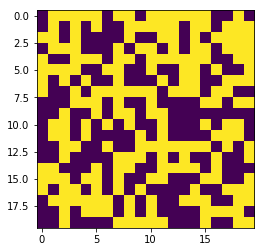

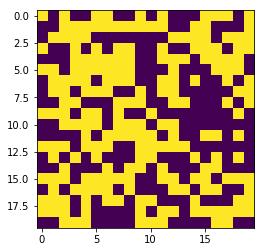

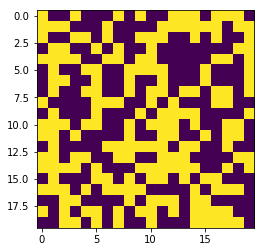

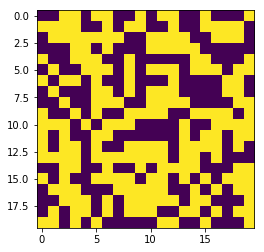

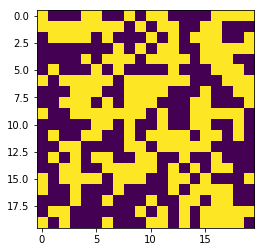

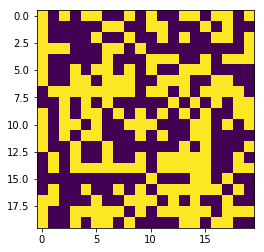

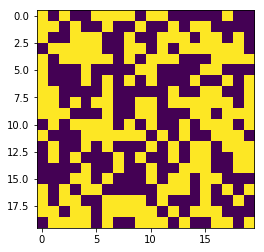

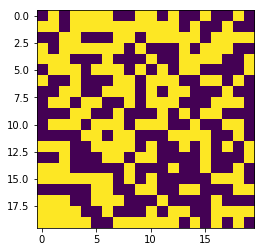

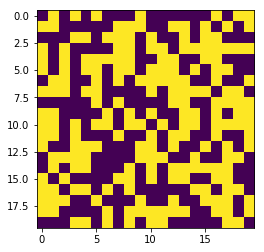

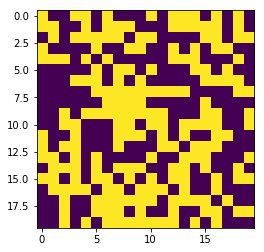

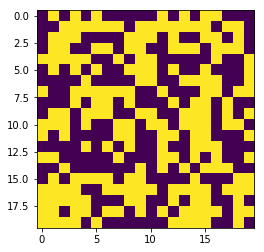

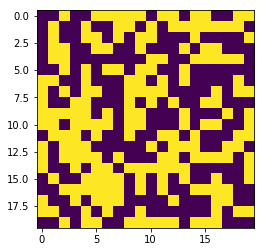

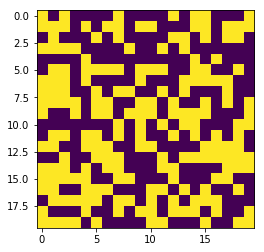

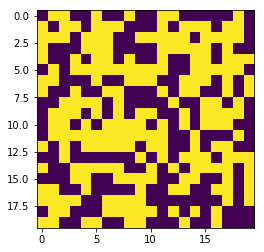

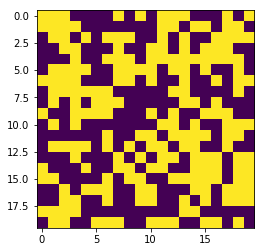

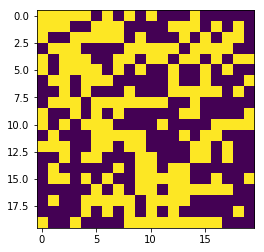

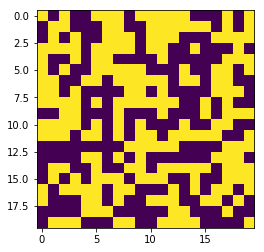

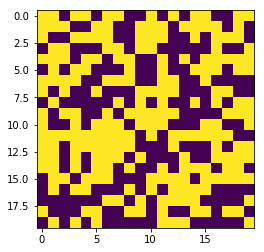

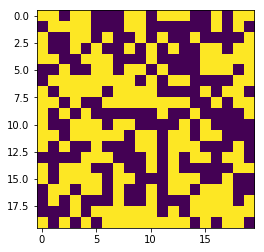

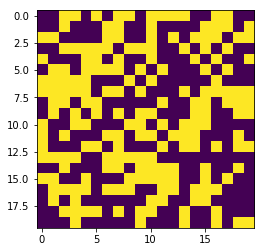

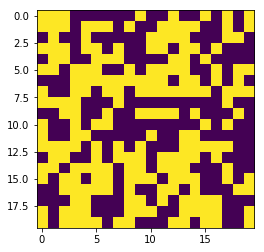

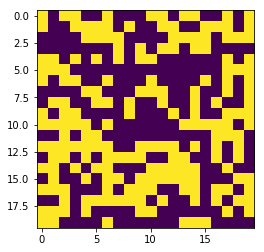

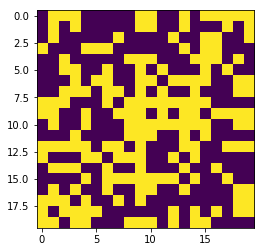

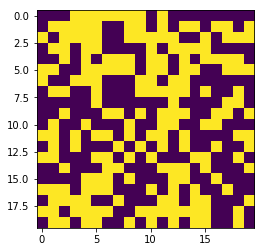

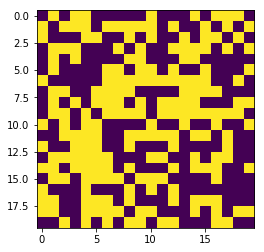

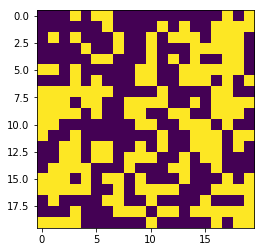

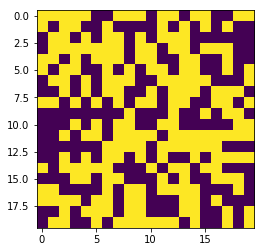

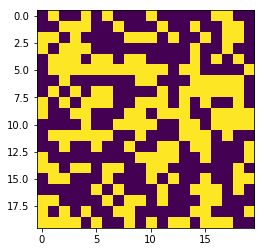

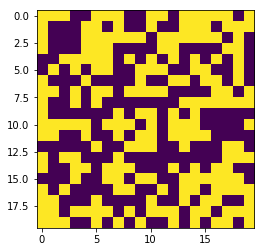

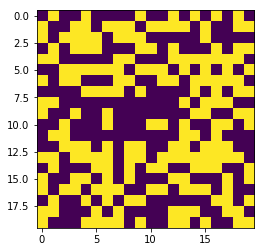

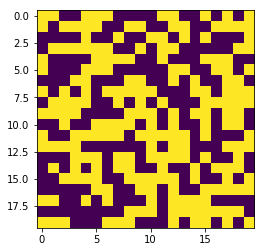

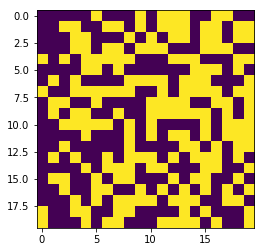

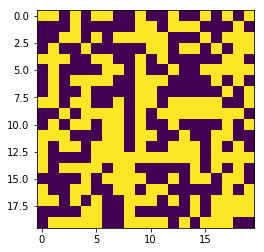

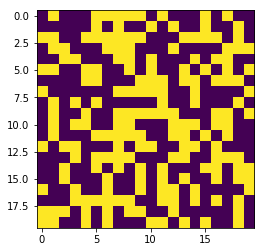

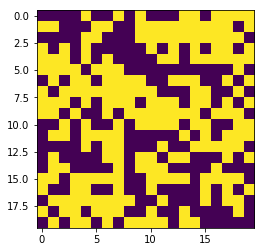

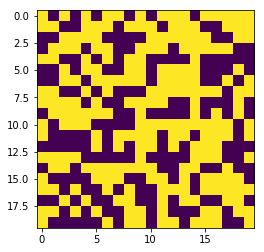

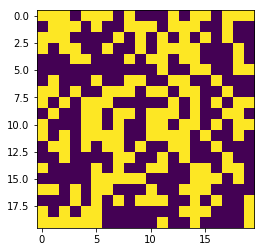

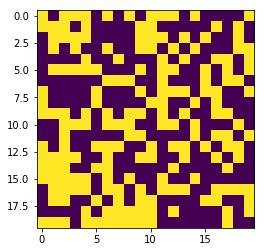

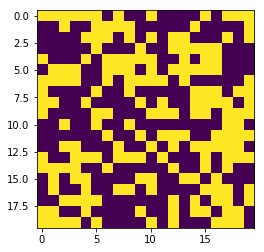

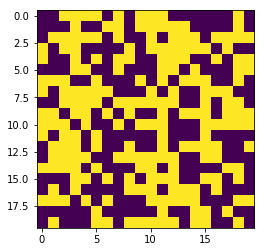

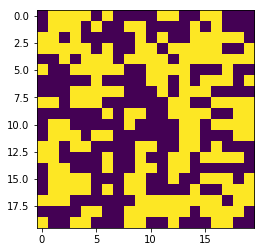

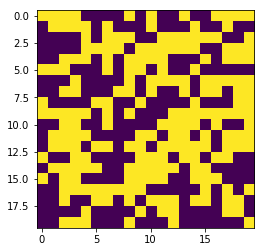

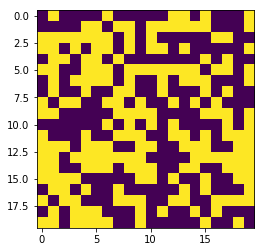

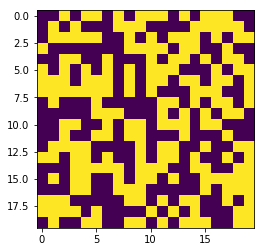

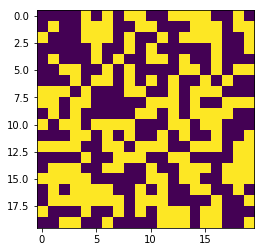

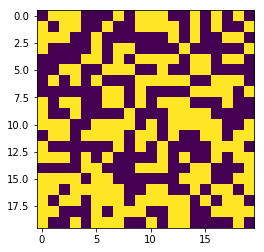

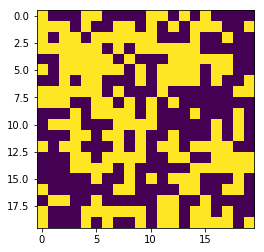

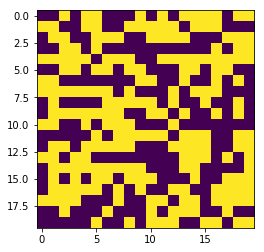

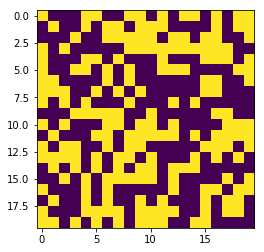

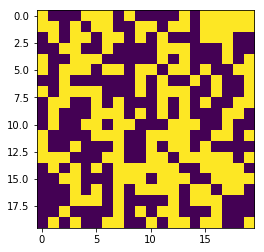

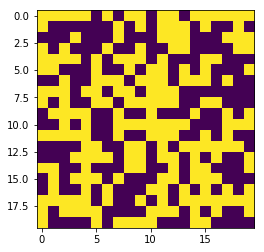

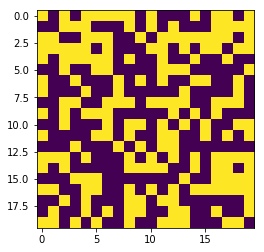

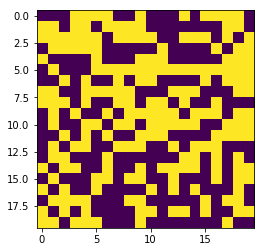

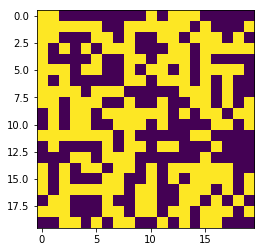

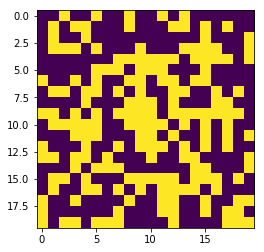

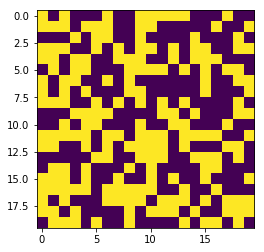

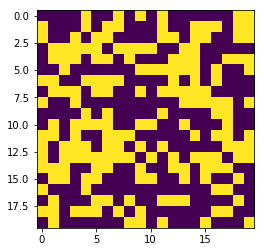

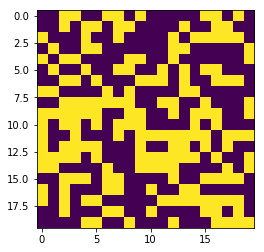

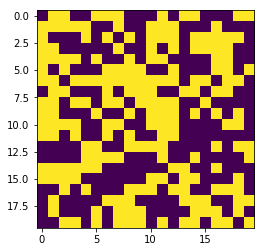

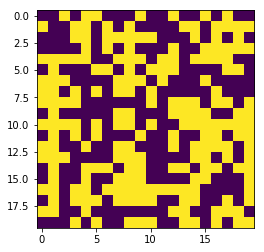

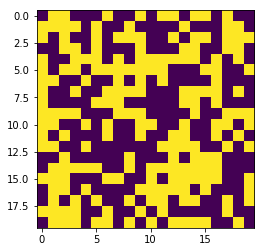

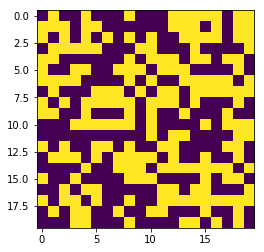

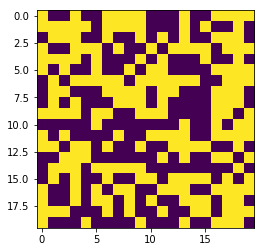

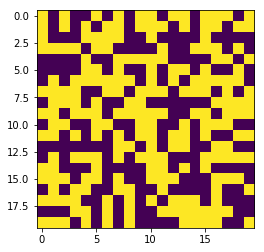

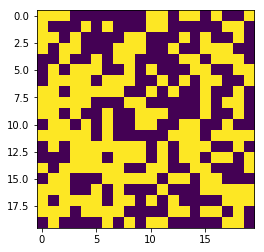

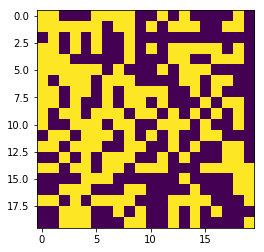

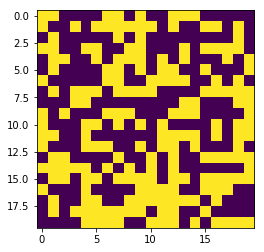

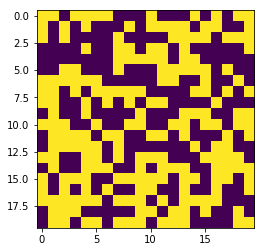

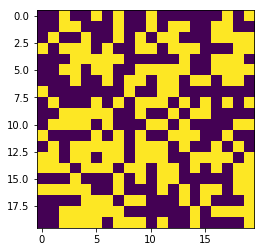

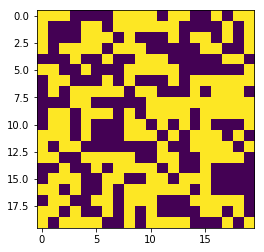

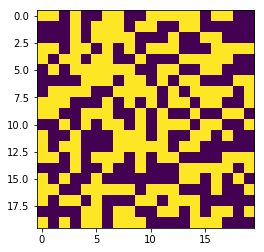

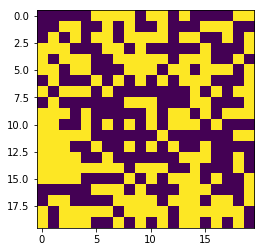

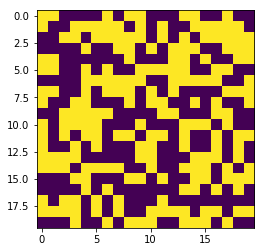

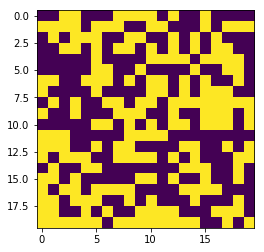

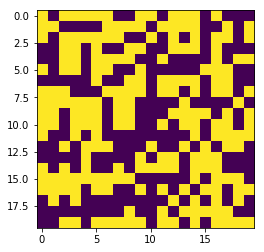

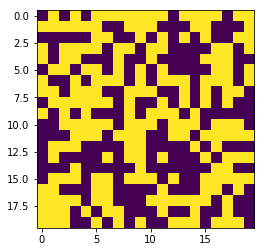

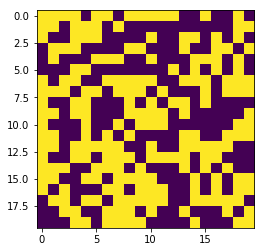

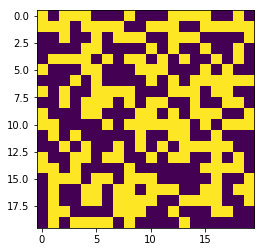

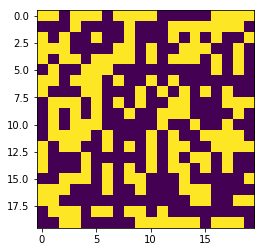

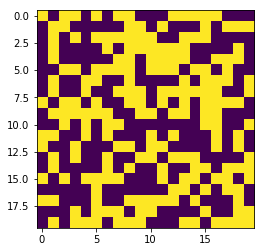

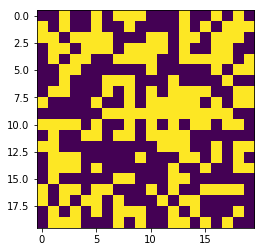

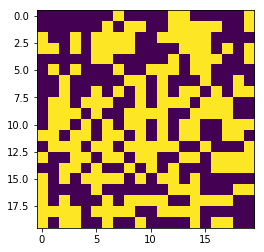

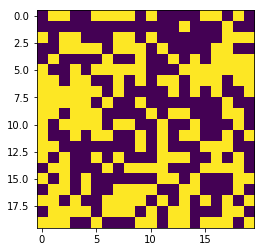

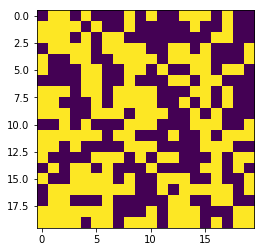

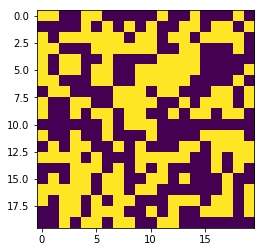

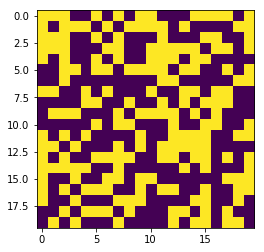

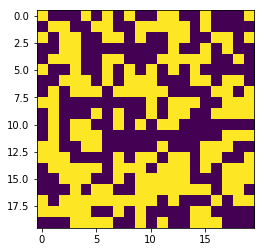

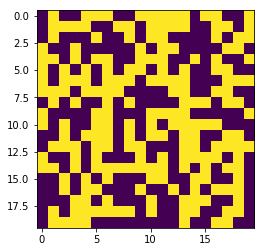

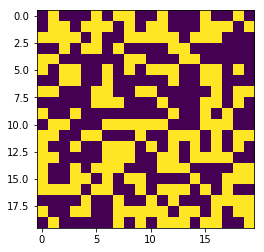

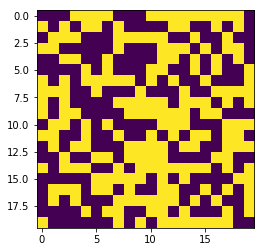

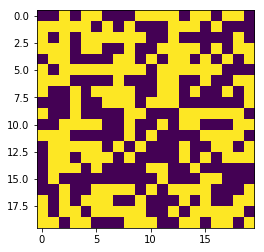

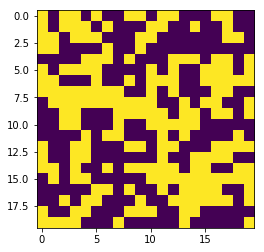

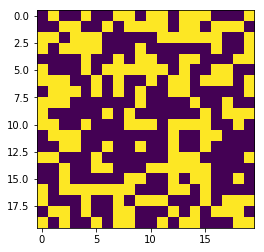

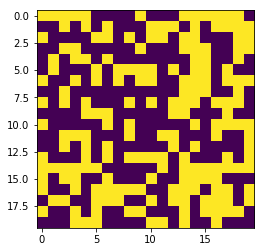

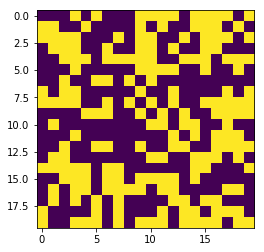

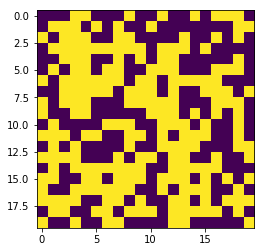

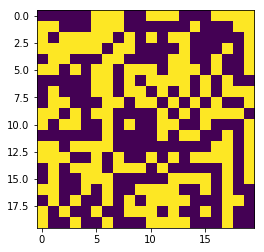

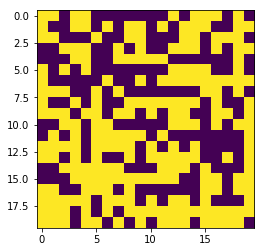

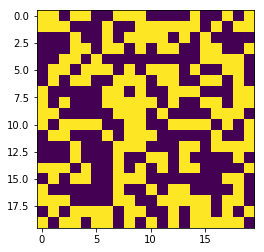

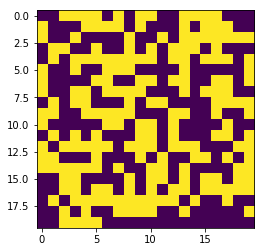

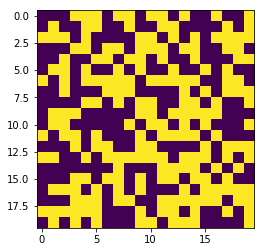

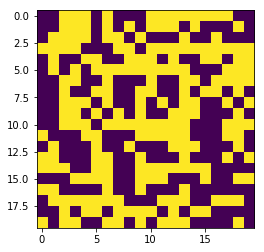

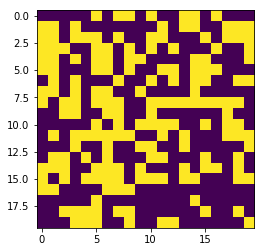

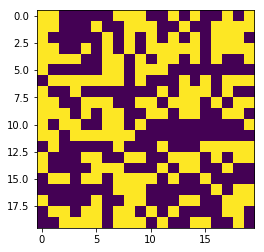

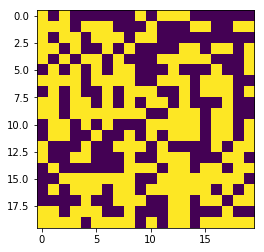

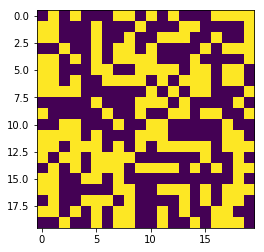

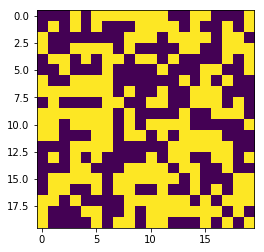

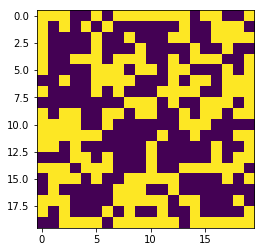

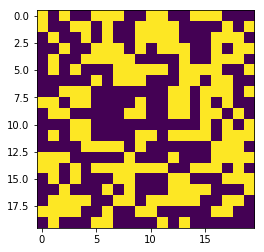

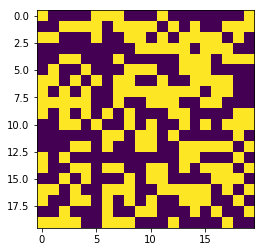

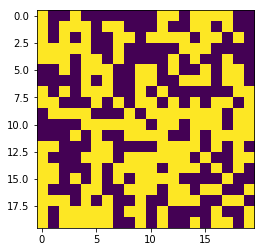

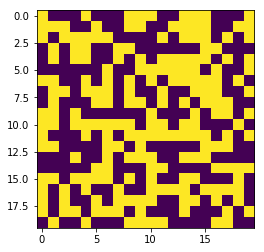

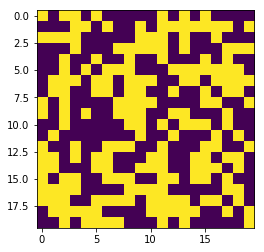

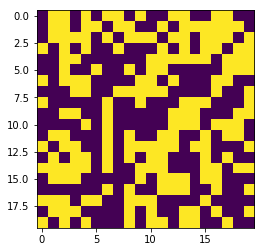

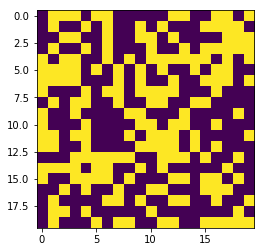

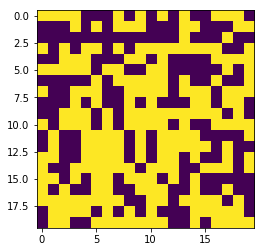

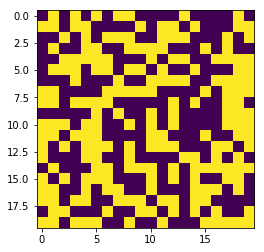

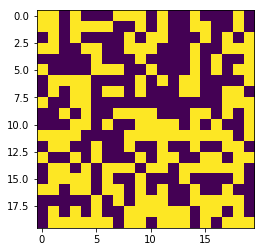

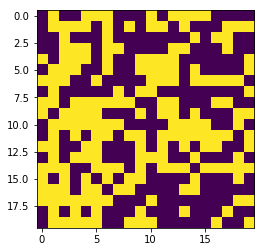

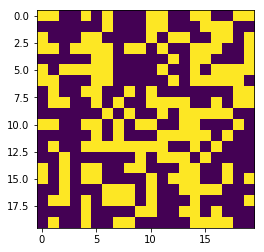

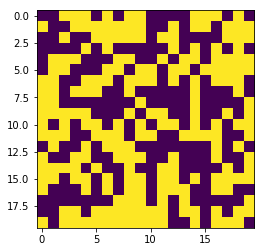

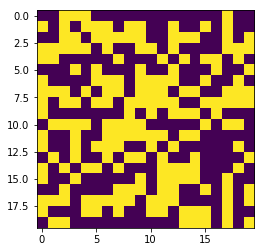

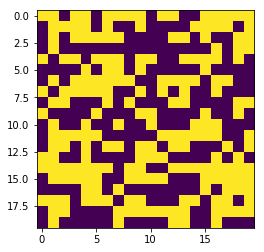

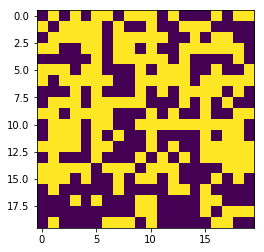

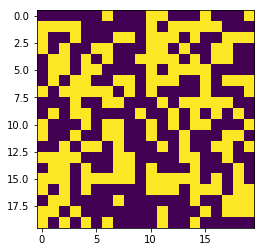

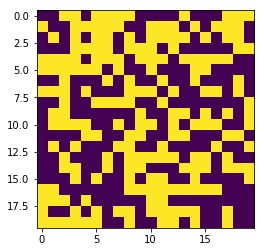

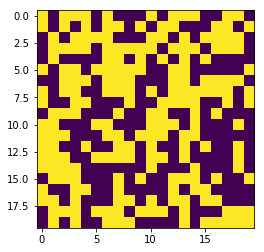

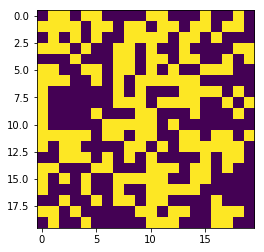

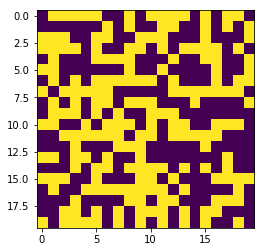

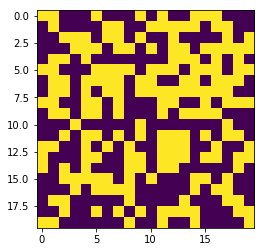

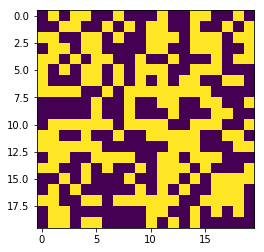

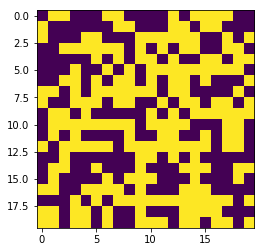

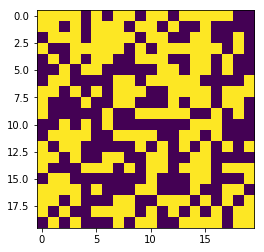

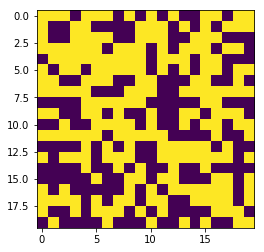

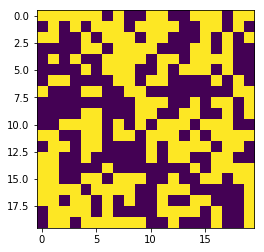

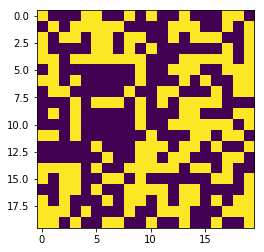

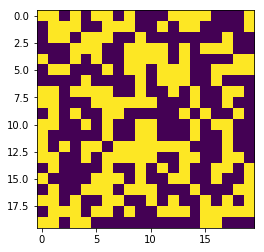

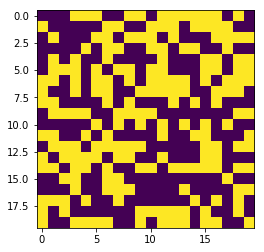

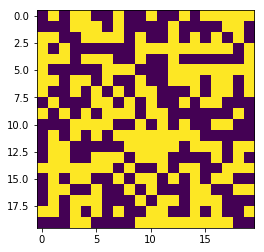

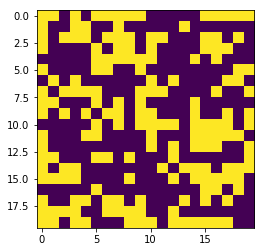

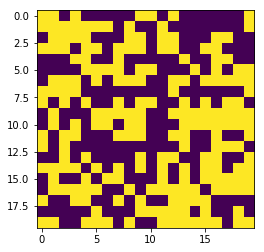

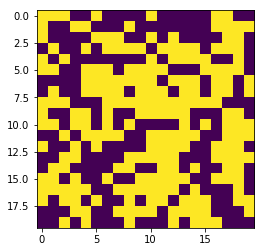

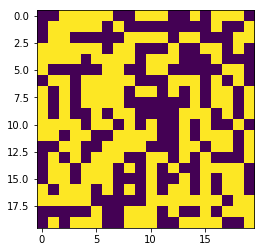

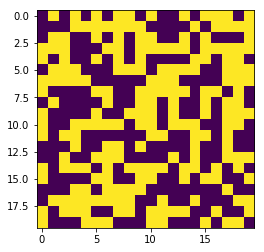

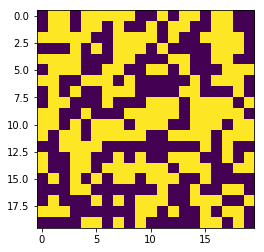

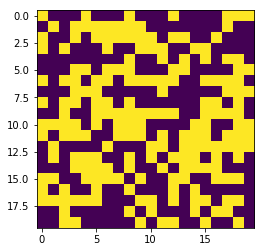

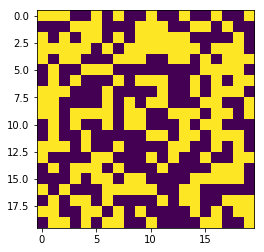

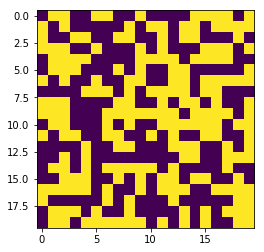

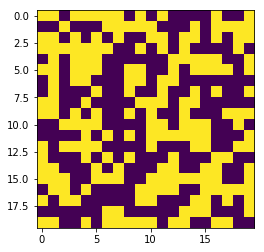

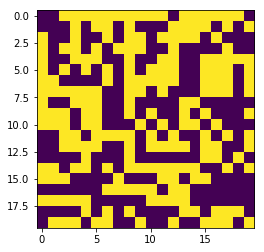

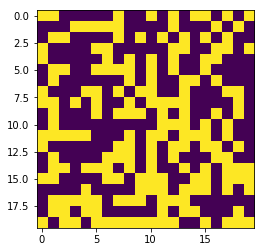

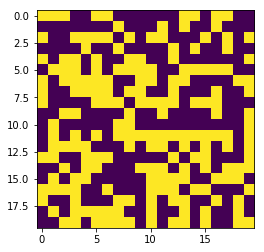

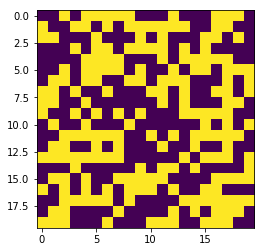

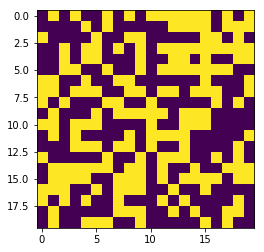

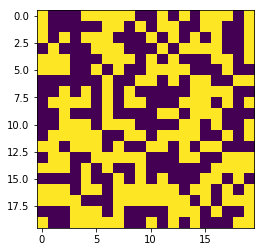

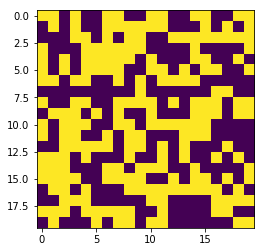

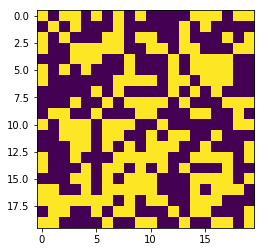

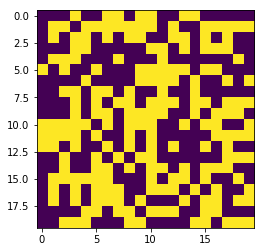

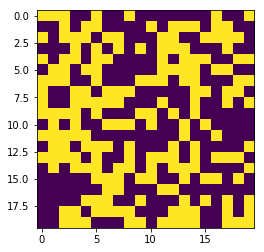

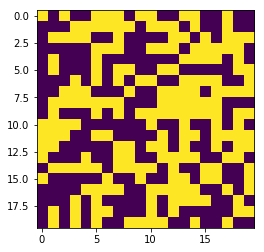

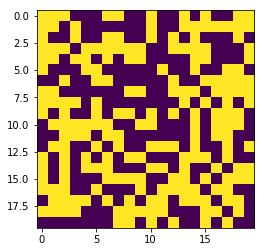

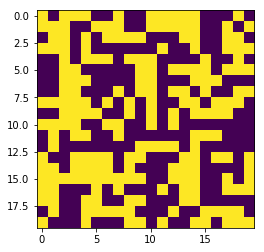

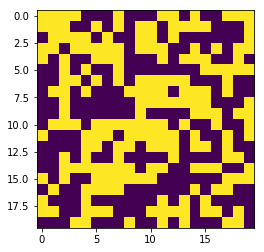

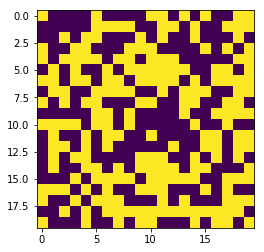

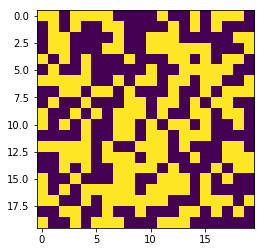

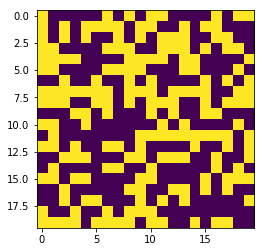

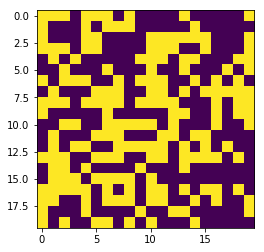

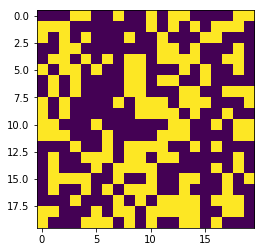

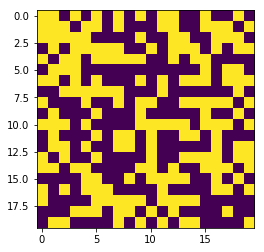

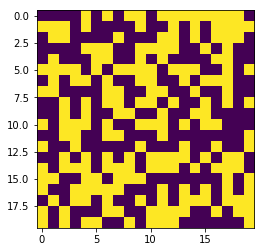

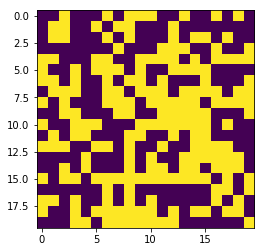

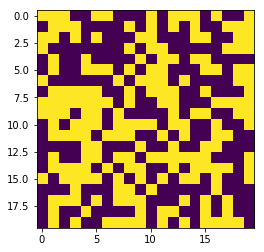

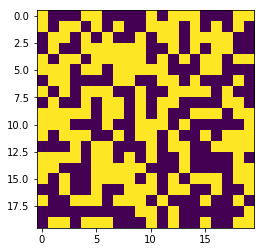

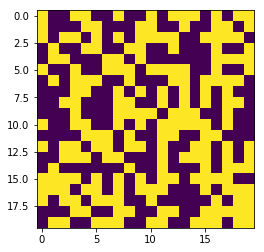

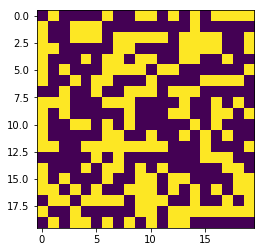

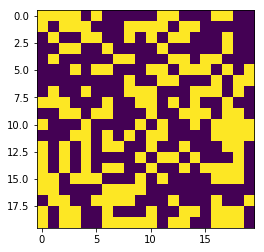

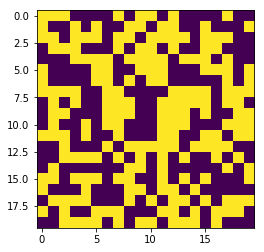

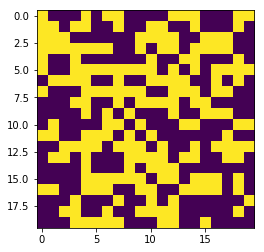

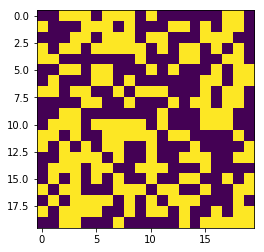

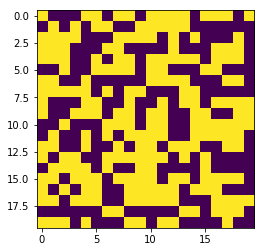

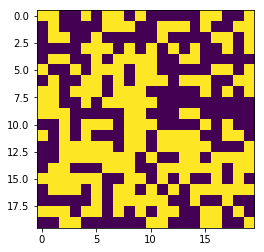

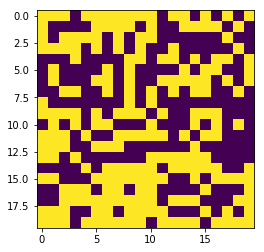

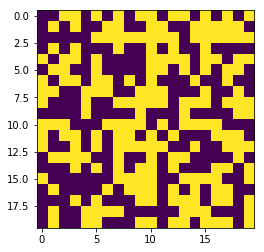

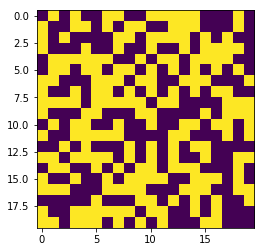

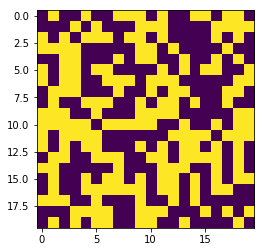

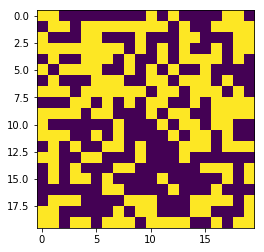

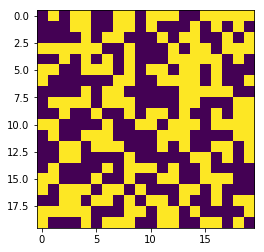

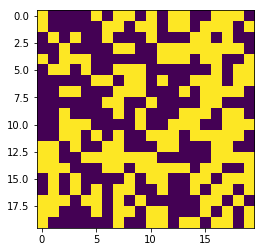

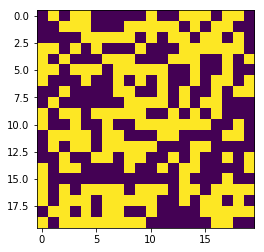

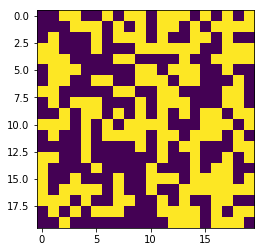

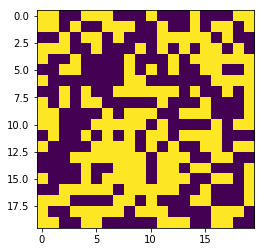

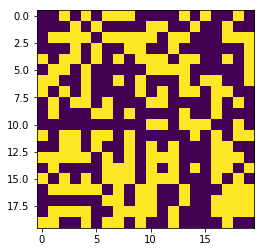

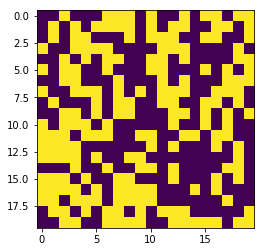

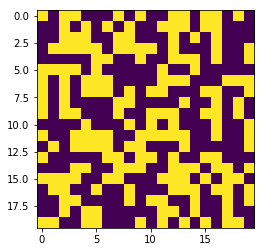

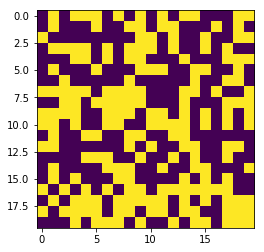

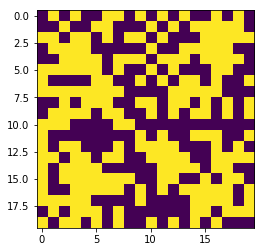

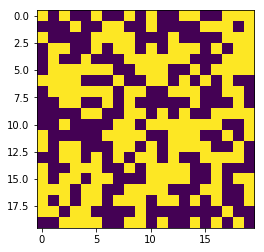

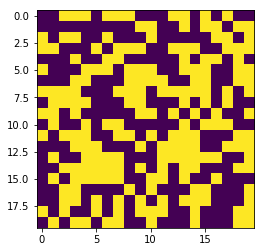

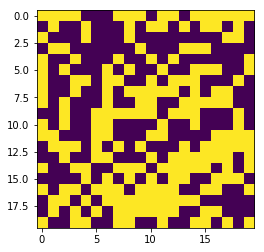

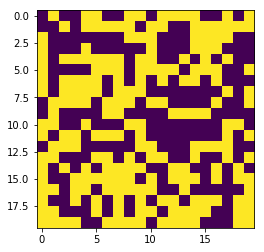

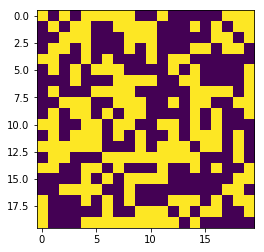

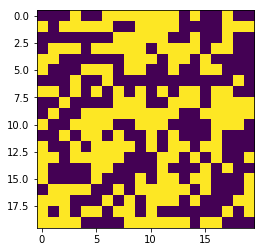

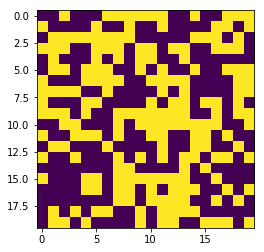

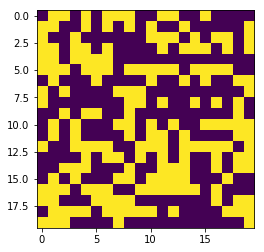

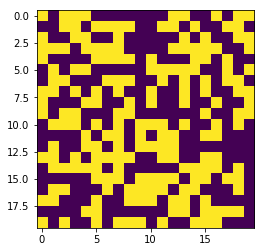

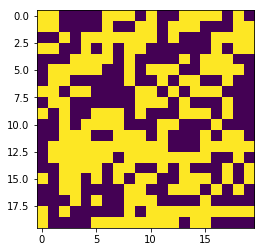

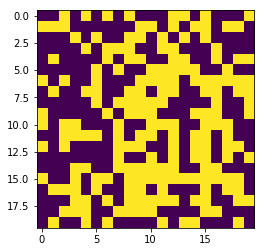

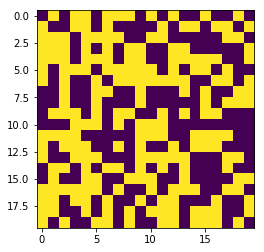

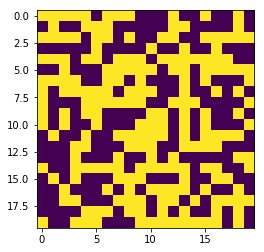

In [57]:
N = 20
N_Trials = 2000
Temperature = 0.5 * 2.27
Beta = 1/Temperature
N_temps = 1000

Grid = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        Grid[i][j] = 2 * randint(0, 1) - 1
        
for b in range(N_temps):
    for i in range(N):
        for j in range(N):
            Grid[i][j] = 2 * randint(0, 1) - 1
            
    Temperature = 1 + b * 0.1
    Beta = 1/Temperature
    
    # I guess we're telling the original variable for temperature to make like
    # a banana and split then
    
    for a in range(N_Trials):
        Grid_Update(Grid, Beta)
        
    plt.imshow(Grid)
    plt.show()

OH MY GOD THATS SO COOL. PYTHON IS SO COOL WHEN IT WORKS. WISH I COULD ANIMATE THOUGH.

Alright time to code up these Energy and Manetization graphs, let's get a sick beat up in here

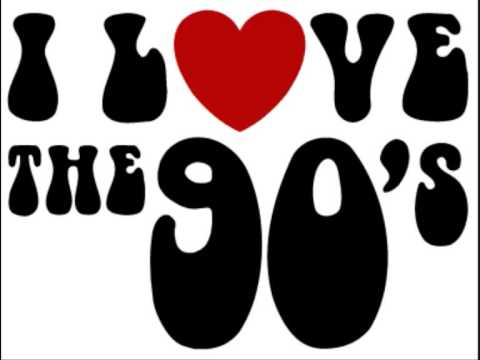

In [1]:
from IPython.display import YouTubeVideo  
# RUNNING IN THE 90S
# Video Credit: JoeDutchCoast
YouTubeVideo('BJ0xBCwkg3E')

I swear there's nothing wrong with me, I've been tested.

In [61]:
def FuckingMagnetsHowDoTheyWork(Grid):
    
    MagnetizationSum = 0
    MagnetizationSum = np.sum(Grid)

    return MagnetizationSum

def MyEnergyRightNow(Grid):
    
    Energy = 0
    for i in range(len(Grid)):
        for j in range(len(Grid)):
            Spin = Grid[i, j]
            Net_Neighbor_Spin = \
                Grid[(i + 1)%N, j] + \
                Grid[(i - 1)%N, j] + \
                Grid[i, (j + 1)%N] + \
                Grid[i, (j - 1)%N]
            EnergySum = -(Net_Neighbor_Spin) * Spin
            
    return EnergySum / 4
            

The code by Rajesh Singh uses MC sweeps for calculation and for equilibration. I don't know.

In [116]:
N = 20
NumberTemperaturePoints = 1000
N_Trials = 2000
Temperature = np.linspace(1, 4, NumberTemperaturePoints)
Energy = np.zeros(NumberTemperaturePoints)
Magnetization = np.zeros(NumberTemperaturePoints)

Grid = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        Grid[m][j] = 2 * randint(0, 1) - 1

    for m in range(len(Temperature)):
        for i in range(N):
            for j in range(N):
                Grid[i][j] = 2 * randint(0, 1) - 1
        E1 = M1 = 0
    
        for i in range(N_Trials):
            Grid_Update(Grid, 1/Temperature[m])
            Ene = MyEnergyRightNow(Grid)
            Mag = FuckingMagnetsHowDoTheyWork(Grid)
    
            E1 = E1 + Ene
            M1 = M1 + Mag
    
            Energy[m] = E1 / (N_Trials * N * N)
            Magnetization[m] = M1 / (N_trials * N * N)



IndexError: index 20 is out of bounds for axis 0 with size 20

In [ ]:
f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(Temperature, Energy, 'o', color="#A60628", label=' Energy');
plt.xlabel("Temperature", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(Temperature, abs(Magnetization), '*', color="#348ABD", label='Magnetization');
plt.xlabel("Temperature", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

plt.show()

Something is going wrong with my adaptation. I'm initializing the grid twice for the starting point and then applying the temperature points just like Dr. Tanedo did. This didn't work for me, I then tried initializing with just one or the other and I still wasn't getting any functioning graphs. They would either output some linear line or would get stuck infinitely or they would say my indexes are out of allignment I'm going to copy Rajesh's code to see if I can get it working.

## Rajesh Singh's Code

In [112]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

#----------------------------------------------------------------------
def initialstate(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mcmove(config, beta):
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

def calcEnergy(config):
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

def calcMag(config):
    mag = np.sum(config)
    return mag
#----------------------------------------------------------------------

In [113]:
#----------------------------------------------------------------------

nt      = 512
N       = 16
eqSteps = 2000
mcSteps = 2000

T              = np.linspace(1, 4, nt)
Energy         = np.zeros(nt)
Magnetization  = np.zeros(nt)
SpecificHeat   = np.zeros(nt)
Susceptibility = np.zeros(nt)

for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    
    for i in range(eqSteps):
        mcmove(config, 1.0/T[m])

    for i in range(mcSteps):
        mcmove(config, 1.0/T[m])
        Ene = calcEnergy(config)
        Mag = calcMag(config)

        E1 = E1 + Ene
        M1 = M1 + Mag

        Energy[m]         = E1/(mcSteps*N*N)
        Magnetization[m]  = M1/(mcSteps*N*N)
#----------------------------------------------------------------------

KeyboardInterrupt: 

In [ ]:
#----------------------------------------------------------------------
f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628", label=' Energy');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), '*', color="#348ABD", label='Magnetization');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

plt.show()

#----------------------------------------------------------------------

I can't get Rajesh's code to output anything. 

Well this sucks, I'm kinda lost now because I can't even guide my way through Rajesh's code because it doesn't output anything.

Dr. Tanedo, I'm going to be at school on Monday for work, can I drop by your office to talk to you later about this. I'll stop by anyways.